In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from dataclasses import dataclass

import vice
import pickle

import sys
sys.path.append("../..")

In [3]:
import surp.analysis_scripts.apogee_analysis as aah
from surp.analysis_scripts.vice_model import vice_model
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.gas_phase_data
import surp.analysis_scripts.rc_params

In [26]:
sf = pluto.fig_saver("../figures")

In [5]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""
    

In [6]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)

In [7]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-3.6, 0.6), label=name, plot_data=False, ax=ax)
        i+= 1
    # legend_outside()
    aah.plot_cooh()
    return f    

    
def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()
            
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name)
        plt.title(name)
        plt.show()

In [8]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee")
        plt.title("[O/H] = %1.1f" % o)
        pluto.legend_outside()  
        plt.show()

def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()

In [9]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.3, 0.3), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [10]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [11]:
def compare_stars(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    
    compare_cooh_stars(models)
    compare_coofe_stars(models)

In [12]:
def compare(names, labels):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    fig, axs = pluto.dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = r"[$\alpha$/H]",
        ylabel = r"[C/$\alpha$]", 
        xlim = (-0.6, 0.6), 
        ylim = (-0.5, 0.2),
        # xticks = [-0.6, -0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_coofe(models)
    pluto.fancy_legend()
    
    axs[1].set(
        xlabel = r"[$\alpha$/Fe]",
        ylabel = "",
        title = "",
        xlim = (-0.15, 0.4),
       # xticks = [-0.1, -0.2, -0.1, 0, 0.1]
    )


In [13]:
plat = find_model(model_id(name="cristallo11_f0.2_Z0.4_eta1.0_v0.1.4_plateu"))

In [20]:
models = {"fiducial": fiducial, 
         "plat": plat}

(-1.0, 0.3)

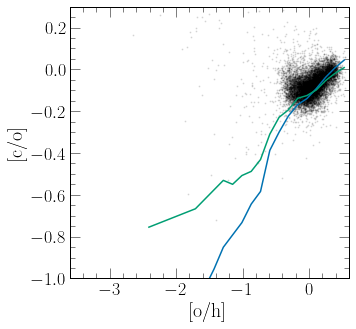

In [34]:
compare_cooh(models)
plt.ylim(-1, 0.3)


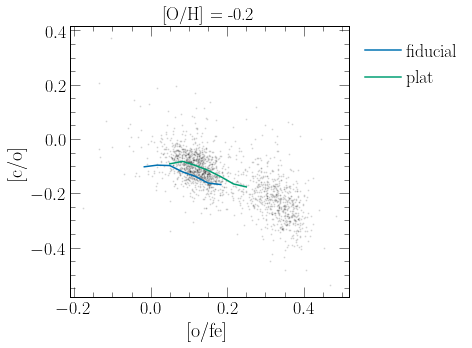

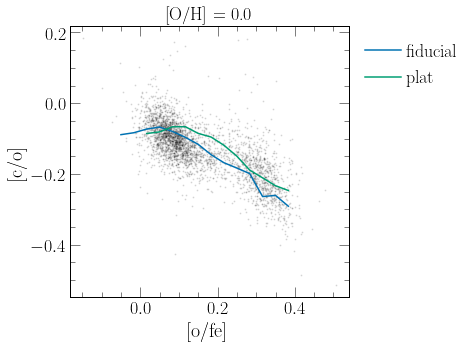

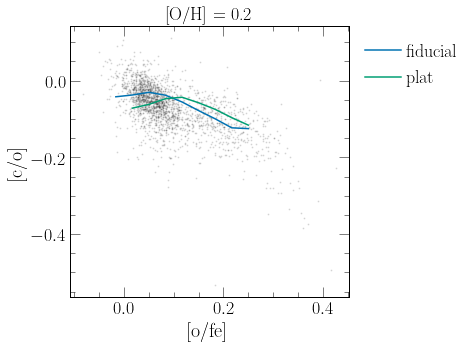

In [23]:
compare_coofe(models)

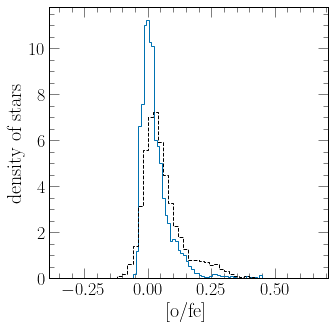

In [23]:
fiducial.plot_mdf("[o/fe]")

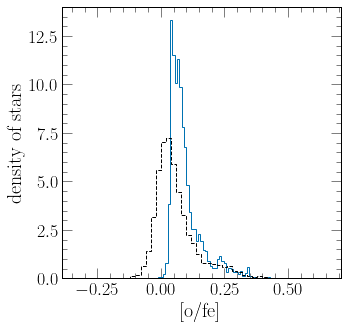

In [20]:
plat.plot_mdf("[o/fe]")

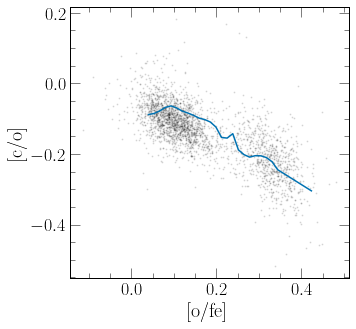

In [19]:
plat.plot_mean_coofe()

# Deep exploration of fiducial model

In [13]:
ls ../output/*.1.4*

../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.4.json
../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.4_lateburst.json
../output/cristallo11_f0.4_Z0.4_eta1.0_v0.1.4.json
../output/cristallo11_f0.4_Z0.4_eta1.0_v0.1.4_lateburst.json


In [ ]:
lets_see = find_model

In [22]:
fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.4", version="_v0.1.3"))

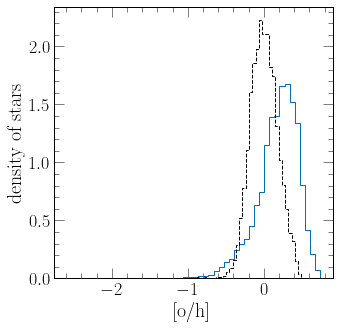

In [16]:
fiducial.plot_mdf("[o/h]")

In [47]:
lateburst = find_model(model_id(agb="cristallo11", f_agb="0.4", eta="1.0", beta="0.4", version="_v0.1.3_lateburst"))

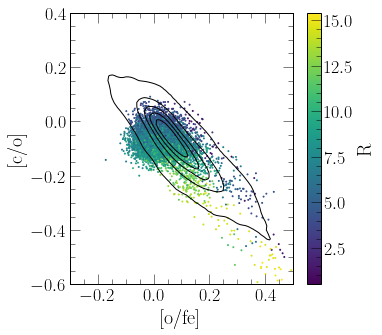

In [49]:
fiducial.plot_stars("[o/fe]", "[c/o]", c="r_origin", c_label="R")
plt.xlabel("[o/fe]")
plt.ylabel("[c/o]")
plt.xlim(-0.3, 0.5)
plt.ylim(-0.6, 0.4)
sf("cooofe_scatter")

In [48]:
lateburst.plot_stars("[o/fe]", "[c/o]", c="r_origin", c_label="R")
plt.xlabel("[o/fe]")
plt.ylabel("[c/o]")
plt.xlim(-0.3, 0.5)
plt.ylim(-0.6, 0.4)
sf("cooofe_scatter")

NameError: name 'lateburst' is not defined

In [43]:
np.nanmedian(aah.subgiants["MG_H"])

0.010230001993477345

In [45]:
np.median(fiducial.stars["solar"]["[o/h]"])

0.03637847058791205

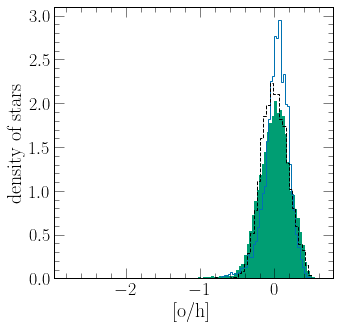

In [47]:
fiducial.plot_mdf("[o/h]", star_group="solar")
plt.hist(aah.subgiants["MG_H"], density=True, bins=100);

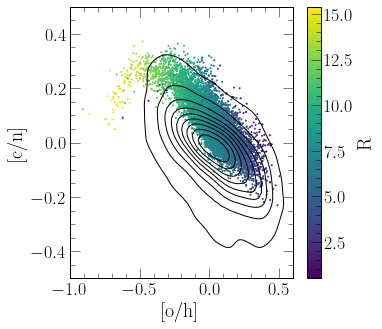

In [52]:
fiducial.plot_stars("[o/h]", "[c/n]", c="r_origin", c_label="R", plot_data=False)
aah.plot_contour("[mg/h]", "[c/n]")
plt.xlim(-1, 0.6)
plt.ylim(-0.5, 0.5)
sf("cnoh")

In [54]:
fiducial.plot_stars?

Signature:
fiducial.plot_stars(
    x,
    y,
    c=None,
    c_label=None,
    xlim=None,
    star_group='solar',
    exclude_high_alpha=True,
    plot_data=True,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/surp/analysis_scripts/vice_model.py
Type:      method


(-1.0, 0.5)

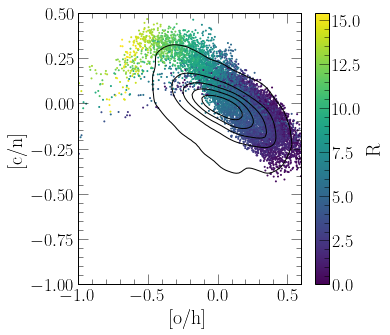

In [51]:
lateburst.plot_stars("[o/h]", "[c/n]", c="r_origin", c_label="R")
plt.xlim(-1, 0.6)
plt.ylim(-1, 0.5)

(-0.6, 0.5)

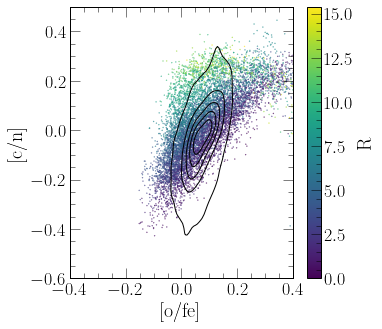

In [54]:
fiducial.plot_stars("[o/fe]", "[c/n]", c="r_origin", c_label="R",s=0.1)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.6, 0.5)

In [25]:
lateburst

NameError: name 'lateburst' is not defined

[autoreload of yields failed: Traceback (most recent call last):
  File "/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib64/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib64/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../yields.py", line 35, in <module>
    set_yields()
  File "../yields.py", line 32, in set_yields
    J22
NameError: name 'J22' is not defined
]


(-0.6, 0.5)

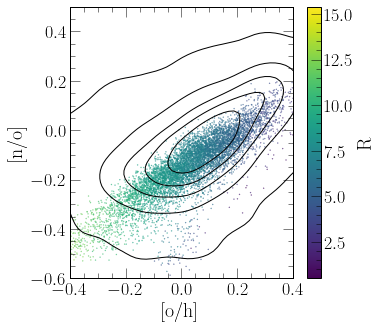

In [24]:
fiducial.plot_stars("[o/h]", "[n/o]", c="r_origin", c_label="R", s=0.1)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.6, 0.5)

(-0.6, 0.5)

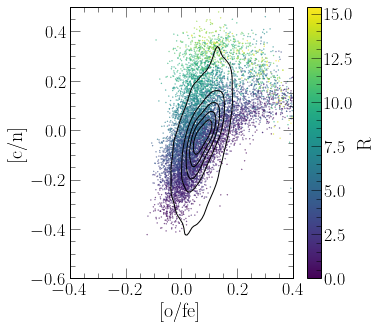

In [53]:
lateburst.plot_stars("[o/fe]", "[c/n]", c="r_origin", c_label="R", s=0.1)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.6, 0.5)

Text(0, 0.5, '[o/mg]')

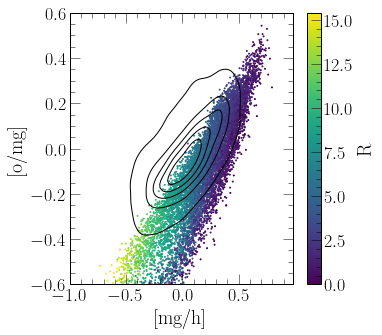

In [33]:
fiducial.plot_stars("[o/h]", "[n/o]", c="r_origin", c_label="R", exclude_high_alpha=True)
plt.xlim(-1)
plt.ylim(-0.6, 0.6)
plt.xlabel("[mg/h]")
plt.ylabel("[o/mg]")

Text(0, 0.5, '[n/mg]')

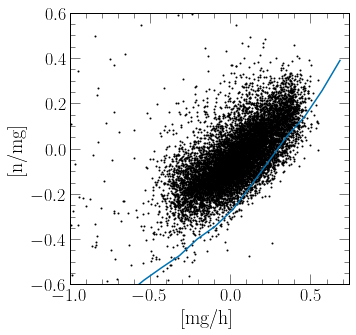

In [37]:
fiducial.plot_mean_stars("[o/h]", "[n/o]")
plt.xlim(-1)
plt.ylim(-0.6, 0.6)
plt.xlabel("[mg/h]")
plt.ylabel("[n/mg]")

Text(0, 0.5, '[n/mg]')

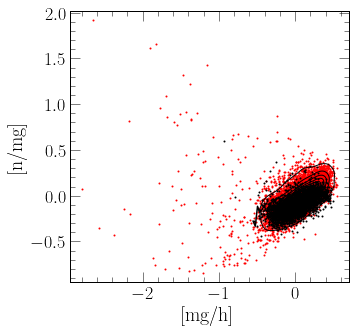

In [46]:

aah.plot_stars("MG_H", "N_MG", c="red")
aah.plot_v21("[o/h]", "[n/o]")
aah.plot_mean_v21("[o/h]", "[n/o]")
aah.plot_contour("MG_H", "N_MG")
plt.xlabel("[mg/h]")
plt.ylabel("[n/mg]")

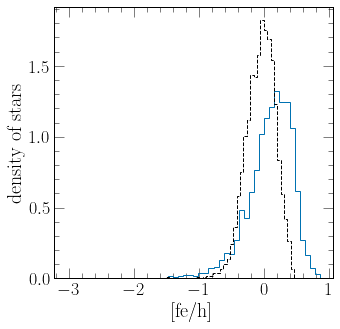

In [30]:
fiducial.plot_mdf("[fe/h]")

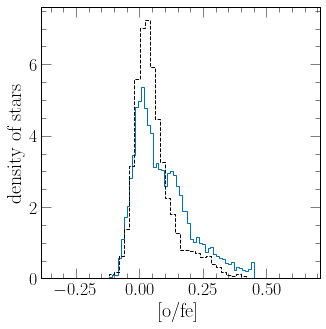

In [32]:
fiducial.plot_mdf("[o/fe]")

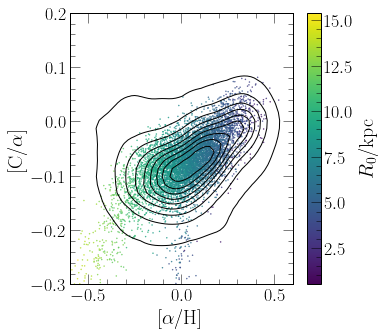

In [17]:
fig, ax = plt.subplots()
s = fiducial.stars["solar"]
plt.sca(ax)
N = len(s)
dx = 0.03
dy = 0.03
plt.scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/o]"] + np.random.normal(0, dy, N), c = s["r_origin"], s=0.2, zorder=2)
plt.colorbar(label="$R_0$/kpc")
aah.plot_contour("[mg/h]", "[c/mg]")

ax.set(
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    xlim=(-0.6, 0.6), 
    ylim=(-0.3, 0.2)
)
sf("cooh_scatter")

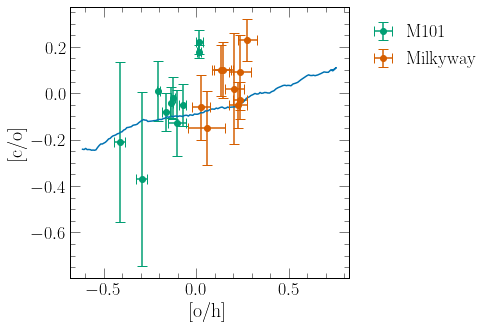

In [122]:
fiducial.plot_gas("[o/h]", "[c/o]")
sf("cooh_gas")

In [18]:
fiducialcial.history.set_index(["time", "R"])

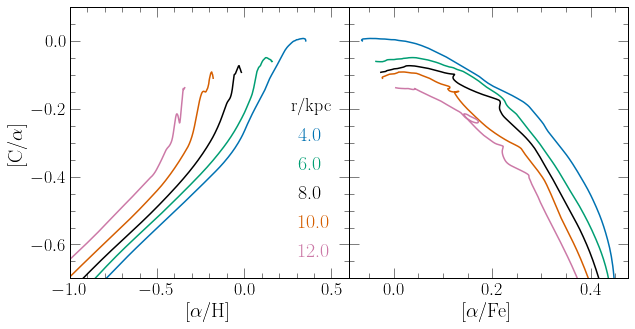

In [21]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_R_slices("[o/h]", "[c/o]", ax=axs[0])

# for t in [2, 5, 8, 11, 13]:
#     for R in [4, 6, 8, 10, 12]:
#         df = h.loc[t, R]bbox_inches = "tight"
#         plt.scatter(df["[o/h]"], df["[c/o]"])

axs[0].set(
    xlim=(-1, 0.6),
    ylim=(-0.7, 0.1),
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    #xticks=(-0.75, -0.5, -0.25, 0, 0.25, 0.5)
)

fiducial.plot_R_slices("[o/fe]", "[c/o]", ax=axs[1], legend=False)
axs[1].set(
    ylabel="",
    xlabel=r"[$\alpha$/Fe]"
)

sf("evo_tracks")

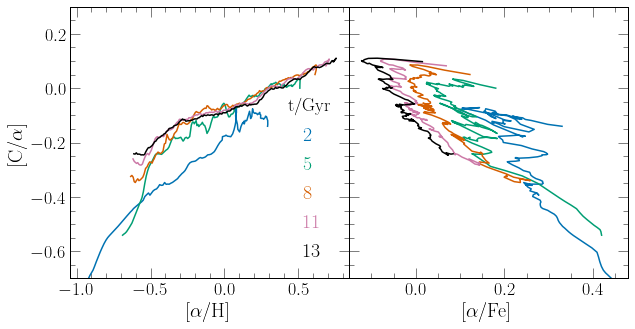

In [22]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_t_slices("[o/h]", "[c/o]", ax=axs[0])
axs[0].set(
    ylim=(-0.7, 0.3),
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    #xticks=(0, 0.2, 0.4)
)


fiducial.plot_t_slices("[o/fe]", "[c/o]", ax=axs[1], legend=False)
axs[1].set(
    ylabel="",
    xlabel=r"[$\alpha$/Fe]"
)
sf("evo_slices")

## Out of Box AGB models

In [14]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

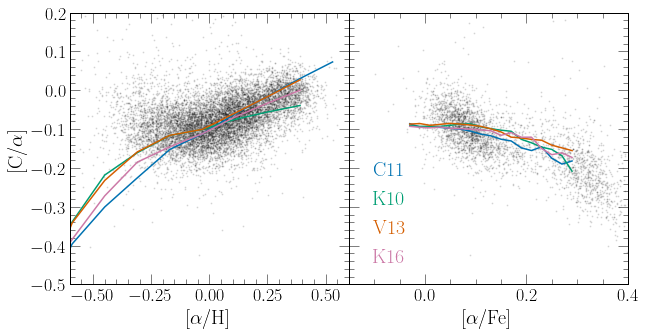

In [15]:
compare(names, labels)
sf("oob_agb")

# Messing with da yields

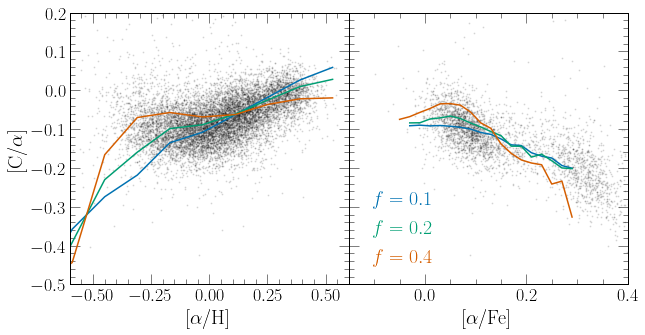

In [16]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["$f=0.1$", "$f=0.2$", "$f=0.4$"]
compare(names, labels)
sf("f_agb")

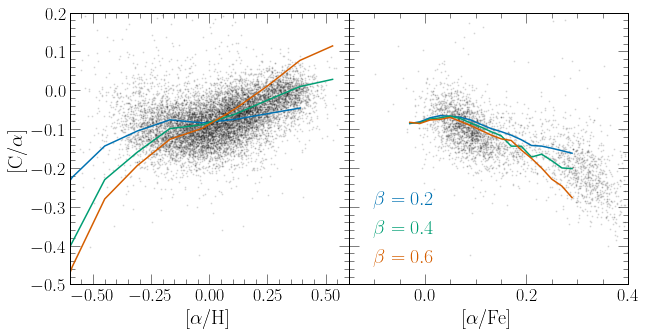

In [17]:
names = []
for beta in ["0.2", "0.4", "0.6"]:
    names.append(model_id(agb="cristallo11", f_agb="0.2", beta=beta, eta="1.0", version="_v0.1.3"))
labels = [r"$\beta=0.2$", r"$\beta=0.4$", r"$\beta=0.6$"]
compare(names, labels)
sf("beta")

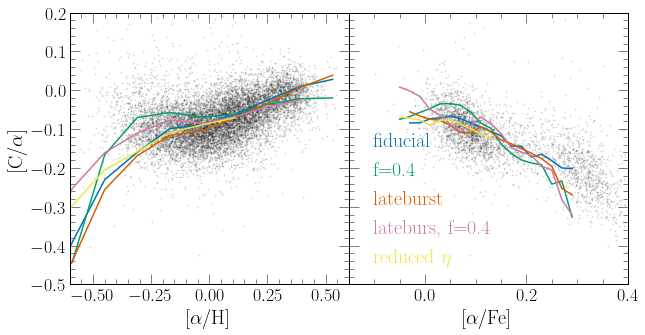

In [18]:
fnames = ["cristallo11_f0.2_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst",  "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3"]
names = []
for s in fnames:
    names.append(model_id(name=s))
    
labels=["fiducial", "f=0.4", "lateburst", "lateburs, f=0.4", r"reduced $\eta$"]
compare(names, labels)
sf("lateburst_eta")

# This is where the chaos begin

In [ ]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="0.2", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

In [ ]:

df = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.6", version="_v0.1.3")).history
for o0 in [-0.2, 0, 0.2]:

    sl = df["[o/h]"] > o0-0.05
    sl &= df["[o/h]"] < o0 + 0.05

    pluto.plot_mean_track(df[sl]["[o/fe]"], df[sl]["[c/o]"], label="%1.1f" % o0, xlim=(-0.2, 0.5))


    
df = aah.subgiants
for o0 in [-0.2, 0, 0.2]:
    sl = df["MG_H"] > o0-0.05
    sl &= df["MG_H"] < o0 + 0.05

    pluto.plot_mean_track(df[sl]["MG_FE"], df[sl]["C_MG"], label="%1.1f" % o0, ls="--", xlim=(-0.2, 0.5))



plt.legend()

plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")


plt.legend()



plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")

In [19]:
fnames = ["cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_A2.5_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst"]
names = []
for s in fnames:
    names.append(model_id(name=s))
labels = ["reduced eta", "big", "normal lateburst"]

In [20]:
compare(names, labels)

FileNotFoundError: [Errno 2] No such file or directory: '../output/cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_A2.5_lateburst.json'

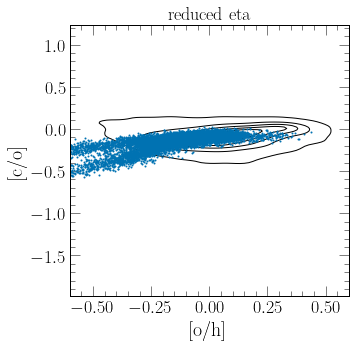

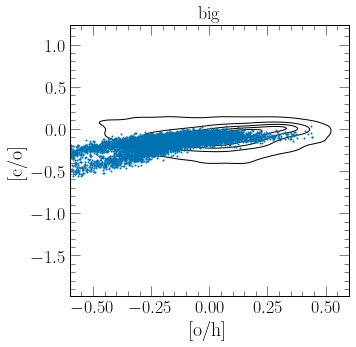

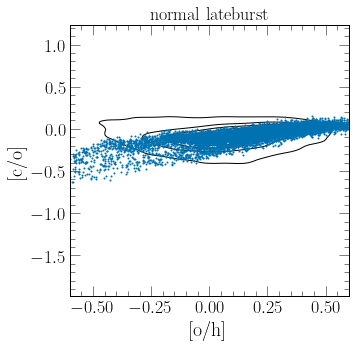

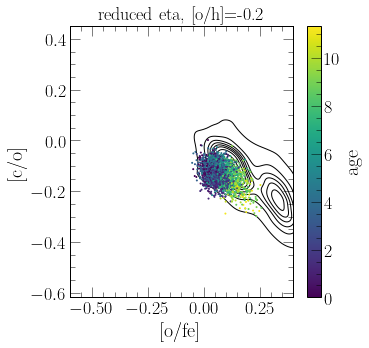

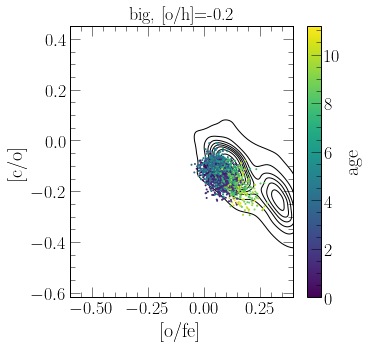

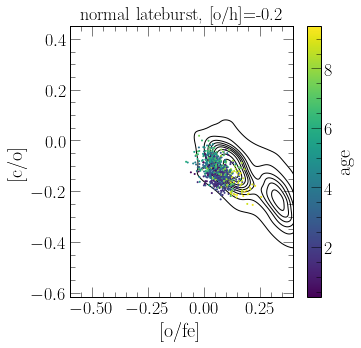

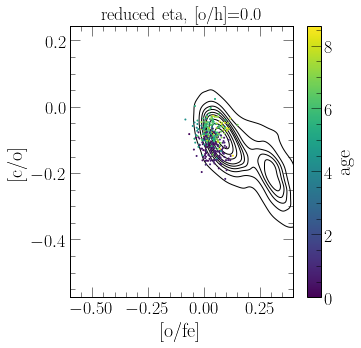

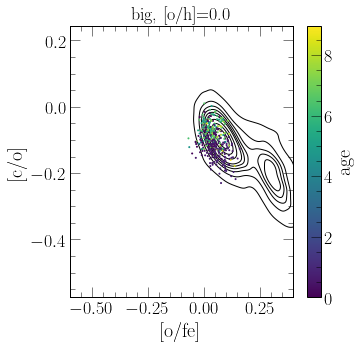

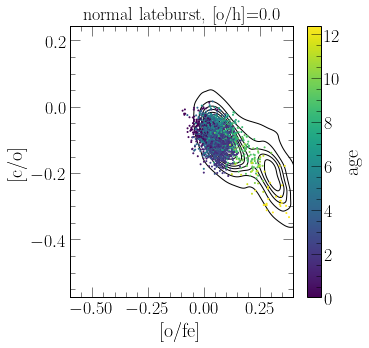

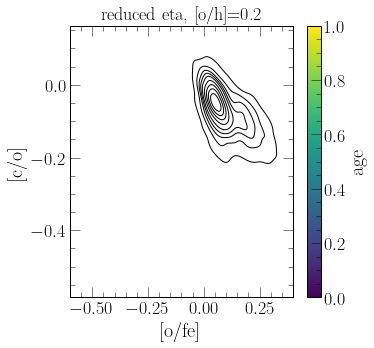

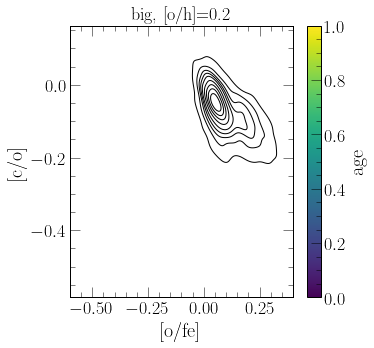

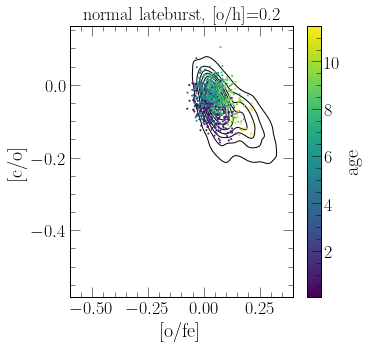

In [40]:
compare_stars(names, labels)

In [33]:
fnames = ["cristallo11_f0.4_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.4_Z0.4_eta1_v0.1.3_ia0.8", "cristallo11_f0.4_Z0.4_eta1_v0.1.3_ia1.2"]
names = []
for s in fnames:
    names.append(model_id(name=s))
labels = ["f=0.4", "lowered Fe Ia", "increased Fe Ia"]

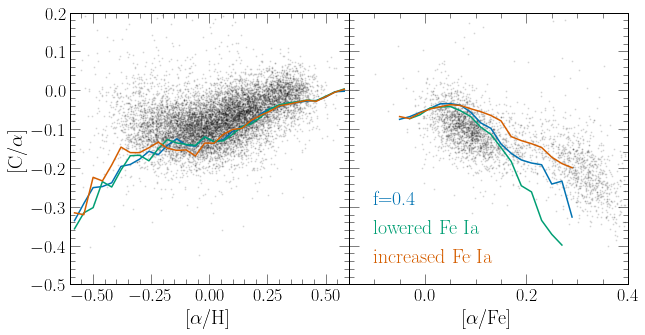

In [34]:
compare(names, labels)
sf("ia_fe")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoUAAAFPCAYAAAA7srSbAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9e3xb13nnC38BgrgSIAiC9/v9IoqkRMmybrZsy1Ycx4lzcdKkTaaXaTznnPm8Z3o6bzKdzttO5nYm7cycmZ6ZzmufzvScvsm0qd0mTRM7jmRb1l2WSFEU7xeQBG8gCIIg7gRB4P2D3SsgBFKkREqktH+fjz6kQOy911p77bWf9Ty/5/co4vF4HBkyZMiQIUOGDBlPNJSPugEyZMiQIUOGDBkyHj1ko1CGDBkyZMiQIUOGbBTKkCFDhgwZMmTIkI1CGTJkyJAhQ4YMGchGoQwZMmTIkCFDhgxko1CGDBkyZMiQIUMGslEoQ4YMGTJkyJAhA1A96gY8CN566y0sFgsANpuNb33rW5s6BmBkZASPx8N3v/tdzGbzTjZThgwZMmTIkCFj12PPGoWSQfilL30JWDUK33jjDd58880Nj/nmN78p/v/OO+/Q1tbGyMjIjrdXhgwZMmTIkCFjN2PPho/ffPNNYRACVFZWcu7cuXW/b7PZ7jL+vvSlL+F2u3nnnXd2rJ0yZMiQIUOGDBl7AXvSKPR4PHR0dNz1udls3tAwlELHibBYLLjd7m1tnwwZMmTIkCFDxl7DnjQKbTZbSh6gxWLBZrOlPKayspKFhYWU5zp06NB2N1GGDBkyZMiQIWNPYU9yCt1ut0gwSYTZbMbj8Wz6PG+99RanT5/m4MGDd/1NoVA8SBNlyJAhQ4YMGTIeKuLx+AMdvyc9hdsBm83Gm2++ydmzZ9f9Tjwe39S/3//939/0d3f6+3uxLSsrK/h8Pn7v935vV7R7t4357/3e7+Hz+VhZWXms+/mktGUra8v9/ttqm3bzdR6XazxOfZHHa3deZzuwZ43CVDzArXgJv/3tb/PBBx9sY4tWEYvF8Pv9xGKxbT/344pgMMjY2BjLy8uPuikPDVuZJwqFgoyMDJTKPfu4ypAhQ4aMPYA9+ZY5dOhQSgPQ7XanDAUn49vf/vaO6RNKBk4wGNz2cz+u0Ov1lJeXk56e/qib8tAgzxMZMmTIkLHbsCeNQrPZTGVl5V2Gocfj4fTp0xse+9Zbb/HGG29QWVkpPtsoY3mrkAwcvV6/bed8nJDKQ6ZUKsnIyHiieJzyPJEhQ4YMGbsNe9IohFVvX6LETEdHxxqD0Gaz8frrr68xHM+dO8ehQ4eEQejxeLbFIDx16pT4XTJwtjPUl3j+7fzuw/h+MjbykD1O/dwoPHzq1KktzZPdNC47ee4npZ/AjtNLdrK/j+I6O43Habwel3sCj9d47Zn7Et/DePPNN+Nnz56Nv/322/Hvfve7a/529uzZuNlsjo+MjMTj8Xh8ZGQkDqT8t7CwcNe5d3Jofv/3f3/Hzr2bkKqfKysrcZ/PF19ZWXn4DdqhtqTqp8/ni9+5cyfu8/ke6Ny7CU/KvI3Hd7avwGM1L3YaT9K82yvYrfdkN71fHgW2w27Zk5I0EhJL1iXj9OnTa3QJKysrt5yd88//+T9f8/9Tp07tHWt/l0LykO0GSF7L8vLybW+THB6WAXD+/HnOnz9/1+d/+Id/uIYuIa8tMmTcjVgsRjAYRK/XbyqqspNr+m7DemvLg2JPG4U7jWSjUMbjhZ003Lbb+N3q4ihjdyCVsfed73yH73znO4+mQTJk7CFs1ch7kjbj660tDwr57SLjicVO8D93SpJIzlaWIWP3Q5Yk215s1cjbiTX9SYM8co8AuylMtJOL2Hb2czcvton93CnjbTfsgHfTvN1pPEl93e3YS/fiSdm8Pax7Iht5Dx+K+FaJdk8IFArFtimE72b4/f49wcHYK+3czjCvHDJ+PPGkrC1PIuRnVsajxHasLbJRuA6elIV7ryxie6Wd24m9YgjL2BqelLVFhgwZDxeyUbiDkBduGZvFThmsT6Ih/CRAXltkJEN+1mVsB7ZjbZFnnwwZD4id4hHJfBoZMp4MPClcRBm7H7IkzQZ4XHUK5V3p9mI3JIHI2J1YT0vscV1bZNwf5DVExlaxUzqFcvh4HTysEM+jMNBkrpoMGY8OcvhYhgwZOwE5fPwY4FGEDeRdqQwZMmTIkCEjGbKncB08zp5CGTJkPDrInkIZMmTsBGRP4WMAOZng8cBuFteWIUPGo4O8NsjYS5AtERkytgFy9qAMGTJSQV4bZOwlyOHjdSCHeB4cT1JofDv6ej/neJLG+HGBvLY8WZCfURkPC3L4WMauxpO0Q94OGsD9jNeTNMYyZOxFyBQhGXsJsk7hBthNWmJ7cbd5v1nOu7GvD6NN9zNecib57oasU/j4YjeuUzKeHMg6hQ8Zuy3E8yRpC+7Gvu7GNsnYm9hta4uM+4O8JsjYbZBrH+8gdtvC/SC70r22o92N7d2NbZKxN7Hb1hYZ9wd5TZCx2yAbhTuIvbJwb2ZhetQ7WnnxlCHjF9gra4sMGTL2FuREExmbSjR41LwzORlChgwZMmTI2P2QPYXrYK/s5veCF24vtPFhQR4LGXtlbXmSIT+nMvYiZE+hjD0hd7BdbXwcKgM8iNdU6n80Gt3z4yBDxm6GHN2Q8aRi91oSMmQk4XFYqLcSyk82gqX+u1yuPT8OMmTsZjxqyo0MGY8Ksk7hBpC1xHYXNlqo90q4R/KabgaSESglCEn912q14v8ydjdkncK9ia08pzJkPArIOoUPGTLvZ3diPePvUWdY3wv3MlpT/X2vGLoytoa9vrbI81KGjN2JJ55T+NZbb/HOO+/wzjvv8Ad/8AebOsbj8fDWW2/x+uuv73DrZCRjOziB64WQd3u4516h71R/v18u5uPAvZSxe/E40DhkyJCRGnvWKHzrrbewWCx86UtfEv/eeOONDY/p6Ojg3LlzWCwWbDbbQ2qpDAnb8TJZz/jbbQk3yYbZvYzW7TRqH8ZLezsMT9l43ZvY7RuwhwF57sp4XLFnw8dtbW20t7ev+ayqqoqRkZF7HtvR0cFv/uZv3nV8IvZ6iGc34kkKOz3KcPZG47xd92Az/bvXtXZ7yH+nIK8tex9P6tyVsbvxxIaPPR4PHR0dd31uNps5d+7cI2iRjM0gkby9l3fZm/ESPEpvykZe0+3yIm6mf/e6luxxkrEedrsnTp67Mh5X7Emj0GazYTab7/r8SQgL7/bFcjPY65ykzbR/p/iAD3r/t+tltpn+3etauy3kL2P3YLevEfLclfG4Yk9K0rjdbiwWy12fm81mPB7Ptl0nWTYiFR62lESyTMn94kHDiA9y/F7fZe9k++91fx/0/j9MqY17XetxoxNsRSJiN64tuwl7fY2QIWM7sVPyM6mwJzmF586d44033riLP/j6669z+PBhvvWtb214/G7iFG71xfgwOWE7ebyM1NiMdI3f7wfY9Z4KmVOYGjKnUIYMGTuBJ5ZTCKvewmRsp5fwYWGrYZLtClskCiHfTzjycdvJ73RYfrPnv9f9VSqVKJVK7Hb7joXWtmssZE6hjCcJjwO1R4aMPWkUHjp0KKUB6Ha7OXjw4MNv0DrYzQkJkvERDofXvLi3y3jZCLtx8dxpDtN2nn+n58zDSkaReVkyHifsdh6kDBmbwZ5cjc1mM5WVlXcZhh6Ph9OnTz+aRqXATiYkbAb3Y5Q+jIVtNy6eO21obef5t2vOrDc/diIZJRaL4fV68Xq9970Z2I2bCRkyJMiebxmPA/akUQjw7W9/m7feekv8v6OjY41BaLPZeP3119f1KD4MPOpF4l7GVyrO18No86MYl1QGReJnO+212u7z72R1mJ0Yi2AwSF9fH/39/fe9GXiUmwnZIJVxL8iebxmPA/ZkoomEt956S3gMbTbbmgSTc+fO8frrr9Pe3k5lZSWwaii+8847nD17lnPnzvGtb32LqqoqvvnNb9517seBDL5biP73U/d3u5Gqr48i0WG3JAptZ1s2e60HTZB5lNnK2zlXHoe1RYaM3YLHTcXgQbAda8ueNgp3Ent94d7Mg/KwHqZ7vVC3ozrGvZB4PKx6nbRaLeFw+KEuJttlXDwOC+Fe6sN2tnWvry0yZOwmPKkqBqmwHWvLntQpfFhI1hJbTzdsN77cNqNn97A067aj7u96/dmKF/JRegglPEjoPLmvGRkZwgO3m+beZiHd09LSUpRK5a7uw/0+K+vpi212bZEhQ8bGeNQ0rUeFndIulD2F62ArFveDGhk7YVTuRkM1EZttn/S99bx69+OF3M6xeZjj/DBC4JsJ825Xn6XzxGIx7Hb7rtrp7+R9lT2Fjwa7fU18VHhSxuVJ6OcTrVO4m/CgO5WdINA/TNLz/ZDwN9tn6XvhcDhlf+7HC7mdY/Mwkx9S9WW7d8nBYJDe3l7a29uFcZjqO9vRZ+k+ZGRk3KWZ+agTO3ZjhryMB4N8T1PjfsflUT+jW4V8/zcH2VO4Dh7mbn437WDupy3reas2OtdWPYU7NTYPo9zfTvVhpzzMDocDu91OY2MjJpNpU9eNRqO4XC6sVisq1f2xUhLnESB+1+v1a673MJ4X2VP4+OBe0YYnHfc71/cal283vWd3CrKn8DHBbpIySN5NPYgA90Y7s832eafHZid2j8lj9iA78Y20/XbKw5yfn09TU9M9uaiJ98TlcnH16lVcLtemryX1z+Px4PV60Wq1Yh4lzimpn36/X/zb6R3/bnomZWwdic+g7CHaGPc71/cal09+pjcH2VO4Dp7U3XzybupBdoOPQormfmtJ368XYTM8vwfZiff09KBQKGhsbLxr/HcTN3KznsLE60ih6kAggMFgSNlH6Ri/34/X62VycpL6+npUKtVDrxe+XXhS15aHicRnUJpru5G7KkPGdkKWpNlByAv3KnbSsNuJ8MNmz7ldxm+q/j/ImCRL59yvtt9W23C/47bVtiRmkWu1WpxOJ1qtFpVKtab6SXK//X4/3d3dhEIhDhw4sK5RmKp9uy3MJa8tO4/tfi5lyHhQPIz5J4eP9yj2AkF3s2LDmw3NpOrzdoUfEs+92XMmt/t+25IqJPEgYYrEdimVSkwmEyaTacvn2mrI7H7GbbPz2O/309vbK6RzJIPQ5XLhcrlQq9Vr+piq+oler6e+vp66ujqAdfuWqt8PKgO0259VGXdju59LGTIeFHuFxiDrFG6AndIS24yG4KOG3++nv7+f+vr6lMkGErZqTCT2ebt0EoPBIDabjdzcXHJzc+/p6ZJe8qWlpaLdD0uz8V7YLkN5q+fZqP+JGwStVovVakWr1eL1euns7KS1tRWz2bzh+aXdq3Qdr9fL6OgoZWVloo2JofyGhgai0ajgGqpUKlQqFW63+65s5XuVaZQ0EO9nl55q3m6FciDrFMqQIQO2n4Mp6xQ+ZOxkiGcvhDG8Xi99fX00NDRsaBSuh+Q+bkef1ztHLBbD6XTidDqprKzcMAP6Xjy97cJ2a/k9CH9uI6/vegZOcshXGrPi4mImJiZoaGjA7/dz/vx5Tp06RWFh4Zba5PV66e/vp7a2dk17EjlfDoeDq1evcvToUfLz81Pey8TNwEbjs530AOlcVqsVl8u15XPK4eOdw15YW2XI2CnInMIdxGYH93FdhB60X9KLczurVWz0Yl/P8EmV9PGgNXiTr5tqnLaLx7bV86yX+NLb20s8Hmffvn1rzrOegZN4nkTun9/vZ2hoiLa2NjIyMnC5XFgsFsLhMJB6TKUkFIvFQiQSQavVrgmh9PX1oVAoqK+vF59lZGQQjUYZHx8nOzsbs9mckj+YuBnYyBu4E0k595ucJBuF24/dLIQuY/fjcXmPy0bhDmKzg7vbSOy7BQ+ySG/kEdzowd3p6iWpsN41UxmeD5qk8TA8hck/JUNreHgYpVKJ1+slGo3S2tq65jySYZfK+yp5/JqamlhYWKC4uBi3273G4NTrV8sQOp1O7HY7tbW1LCwsMDU1hd/v59ixY2tC1KkMs71AywDZKEzGdjyjm92EPi4vfxnbi8flPS4nmuwC7HatpkdNlL+f8VmPkHsvovhWq5dsx9ikumYwGMRut6/xVm6kl5aqHcmGXOJ5Uh0bjUbX7ctGCSvS+EjZv+FwWFSQkQwtrVaL0WhkYGCAvLw8Dh48iFKppKuri7NnzxKJRGhoaKC+vh61Wo3D4SASiYh2abVajhw5QlZWFoFAAK1WS2lpqRgTt9uNSqUiHA5jt9sJhULMz8/T2dmJSqViYWHhrsQWaSwTK93s9mdRRmpsBwFfuvdShZzkDdGDaobKeLwhrx2/gOwpXAe7dTe/U1Ij242d1Dd8ECQaW8COhJrWk2BZL7y5Ga1DiYOXnPiTHP61WCyC85f4vc1KC6nVatxuN1arVRiIidnCkg5hLBajs7OTH//4x3z1q1+lpqaGYDCI1+vl+vXrNDc3EwqFRHvq6uqEsVxbW8vc3BwTExMcPHgQtVp9lwSPVqvF7XZjNptxu92i3dL9ut/Ekd2A3bq2PCrs5PO+XZqhMmTsBcjh4x3ETi/cD6u00E4neKz3+Xbx9rZbJzEx0aS+vn7TfMf7HcfNHJcqFAqsOW69xJ/kYyORCLdv3+bAgQOYTCbxNyksK4V3Je+J1H+Xy4XD4cBgMDA/Py++txFHb3Jykq6uLo4dO4ZarWZsbIzi4mLC4bDgD0ajUQYHByksLGRyclJ4CP/qr/6KQCDA1772NSwWC/CLubKehmTyuTfL6dtthsDDMAp3W58fFeRxkPEkQQ4f72HcbxjjfqVGtsJhSw5DrtfWjT632+3i91Rh0VRhzlSh0HuN0/3o8UmhzuRQ00a43/uVKIeyXphaukeSZy7VNTIyMtYkiSQb3lL4V6VSYTAYUCqVQqpnfHycsbExQqGQSM7o7e3l1q1b9Pf343K5cDqdGI1G5ubmxPc2MgidTidut5uDBw+iUqlEibqMjAz0er0w1kwmk0ggkfqv1WoxmUykpaURCoXo7e2lvb1d9Gc9DUlY9exK7Xc6nfe8J1JbbTbbExUylMOkq9hp+ogMGY8bZJ3CDbCTWmIPKpb8INjohZ+KrL9eW+/1eSwWu+tcGyUDSH9LzIS91zhtZRylfm93nc97eSM2mwAhXUOtVjM6Osri4iKFhYVCbiXx2GRtRum6GRkZNDY2inbm5ubicDjWXNvpdAqNRqVSiVarBcBisZCdnS0MiVRtlowsh8NBfn4+er0eu91OaWkp0WiU4eFh/H4/6enpNDQ0CM/f5OQkOTk5OJ1ODAYDRUVF5OTkkJeXR2ZmpthESNqExcXFd2lIejweAoEAsViMeDwujE7pe6mynCUPaH5+fkpdw53Go9IplDlS98b9JCbJnseHD3nMU0PWKXzI2E28n+1+KNYLQd+Pnt1m2p0oQZLoRVpPNmSrUh+bDTHvlFzFvUL6W9VsdDgcXL58mZqaGoC7tBelczocDhESXk9L8l7XTpZ1AUQWp4TEsK7T6WR6ehqj0Uh2djaAuFdXrlzh9u3bvPzyy+Jcdrsdi8XC2NgY2dnZ6HQ67HY72dnZGI1G8vPzAQRf0eVyrdEmTIQUQq+rq0tZ5k7Kck7kM9rtdoqLi8X47Aa5kt20tjzJuJ919XHJUt1LkMd885A5hTuI3bRwb/dDIXlUpKSB5OskyjoAawyqzQj2puKEraeTtx1YLwljo37dLy8QuOtFcq9Qa/KxycZpsjEsJXtIHq/12uv1eunt7aW0tJT8/Pz7kr5JFoBO7F+yJ0X6rsFgwOl0Eg6HicfjKBQKDhw4QDQaFV5Di8VCLBZbk/zS2dlJc3MzExMThEIhMjMzKSgowGg0cvPmTZ5++mn0ej39/f0UFxdjNpvvksnx+/0Eg0Fyc3NFwovU3sTrJfIZi4uLxXzfCmVgp7Cb1pbtwk57c+5Xpmq72yp7rR4+HnTMn6R7JnMKnxBsdygoHA7jcrmE4HDydeAXtWUlwyAWi2G1WjGbzaLMmYR7yT7o9b+oWxuLxdblGD4Ix2ejB2E9uYpUuBenMhVXayPekqTxNzo6itfrXTOW0hhK53S5XIyNjRGJRMjPz0etVgsD2uv14vF48Hg8eL1eYrEYWq0WvV7P9PQ0TqdTcDElIzgVnyy5f2q1GoPBgMViQalUrumLNG5arVZcu7S0lLKyMvbt28eBAweora1Fp9OJMLQUQp6enmZ0dBSHw0E4HCYrK4vm5mZKSkqor6/HbDaTkZFBZ2cnw8PD3Llzh/n5eVwuF5cuXeLy5cuMjo4yPDzM+Pg4NpuNcDhMOBzm8uXL9Pb2Eo1G19wPlUpFbm6uMKQlPqNWq0Wn0+F0OkUfZWwvdprDmFg/+0Gvu9VjEp+ZrXK0ZTw4HnTMZX7t1iDP7D2A7V6I1jMypetItWX1er34rlKpxOVy4fF4cDqduFyuDY3AxPNLOnkqlQq73b7m4Uw8dr2F/15ITsJIxr3GL5X+XWIbE/uzVQNdr9djNBrp7OwkGAyuGUupz5Jun/Qz+dzBYJD+/n5u3brFrVu36O3txeFwMDo6yu3bt1EqlYyNjYmECq/Xi8ViQa1W3zNpyOVycf36dVwu17rjFgwGuXr1KufPnyccDqNSqYTuoclkEpnKWq2WwsJCjEYjly5d4uzZs8CqZ7qzs5OJiQkRai4rK6O4uJgjR45QXV3Na6+9RnZ2tmirx+NhZmYGgKmpKXQ6HWq1Gq1WS01NDQMDA7hcrjW1mJP7JxmAQ0NDzM/PCw6kjO3Hw+Awptr43c91t3qMbFTsbcj82q1BTjR5AnGvZJXEjFm9Xi9CnJLXCFaTFSQDMpURmOr8qR7OxM/8fv99ub43m3yzXhjB7/cLuZdEg3i9828l/K1UKikrK8NgMKzR+EtOxEnU4EsOj8ViMaqrq0Xbw+EwIyMjzMzMYDKZ0Ol0IrHCYDBgt9tRqVTC+EwMmycaUbFYjGg0isFgYHFxUSSspAqPp6Wl0djYKMLCwWCQaDRKf38/hYWFeL1eACYnJ5mdncVms5Gdnc3t27cxmUwizBwMBpmcnCQQCGAwGCgtLcXpdGK1WpmenqawsJATJ07g9XrJy8sToebl5WUMBoMID7e2toryei6Xa925KGWbJ963h51s8iRgOxLgNoK08VtvI7sVbPUY2ajY29jpufm4QTYKZazBekkZiQ9Wbm6u8AxJL9jNJFikejgTP0te+LdbY3GjbEOFQnFXe9Y731Y1GFUqFfn5+cRiMTwej+DEKZXKNS8b6fdEjqEkF5Obm4vH48FsNmM2mwkEAoyNjVFbW0soFCInJwelUonP5yMnJ4ecnBxhKMViMWw2G1arFUAYUQDT09NEIhGuXLlCZmYmJpPpLrFfr9fL4uIier2eSCRCJBJheHgYWDWwurq6mJ2dJTc3l8rKSpaWlsjMzMRgMHDx4kXKysqorKxkYWGBjIwMMjMzycnJIT09HZPJhM/nIxaLEQ6HmZmZIRaLUVtbi1qtZnJykurqanF9q9VKf38/er2egoKCuzyFifcvVbb5VpOCZDx67KRG6L2Og7s5xDJkPM6QjcInAKkWx428Zv39/dTW1q4xWFJlBkvflTT/khdSieifKgEk1fWTPZT3IxmRfA0ps7a0tJRgMEhhYaHwvq0n47IRgsHgXXV+k/uSKI0i8Tal8bl16xYOh4PnnntOyKRInjKpjx6Ph1u3blFTU4Pb7SY3Nxer1SoMRoCysjKUSiVFRUW43W6R0Zufny+4c9J9isViGAwGbDYbS0tLNDQ0iIzw+vp68vPz6e7uFhxFSWBaMoBv376Nw+GgublZHGcwGETiiE6nIxAIMDU1xdDQEOPj40KO5qmnniIcDtPR0cHg4CBut5vR0VEMBgOwKoPjcDhIT0+np6eH7OxsPvvZz2K1WnE4HMRiMXQ6HUajEVjVOIzH4+Tn54s6zA6HA5/PR3Z2ttBrlDyem5VXSry/cqbj7kLiOrNeln0qJMs2SZ9tRaUAUkszJR8jG40yHhfIRuEG2Gktse3C/ejkSZ+lysiNx+N3eVwk4yo3N1dkH0vfTb4GrC6kFovlrnDwveRhEs+zlbBNqjEIBoOizcFgcE35tcTrpvIOrjemieHIRAM48eXjcrmEpEwwGEShUIhjWlpaqKurW+O1S5ZgCQaDIpSa6KmVuIPSGIdCIaLR6BpPmDRm0WiU27dv09LSQiQSER7EyclJ1Go14+PjLCwsYDQaiUQia+5TMBhco+2n0+morKwkLy+PYDBId3c3Go1GZK5PTU3R0NBAUVERo6OjtLe343A4aGtro7q6WsyTiooK3G43y8vLjI6OMjk5SXp6Os8++ywVFRUUFBQQiUTIyckhGAwyODhIOBymp6cHjUZDWloaFRUVRCIRAoEAV65c4cSJEyiVSq5cuUJGRgYFBQVUVlaSm5ubcv7cyxO83aHCR6VT+LhBmp9bMcIkOoXD4RD3PHFtSbVeSGtiKg9+KuzUJkI2NmXcC7JO4UPGXpKNuJ+Q2HrGWarvJsqWSDVxk0MrqX5PpTe4kTzMvUKzqf6+kZGZKL0DrJErSbXYRqNRnE6n+Ntm6+wmagbW19eLtkSjUSEVo9evijwney3UarVImJC09/x+P3NzcwQCAaqrq1P2R/KEScdLbRsbGxMZuB988AHHjh0jFAphNBrJyspieHiYzMxMrly5gk6nY2pqSvTtK1/5CmazGZvNhk6nY35+ntraWvx+P6FQiIqKCsLhMBcvXuT8+fP09PTwmc98hrKyMvbv34/JZGJ4eJjvfe97pKWlUV1dTWVlJdFoFJ1OR2trK2NjY/zkJz/B5/Nx5MgRkXCjUCjYt28fVVVVlJSU4HQ6uXPnDgaDgVgshl6vZ2Zmhvz8fDo7O6mtrcXr9YrwuSR9lJeXRygUSqntmDyGyZI29yPpcz/YS2vLbsBmKSCppLA2kltKXtPW00fdrORUsg5o4vW2Oo9kbT4Z94MnXqfwrbfeEnVTbTYb3/rWt7btmL20cD/IQrQZ/a/1zrlVfT7p90TDLvFvyQt+qkVeqlsshXslD6aUoLFZAzQVHA4HH3zwAVlZWRw7dkwYaZvxBkjCyiUlJUxMTBCPx4VBKWn3SZ7L8vJy8bsk8tzV1YXH46GpqQmHw0F1dTWRSEQYgH6/H6/Xy+TkJPX19aJtDoeD8+fPc+rUKfLz83E4HIyNjZGVlcXMzAytra1EIhFxXQC3283Pf/5zBgcHqaqqEvw/qV6yFALv6OjAbDYzMzODx+Ph2LFjFBUV0d3dzfXr17HZbLz88svEYjGWl5eFNM309DR37txheXmZo0ePCkma3NxckX1eXFxMYWEhd+7cIT09Ha/XS1NTExMTE1RWVjIzM4Pb7WZhYYH9+/cLTcb8/HyWl5fxeDzk5+djNpuprKykrKxMJNtIWoZWq/WuDYAkDN7a2kpFRcVdXl5prHfyhbyX1pbdho3WnOT7dq/1KVX0I9X93sp8SPwubBx6vt9+ypCxHrZjbdmz4WPJuPvSl74ErBp4b7zxBm+++ea2HvMocK8FYaMEjq2+0JLDaYmeN8nrJIXikr1/GxlLqcLJiaHQVH9LDt0lnz85dJsYHk7lWZTOl5jlu5Hgtlar5dChQ8zPz68Zl+RkhlSQkmS0Wq14ISVq/UnJOJIn0Ol0ivBsMBgkOzub0dFRQqEQ8XhcZOlGo1ExXm63G51ORzAYxOVykZubi1arJTc3F5/PJ8ZhaWmJhYUFGhsbMZvNgocoZS47HA5ycnLQarXC+HU6nbS3t2M0Gjl06BDBYJCFhQVGRkYoKChg3759zM7OEovFGBgYIDs7W/AhW1paWFxcpLi4GKfTyczMDFVVVeTl5XHz5k1WVlZoaWnhRz/6kUgiCYfDXLt2DbvdTlpaGgDFxcW0t7fjcrkwm83k5uYKg9FisZCfn49Op6OlpYWpqSkyMzMZHR1lZGREhLOl+SlRBQKBwBqDz2q10trais/nE/M5McSYKoNZxu7BRuH/5PuWKukocc1MTJiT7vtmzpvqfKm+m6xHul39lCFjJ7FnPYVtbW20t7ev+ayqqoqRkZFtOeZ+Le7t2OHdy7BL9fetCqxulGgiedeSvVlSWNHpdFJRUUFubu665ehShTo3E2JJDBFLRkximbzEfm12rDcTIpT6XVxcTDgcXtPu9fiPyf1MVR2m/O9kfKTvBINBUYVE8lAkJsKo1Wrh8ers7BSVP6SKIlIb/H6/yMwdHBxkYGCAY8eOkZeXd1f/pfuYn5+P1WrF7/czOzuLy+WioqKCgYEBent7CQaD5Ofn8+yzzzI9PY3f76ekpITs7Gzm5+eZmZnBYDCg1+sxGAxcu3aNrq4uXnvtNbKyssjMzOTDDz+ku7ubgwcPYrVa+eEPf4harUahUDA1NUVJSQlPPfUUxcXFXLhwAZVKRUFBAU6nk5MnT+J2u5mamkKpVBKJRKipqcHv97O4uMj09DRVVVW0trYSjUb5+OOPhXFsMpmYn5/nU5/6lBhXi8WC2+0WcziVgZDKU7jTeNw9hTvh5dpKCDcVNrtZ3mzbN3O+rXguZexu7JV798RWNPF4PHR0dNz1udls5ty5c9t2zP1A8m5JRsz9VOm4l2cq1c5VyoodHBwUO+FUkNqzXtUL6dwZGRlCYkSvXxVtzs3NZW5uDq/Xi91uJxwOr+H2eb1eUW0jsWpKspG6kdEaDK4KNff19QmD0+Vy0dvbS19fn2h7KuM31VhLPEFJyFlqn3SfpPNptVoRgpbaLX0H1pLNE68jJYokiz8n3kMp8WR8fHxNu8Ph8F2ezuHhYcbGxpifn6e6upqsrCxycnLw+/3k5OQAq8a5JB4+Pz/PnTt3iEajjI2NcevWLWKxGHNzc9y8eZP29nbsdjtGoxGHwyHaubCwQFFRkfDwHT58mGeeeUb0Lzs7m4MHD1JVVcX8/DwXLlwgHA7z4x//mCtXrqDVaqmurqahoYHr16/zN3/zN1y+fFnURZZCty+99BKvvvoq+/bto7KykhdeeIGDBw9SWlqK1WplYWGB8fFxCgsLGRgYwGazMTc3R1VVFY2NjXi9XrKysnC5XHR2dhKJRLhz5w63bt1idHSU/fv3U1ZWRlFREYWFhfh8PgBRESZxDktInDeSp1Xind5vRZ1ERGMrnJ0c4Hd/9F3+8X/+lcfaAEyF5DVwp8+5meslr5nJa8W91sX1zifRFVLNmfUiH9s5LjIeDp6ke7cnw8c2mw2z2XzX5xaLBZvNtm3H3A/uFQLdDJIFeZORKuQbi8Woq6sTIcv1sF6G3XrnTvSu6PV6GhsbxfeSjdLe3l7C4TAHDx5MKQK9UXsSQ8T19fUAIjzpcDgoLS0Vu21JaNpkMq2RynE6ndjtdhobG4V0hWS0NTc3Mz8/L+ovrxdajsViKTMPk72pUhusVitHjx7FYrGsEUVOvIeJIcvs7GxRtUSpVAqDRcr4lap63Lx5k5KSEgoLC1laWsLn8zE9PU1mZiZ5eXkMDQ1x8ODBNYkYhYWFzM7OMjY2xp07d9BqtTQ1NWE0GtFqtSwsLNDZ2UlZWRnxeByPx8N7771Hbm4uGo2GU6dOUVZWRjQapb29naamJubm5oQXMS0tjYyMDGw2Gx0dHfT39wtdw1AoxNDQEK+++iq5ubk4nU76+vpwuVzs37+f1tZW0tPTmZycZHJykpMnT1JYWIhKpcLj8dDV1SW4iaWlpSwsLDA3N0dnZ6eog9za2srKygqdnZ14vV7a2to4duwYXq8Xm81GRkYGn3zyCUajkfz8fLGzT5zPyZ5d6T4l0hHWS1LZCNHYCh9P9PLJlf8B3Wc54hzglyN+omnp+AJ/hCnDsqXz7WXsRPh9o3Nu5nrJ61ryurPeurieh0g632Y8holrlExL2Jt4kigle9IodLvdIlkkEWazGY/Hs23HJMtGpEKylETy4rMZPhqsXXy2OgGlBW0zIbDEc9/LDZ4soizJlKS6hl6/qm83OjqK3+9f16BNXmSTOTjS9dxutyCDJ17T6/UKoenEvlutVsbGxvB4PGt27YlGW1ZWFvPz86jVanGfJCMwUYhbMhASDYrkkHey2LXk4SwtLRVeKo1GQzgcJhaLUVZWRjAYFMkiev1qbV7JmDWbzRgMBmZnZ0V94Z///OcYjUYsFgt1dXWMjY2xtLTEgQMHRCh4dHQUu91ORkaG0AYMBoO0tLTgcDjo7e0lMzMTn8/HzMwMkUgElUpFU1MTGRkZHD58mFgshsViEfI2Uim5kZER+vr6KC8vp7a2lkuXLqFWqzl58iRTU1N0dXWh1Wp5+umnmZmZYXh4WFRTmZmZoaenh/HxcZRKJS0tLSwtLdHV1SXoB62traJUn0ajYd++ffT19ZGXl0dpaSmDg4P09/czNzfHc889R0NDA4WFhRQWFjI9PY3H42FiYgJY9Xyq1Wqh55houCduHjweDxcuXODUqVMUFhau2RxIXtvNPHfxeJzF0DIfDl5j8Nr3MQ+f59C8jc/FogSVarr1tbxvOECPuplD/+6P7jr+ftaWvYKN+HCbCcOtp2GaivusVqtxu92C7rFZJK+xyetiYoRhaGhIVDtKbtdGa3Xi2rRRIstWx2er2Cuhz92MR83x3Cn5mVTYk0bhw8JmFu574V5ePwnJO9dUC+B6kgmpyPLr4V6TO1F4WeJj5ebm4nA4gFWPq2TQJJ9Xkl9xOp2YTKaU10nuZ2J7vF4v/f39ZGVl0d3dzZEjR4QnTepvstC0ZIzGYjGRZZzMW5T0/yKRCN3d3cKTlNyu5CzhRI9RoicBEILdkvFRVFREKBTCbrdjMpnw+/3cuHEDk8mEXq+ntrZWJIwsLi7i9XrR6/WMj48Lr6Df72dpaYlIJEJzczN+v58LFy5w5MgRmpubRYazlFmrVCopKSnh5ZdfZnR0lP7+flpaWkSmr0aj4ec//zk5OTlkZ2dTVlYmRLIlusHIyAiHDx/G7XbzySefUF9fT21tLS6Xi5ycHKampigrK2N4eBiv10tdXR05OTmMj4/T2NjI9PQ0wWCQcDhMVVUVoVBI6FMePXpUhHOljOGSkhKKi4tFiPu9994jHA7T2NgopHSKiorQ6XQUFhbS2tpKSUmJGO+enh5mZ2cBMBgMDA4O4nQ6yczMpLq6moKCAjH+qTYPZrNZGIOJz0MsFrtrrqVCPB7nT67d4sZP/w2nPFdp9k1TD8ykZ/KjjGc4rzjBJ6oWlhXpAGgVSv729z+9pi3f+c53tmVt2YvYTORks9+RIjxDQ0McP378rmc6GcnG0UbroBRhaGxsJBQKifByT08PZWVlYq3bTOLLvRJZttr3rWInznm/kA3U+8NmN4jf+c53Hvhae9YodLvdd322nsfvQY55UGzW65do3Ei8Mwn32nGGw2ECgYDIZpU8XhLnLTkJYj3EYjHGx8dFpYr5+XlKS0uxWCz4fD5GR0fFedbbzUv8uPX6K3lOJY5f8uIQj8fJzs4W3r1IJLKmfamuqVQqhUHX1NQkvG/Jhl2qUK80tsXFxVgsFrxer0heSLwXyeFmiYMWi8WIx+PEYjFqampE39VqNYcPHyY9PZ3h4WE6OzsxmUyoVCrS0tIE93NxcZGcnBx6enqIRqMidL6wsCASKhobG0WYKhAIYLPZGB4e5tChQ6LGseSB1Gq1FBYWiheZQqFgfn6evLw8/H6/qB985coVFhcXMRgMglZRWVlJbW0tgJDFeeWVV4hEIrhcLj772c8yPT3N3NwcR44cIRwO8/bbbwsJmIqKCrRaLdFoFK/XKziE169fZ2ZmhrKyMubm5sQ8OHfuHGNjY+Tn51NcXCw8j11dXZSXl9PY2EhjYyOxWIwrV66IUPOBAwfIzs5mZmaG6upqPB4PLpeLxcVFioqKxByRxlIKr0svaLPZnDI8eK8X5l/e6eDSX32HL02e4/hykBFTKdf2/z2MjV/GUHaQF7UqvqBRYdKmY9SoMGrS0KWnrTEIn3RsZj3cTLavxHGenp6mtbVVPI+psJ6WaWJSWzQapauri9bWVuHBl7zoWq1WrDdLS0vCM38vmatEg3GzxtjDDr0/bOwmA1VGauxJo/DQoUMpjTm3283Bgwe37ZjtwGbdzpJxk+qBudeOU6/XCy9HYkmoYDB4V7WMjRAMBvH5fLS2tpKVlSVq1UYiEebm5lheXhal3RIf7sTsWqnMmITksKsUhg4EAgQCgTVGmxQChdWw/nq8n+Ssa8lLKC3UkuSLFApM9hom8oCksZVK8qnVajGWqWo/SzITfX19GAwGGhsbKS0tFf9vamoCVueVz+fDYDBQUFDAxMQESqWSiYkJampq8Hg8qFQqMV5lZWW8//77RCIRDh8+zLVr1zh06BCtra2i7ydPnuT69etcuHCBjIwMamtrMZvNZGdno1AohKHmcrno6+vDaDRy7Ngxpqam6OjoQKfT0dXVRSAQQK1WU1ZWxoEDB3A6nVy9epUDBw4I4+jUqVMolUpRGi8Wi2Eymfj5z38uyuSVlpbS2NjIysoKCwsLVFZW4vV6uX79OqFQiKqqKsrLy7Hb7bjdbmpra2lvb8ftdtPX18fZs2c5ePAgJSUlpKWlYTQaaWtrIxqNAjA/P08oFBKeT8m4i0ajZGVlCe95YjgcENnEyfdQun/Jc36jl1QsHuMv+z7h+l/9S74w/hH/YDlEf04Thb/yB7za+vI9nykZa7GZ9TDVd1JFGCRJpo3I/4l6hOXl5Ws23pK3XKFQkJmZic1mo7q6GpVKxeTkpCi1mJOTI4y/xHdFqszi9aI52zk+u+Gc94vdZKDKSI09aRRKgrUej2dN8ojH4+H06dPbdszDRnJG23rkZgmpvByxWIxAICCMl6NHj961i95IY0uSn5GSShITLhL5c4mkacmoSGV8JusVOhwO4SFLDONJbQLWVBJZj/eTeH7p+1LYWOIJSmOS7DVMHGeJlzQzM0NaWppIAknkgsZiMTweD/Pz85SVlZGRkYHBYKC4uFi0S/q/VItXqj986dIl4ZmUkoGk7y0uLjI0NERrayuVlZWEQiEKCgrIycnB7XaLbOXm5mahUZiVlcXY2Bg6nQ6fz4fb7Uaj0WC1Wunu7ubcuXNUVVVx5swZvF6v4PMplUrS0tLQaDTcvn0bWE2yUqvVvPfeewwODhIMBpmbm6OtrY35+XkuXbpEf38/R44cWaMJeOjQIWKxmPC8Hz9+nGeffRadTieoBd3d3QSDQerq6sT4WywWNBoN5eXlLCwskJmZSTQaZXx8HKfTiVarFW2an59HoVCI+1tUVERBQQEqlYqFhQVisRglJSVYLBaUSqWoMy3N+0QjQPJcptpYJM8paR4q1Ol8r+8ifX/7B3xp7BLNyyG6s5sp+JV/xxcOvrjhcyRj+7HefQoGV8tXHj58GJVKdVfFIimBy2g0isjAnTt3yM3NpaSkhJKSErHeJs8JiQc+PT3N+Pg4ZWVlgjaTnJB2P/xBCU/SPNppA/VJGsudwp4dtW9/+9u89dZb4v8dHR1rjDubzcbrr7++xjt4r2MeNRKNrt7eXhHaWC8dPtXniSENlUoltAQTPSR+v3/N+RPDKFIoNlFuRtqVS+HTnp4e8X1gXeMT1i7mkqcuFotRWFgokkdisdUycd3d3cLrF41G7zKMU0nZJIfdJY6f9H3JKygZeInVVMLhMDabjf7+fjo7OwVPyGazMTExgdPpFPzCK1eu8Nd//ddMTEys6ZM0jvX19SiVSiGdk5ubKxJGsrKycLvdolycWq2msbGRsrIyjh49SlZWFiqVSoSrHA6H8KCNjIwwPz8vJGd0Oh01NTWCHymVo1teXsZsNvONb3yD559/ntzcXCwWC2fPnmVlZYUDBw5QVlaGzWZjfHycoqIiKioqyMrKora2lqNHj7Jv3z66u7v50Y9+xPe//316enooLi7m1q1b9PX1sby8zBe+8AWqq6sZHR1lZmZGVECJRCL81V/9FXNzc+j1eqxWKx988AEDAwNoNBrMZjP9/f3o9XrS09OZnZ0VySVSRRKtVsu1a9eIRqP09fXx9ttvi5Dwxx9/zNmzZ5mdnaWgoIDp6WkmJydxu93Y7XacTqeQ4JE2N9JcGRwcFHJG0tzzer1CGDxxTk16XPyz83/OP/nuyzT90at8c+gsY/oagr/5M778H25T/XcG4UbPpYyt417SXcn3SRp7vV7P0aNHAbh69SoTExNr7om05vh8PlwuF9FolNnZWa5du8bU1BQul4uFhQVcLpfY8CVCr9djNBrp7Oy8S3Yqse3SumW1WrfsCXuS5tH9SLRtBU/SWO4U9qSnEOCb3/wmb731FufOncPj8WCz2dZUJrHZbJw7dw632y08g/c65mFjo11NorbZei53ySBK9IQkhmClpJHkMnDS+RMf0PW8cxKksKTFYhEeHLfbLXbE64WnpWtK/UzkHEp9lgw5hUIhjNDe3l5CoRBtbW13JbUkjx0gQuZS36QM6MSx9Pv9DA4OUltbK6pf5ObmMjk5SV1dHdnZ2UxOTmI0GvH5fOTn5xONRunt7aWxsZGamhoRtnQ6naK6yMTEBGVlZYyNjQnPIoDJZKKxsZHu7m4qKytpaWkRfLZwOAzA4uIiFy9epKioiMbGRrKystBoNMJLEYlE6Ovrw+fzEYlEcLvdHD58mJKSEkZHR4WmoN/vZ9++fTQ2NhKJRJiYmODdd98VITGr1crg4CAulwuNRkNXVxezs7O8+OKLNDQ0MDo6KrKHq6urOXbsGNevX2dubg61Ws3+/fvxeDyMjIwImZrPf/7zxONxfvjDHwouoFQqb3R0FIVCwdWrV8nOzhZ1j6enp3G73aSlpfH5z39eZAQ//fTTrKyskJ6eTnV1NTqdjsXFRTIyMigoKGD//v3ipxQylzzWsVgMn8+Hz+dbk5AkPSO1tbWCUzY5OSnC6Ime7ZnAIv/x+t8QvPgn/JL9BlnRMNcMLWR9/jv88iufTckLlENh24fERK57cfVg7dibzWai0ShHjhxBq9UKWSeJDyzVPZa81SaTiX379lFSUoLb7cbhcIgMfUmeyG63C69fcXExx48fX8MjTow+AILTvNXQcaJBuVPzaDd5z3aaU7hbnsndNOZbxZ41CmHVyFsPp0+fZmFhYUvHPGys94BkZGQILT1Y3+UuGVCSQSXx/SRvl8FgEMYNrOXA7Nu3Txg8tbW14kFa71qJIRWJiC39TBXqliB5vqRr5+fn3xUC93q9xONx6urqhAFZXFzM5OSkMFyTz58clpaMXKVSSWlpKS6XS2RAV1RUiBdCIBDA7/fj8XgoLy9f88JQqVRUVlaukbmQ2l5bW0tubq5ISjEYDCwuLoqsYq1WK5Ji8vLyGBsbIxqNEggEiMfjwiDMyMjA6/XS0dGByWTio48+wu12U1dXRzAY5NKlS+h0OqLRKDqdjqKiIhoaGlhaWsLhcFBYWMjIyAjFxcU0NTUJOReVSiVecJKuYSQSITs7m46ODg4ePCgyhk+ePMnHH39MIBCgq6sLvV5PTk6OSEg5ceIERUVF3L59m6mpKXJzc/F6vUJ7sKGhgV//9V+npKSEwcFBPB4PmZmZNDc3C6PP7XYTiUTIyMigpKQEl8slMoSvXbtGS0sLR48e5ebNmyJJ5sCBAywsLNDd3b3Ga37z5k0UCgWDg4NCs1DapJSXl1NeXs7IyAhKpTKl8Zb8XbVajcFgwGKxMDg3zX/45CdkXP3vfHn6FhkrES7qDuA/9S3e+PKXyNCsv0TuJq7WXoe0wfX7/bhcrnUr0KwnUaNSqYRmptlsZmhoiAMHDmA2m9ckwEWjUUwmEwUFBULcPCMjA5VKxeDgINPT01RXV6/hcEu81UQvZTJn2Wq1is31Zg1b6VyJ9JdkbIdxsZuSO3baaNstz+RuGvOtYk8bhTuNZNmI7dYNW+8B2crE1uvX1gOWfkoyMpLGH3CX4ScZY5tBqky6VOKtyR48p9MpZFjGx8fvkqoJBldr/KalpWEymQiHw2JhlbJuk18SiWMn8QKlMZCOlQxWSb5FeiFI/EvJY6dUKoUHQK/Xo1Kp8Hq9jI+Pi+9KYfNoNCokaQKBAIWFhWi1Wvr7+8nPzxd8QFj1XA4NDREMBsnLyxNh+fLycrxeL7du3cJqtZKVlcXBgwcxm82o1WqMRiMzMzP09fVRWloqPIJpaWnCkyoR39PS0ujp6SE/P5+GhgYWFxf56KOP6Ovro7CwkLa2NqFV2NDQQGVlJbdu3aKsrAyj0cjAwAAAGo0GhULBysqKKGlXVlZGQ0MDXq8XtVotvHYlJSXcvHmTiooKOjs78Xg8HD16lFu3bpGRkcH09DQFBQVrvDQDAwMsLi6yf/9+IpEIt2/f5qtf/SoWiwWLxcLMzAwjIyNUVFSITcDo6CgrKyuEQiHGx8epqalBqVQyMzMjqrNIPDHpxVxUVMTg4CCzs7PiRZ/4Ak8MP04p4vz9v/g/aOn7Ad903EEdW+GTrBMYXvqnfO350xi127M0rqcvttNry25HsrEj/ZMy/xO5g8mc4MSkDilMKBlvFouFxcVFpqamqKurE1EiyUiTqB7SWiKtaw6HQ/B7E+eJXq/H4XCsEcVPTOyTKCrj4+PU1dWJtWKzBsG9jKTtMC52i/cMdo/RttN4GGO+U9qFe7b28U7jYdcn3W5381ZEYqVFLFH8eqPjEzmIktC0lHmcaCQCDA8Po9Pp0Ol0mEwmwUFLPE80GiUcDotrS5/Nz8/j8/nW8A+Trw9rE1MS2+xyufj44485fvw4gEhGgLU1lP1+PzabbY3wsc1mw2QyUV9fj8fjEYZZfX090WiUubk5cnJyUCqVdHR04Ha7CYVCHDt2jOzsbC5dusTU1BT79u1DoVBQU1ODw+GgtrYWh8PB97//fTIzM4lEIsLD9fzzz9Pf308gEODmzZsANDU1kZmZiU6no6CggLGxMYxGIwcPHkSlUtHb28u1a9dQqVQYjUYMBgN9fX3Mzc2h0WjQ61fLBL722mvCUP385z/PtWvXSEtLIxaLiQ3C8vIyCoUCq9XKiRMnWFlZ4ezZsywvLxOPx4XUzc9+9jM+85nPCN3A1157TXj7hoaGCIfDrKyskJuby8svv0xvby9dXV2UlZXhdDqx2Wy8/PLLvPDCCwQCAT788EOUSiUajYapqSnOnDkDwMTEBGlpaajVavR6PVevXuXTn/40JSUlBINBZmYdBPXpDI3fwjN2A5VihflIGp5oOjX7n6aquglTuo7YUgyDxogils7HE9P8xc0f8MrED/nsbC8KYLTiFepf+12q9rU9UOboZvG41z7eDNar35685kjPYuLaJOl1lpSUMDk5KaoUAfT29hKNRsnLy6OsrGzdeuTJa4UkVi3JzyR6qru7uwmFQrS0tBCJREQyixRRUKvVDA8Pr9EuhbVrzHr9uxf2chhSxsPHdqwtsqdwl2CjHeFWFobEMl4bLbawVrhXKk0m8RIT25O8gAaDq9U7YrEYOTk5BAIBcVziDikWi2E0GpmdnSUtLU1kiib3WUqWyMjIEPzBa9euMT8/z7Fjx7BarSmvv7KyIjJQpcU8cezsdjsffPABRqORQCDA0aNHycjIuIu7JHlWx/6uXJtGoyEajYpjKyoq1uz4urq6GB4eprCwkGPHjlFdXc2NGzdECFaj0dDU1ERNTQ0lJSV4vV4WFhb48MMP0el0RCIR4vE4JpOJ7OxsfvrTn1JQUEA4HMbtdpOdnU1FRQV1dXVClkWn0zE9Pc2NGzfw+XyYTCaROd3Y2IhKpWJqagqDwUBaWhpnzpzBbrdz69Ytcc2DBw+Snp7O3Nwc8/Pz1NTUkJ2dLQzlgwcPsrS0hEaj4fLly+Tk5GCxWOjo6MBgMBCNRoVHrqioiKysLAYHBxkaGmJwcBCfz8fAwADPPPMM0WiU/Px8ysrKyMvLo6qqao02ZDgcpr29nZaWFl555RW8Xi8DAwO8+OKLWK1WJicnRUnFTz75BNfKEp3LC3gHzhH58DaZi+MUuMdo8Dl4Ohq++0HogCVFGnMaA3PqDObUBpyaDKyRAP/X3BArShVLh77Bga9+h+bsVe/vZkqWydgepPKkpPIiJXvlJCgUCvT6X2hRSudJ/H84HBbeRIm7J60VqSRupKSkUCgk5Kb0+l+U9vT7/Vy/fp3m5mbxTHZ1dXHkyBFxXUmAX5LISsReDik+LMhG8KOHbBTuEmzkbl5Pny/54UkUn05U+L/XYpTIuUkMQScahImGlFarpb6+XugB5ufno9fr1xikksdvbm5OhHNTJcpYLBZu3bq1pgxgLBZDrVbz1FNPUVZWRjgcvktGpL6+HrfbzdWrV0UVi+SxKS4u5oUXXqC5uZloNEo0GkWtVlNcXMzMzAzz8/M0NjaKPtXW1uL3+wkEAszOzvLcc8+RlZUFsEaKp7m5GZPJxOLiIjabDY1Gw8zMDBqNhuzsbD744APBW8rMzMThcJCens4zzzxDVlYWnZ2dggeo1WopKiriwIEDZGZmotVqGR0dxWq1kp6eTk9Pj8hoDAaDFBYWCu7VhQsXiEQivPTSS2i1Wtra2ohEIpSVlbG4uMgPfvADvF4vhYWFfP/73+fo0aP09/cTDoepqKggJyeHgoICvF4vVVVVlJSUCF5WNBplYWGBuro6fD4fmZmZIoS+sLDARx99JLiOEkH/2LFjaLValpaWBOfy+vXrZGVloVQqRWhaoVCwsLDA4uIiDoeDY8ePc8du4/rkECVWNXdu3GLYt8BS1zxl4WlKF0Zp8M3wD30OsoZWDcBllAxrCzinP0RPWg12VQMqjYkKXZAC5TyW2DxZK24yl12Yw/MUh10YPZOrxsRL/ytln/knqDLzNv0MythebCaMuJ6BkJHxi6pGyYaDVNJQqpluNBqZm5sjHA4Tj8fR6XTALziM0uZV4g4XFxeLtiVyuqXNY6KovsRNNZvNjI+PMzExQW1t7ZrKRol9vFfJ01T9fdiG5KM2ymTD+dFDNgp3CTZaJFO9rFI9PIni04nyMMnHJ4Zt/X4/SqXyrgSQxPZIXB2PxyNCoolCzlIGaCqDVKFQiMUxcbFJ1CVcXFxMyfMxGo3CYEuugpKRkcHg4CAdHR187nOfw+v1Cm/h9PQ0/f391NbW8uKLL6LX69e0LRaLcf78efR6vUhokThvMzMz+Hw+lpaW1oRrdTqdKKeWnZ2NSqVCp9Px/vvv09TUxAsvvIBSqcTj8XDx4kWOHDkiwlcGg4Fr166RnZ0teIIFBQUMDQ1x584drFYrAwMDOJ1ONBoNJSUlRCIRrly5IjySly5dYnl5WdQdvnDhggjpRqNRIpEIGo1GeGOdTieFhYVoNBpaWlro6+sT9ZeHhoaIRqMEg0GuXbtGVlYWIyMjtLe3c+LECW7dukVeXh6dnZ0olas6hwUFBaLiQ319Pbdv3xb8yuXlZV5//XWam5vZt2+fKF2nUql4//33ee2117BYLLz77rv028coPNbK5WUfvSwzERsj+skwqniUepw0X/g5zd4Zvup1UBr2ABBFybCmkCuGp5lWV+NUlVDafJLm6jJezc/ksz4nfV2df2fkt/DUU0+t2SA4nU5GR0eJKBTCc5nqhZecKS97Kh4t1jMQUt2nRGNG4pEaDAZmZmZEmUefP4AvEKR7YIRQZJl9+5vxRENMzzqxDQ+Rq08TCVtSgorkPZY2xFIIW61WA5Cfn4/D4eDChQv4fD5qa2tpa2sDVtdNr9cL/EICa6OSp6n6+7A3Ko/aKJM3Zo8eslG4B7BeWCX54ZEkVjYKE0sSNP39/bhcLsbGxtBoNJw6dYqKioqUL8JgMMjg4CDRaFRwdILBIAMDAyKMUlZWtsYglbxKkhhxMlk7GFytXWqxWHjmmWfEwi4t+NnZ2YyNjYnQjqQRJiUNSDwei8WCSqXi6tWrNDc3o9PpuHXrFuPj4yiVSg4dOsT09DTd3d00NjZisVhwOp1kZWWxuLgowkqjo6OUlJRgNpvJy8tjeHiY8fFxMjIyuHPnDhaLhaysLHp6ejh58iQ6nQ6r1cqZM2coLCxkcXGRubk5jEYjJ0+epL6+nr6+PiHjU1tbi9Pp5OLFi7jdbo4dO0ZdXR1qtRqdTif0A41GI0eOHMHj8aDVahkbG8PpdBKJRHj22WfJzs7m8uXLZGVliRdOSUkJDoeDP/3TP6W1tZX09HTMZjOLi4toNBrS09M5dOgQi4uLpKenU1FRQUVFBcXFxeLlWVdXx+DgIPF4nMXFRUKhEPn5+djtdgYGBvjsZz8rqjlMTEzQ0dHB7OysyOZdXFykt7eXgoICWltbCQQCRJSgqC/hbe8ow+4u+orDzJZY0K2MUBmep9m7yJe9CxwITFMbnEAdX61k4lVlMaGu4OfGfKzNL6Ap3Me+6koO6bWcP3+e5uZmmpqaBIe1a3IBg8FAc3Oz8LYmzl2n00lZWRmAuEfrvfDuWeHkCQtvPcr+biZ6IhlrEi/aarWi0+kYXzHy7386yifTAaLxBaIxuItp9fOrqz/jcdKJolSlU9sxQHW2jtoRG/sKzZSZ0qjOLyIWi4nM+0TeoF6/KnR/7NgxURde2si6XC5REaitrU0kra1n8KwXUt/MRmW9yNFW791GY/4w5sKTkoiymyEbhXsQ6z2c4XB4DfF6PU5LaWmpSJhoamoiFArh8/kIBoPiGEnrrqSkhFgsxsrKCtXV1ajValHKqaamZk07EgWD/X4/XV1dTE9Po1QqmZubE/V4vV6v4PfY7XbUajW3b9/mzJkzFBcXEw6HmZ+fF+XVYrEYZrNZeOccDgcGg4FIJMJzzz0nvGOzs7NEIhFUKpWQlYhGo1y/fp2enh4aGxvFGD311FMsLy+jVCoZHR3FaDTS3d2N3+/n9OnTQo5GCq16vV7GxsZYWVlhZmaGmzdvkpubK4zhCxcuoNVqBQ8vIyODkydP4nK5eP/996msrGRubo7Ozk7y8vLQ6XQUFxeTkZHBpUuXRLZsR0eH4GIuLS0xPz/Pvn37mJiYYGJigunpaex2OzU1Neh0OmHIv/fee9y8eZPi4mIcDgdHjx5Fr1+twex0Ojlw4ADDw8NUVlZy+fJl5ubmWFhYEAkeJSUl5Ofnk56eTm5uLp2dnVRWVmI0GonH47S3t1NRUYHH48FgMHDkyBFcLhcTExOEw2GGhoZ44YUXcMzOMl9k4s+WJrntm6E86KYm4OJQwMOXvQtUBOYoXp5HKb2iVRo0ZW24tYcZj1tZyW9iNggDAwPU1taiy86jojCXyvJVDbjTp0+Tm5srNidSGDAYDAovj5TMJIX8JE4akJLGkAjpfIk6d6meoSclvLVT/U1WKdiI85wK0mYqGo0yPT1NcXExao2WNz+8wzvjMXrdUUyqOJ+vzyJTpybo92HJNJGepsAa95Cz2I/F04dx7g4GZxcZK14iinSCbjMLCiPOuAGXwsiw0sRfKYygy0KhNZJ1uZAvf+4LeF2zok77/Pw8xcXF5ObmEolEcDgcoqpOdnY2U1NTYi4ly3ElZ2Bv1oOYfPx6kaOtaD/ea8yftLn/pEI2Cvcg1ns4tVotxcXFa2Q6EjPhEneB0uJgsVgEFzAxPDsxMcHf/u3f8uqrr5KTk4PBYGB5eRmXyyUMucLCQlHDV9KBg1VCtlarpbW1ldraWqxWq5BqAUSSiNVqJRwO43Q6CYfDBAIBwf3Lzc3F4/EQjUYZGRkhEAiIKitms5mCggKOHz9Oeno6Fy9exGw209LSIhJJfvaznxGLxWhtbaWgoEAkfbjdbmKxGMvLy4RCIXJycnjhhReIRqP09/djMBhwuVz09PRQVVVFOBwW4fW+vj6hPbi4uEhxcTHFxcWCX5SdnU1JSQkdHR1cu3aNw4cPU19fj9FoJC0tjb6+PvR6Pd3d3SIsPDIywtTUFJmZmeTl5Ym6yNPT05w8eZIXXnhBeEbn5uZYWVkhHo8zNjYmDBy3243RaOTrX/86zc3NXLp0idraWvLz8xkdHeXixYsMDg4Si8XIy8sjLS0Nm83G2NgY2dnZ5OTk0NfXJwzroqIi1Gq1CHedOnUKhUJBfn6+IO8/9dRTTExMCO+g1pTBUKGOf714E8PCIv9k5CIn54dRxVeFvKMomVIVEjRU4696DbLK0Jbsh8xiIso0zr77Ls888wyFhYVcuXKF/fv309TUxM2bN4UOYigUory8fE1GqVKpxGQyoVKpRMg8Go2KbFCJurBZL4f0cl7v5fekhbd2qr+JNdo3Gu/17pvb7aarq4vDhw9jyLTwp+0z/IcLo0z6Vyg3a/g/X6vl02Va8tJDzHV/zMLcJQxOO5GJWyhDq/q1cYWSFWslwboTODPyyYnHKFBEKFryEpifJrQ4iWJpEfWyH2VoZfXC0xDq+qcslz9L8VOfZTpUwxLpQvs1Ub81I2O1bvzU1BR+v18k0W1kyG3lHiQnAyZ/R/osWSLnfj1+T9rcf1IhG4UbYLdqiSV6MyQ5FynbLtFTIi28iZ7DVItPOBwW9XpjsRjV1dUUFRXx/PPPU1BQIPT5nE4n0WiUy5cviyxRSR9M+ikRvCV9RLPZLHbJEsdGklhxuVwUFRVRWVkpMm2NRiN2u52+vj56enr4tV/7NRoaGvB4PPT39wOr5QkjkYgIzUqiybBq/JaWlvL5z39ecP+am5tFyGd0dBSdTsfs7CyVlZWYTCZREUGpVIokE4PBgNfrJT8/Xxi7LS0tqNVq7ty5Q1FREfX19ej1etrb23E6nbS1tYlwZX5+Pjdv3kSn04nMW0lWpqCggIWFBdxut6jmEQyu1mj1eDxUVlai0WhEneDJyUlCoRAAMzMzKBQKbt26JcLWubm5pKWlodVqGRkZoaCgQCTSXL58mc7OTvx+vwgRezweysrKCAQC4h6mp6djt9v5+c9/TlVVFZ///OfJzMykoKCAqqoq0tLSOH/+PCMjI2g0Gqqrq9FoNBQ31nKOBf57ZYyVwAD/wN7ON6avsxJX8T3tq4xqayiqqMOarsA1dAe1Wk1zdjNtbW1kZ2ezuLiI0WiktbVVeHKDwSAWi4WKigoyMjJETehIJCK4oyqVas3L7eDBg0LTUqfTrZFlSKV1tx7uVWFiq+Gtva5TuJPhPOkerWdsbHTfrFYr9a2H+S/tc/zXm2MsroSpy4HfrZykZcVGxkdduKZ7CYc8AKgUSoYycug1l3C76ADdxjwGMnIIp6WLc1amG/lCVhVfLGxAubyCWq2mtLSUTJMJlvwszIxy6eOzjPdcpWX8AsHRn2NOS0dbd4po7Iv4S46htxYJoWtJ6kmpVDIxMSE0EyWJnc2WxFvvHiRv8pO/k0gbSrzO/Xr8HkVo90mja2wFsk7hQ8bD1BK7n4mfWNNX8tKlIl8ncl9SabBJ35mdnaWzs5ODBw9SVlaGy+US2Xs+n09kJ6vVaqampigpKRFcv0SNwsRKKhK/0e/3Mzk5SWlpKf39/YyNjfHSSy+hVCrp7u5maWmJ6upqFhYWRPLC+fPnuXHjBt/85jfZt28fXq93VZrE5SIWi7G0tMTU1BTLy8ucOXOGYDCIUqmkvr5etCkWizExMUFdXZ0IK9+4cQOFQsHy8jLV1dXk5OQQDoeJRqPcvn0bgAMHDqBUKmlvb2diYoLPfvazZGRkMDMzQzQaJRQKMTs7S05ODuXl5dy4cYOhoSGeeuopenp6mJiYEN7RvLw8UWlGqjm9sLBAVlYWBQUFXLlyhUAggMlkwm63097ejlqt5tixYzQ0NBCLxfjxj3/M7OysqKSi0+nw+/00NDSwsLBAZmYmBoMBp9NJKBTCaDQyPz9PUVERDocDh8PB9PQ0Kyur3g6tVsuJEyf44IMPqKmpYWVlhWeeeYbr16/j9/vJzc2loaEBpVLJ7du3KSwspLm5mR/84AcsLCwQMxeyWF7DJ6pZXMZFIMZLEzP8v+0/p3BlnksZJ7lU+qsYVGn80pFqDFrNKs9rfJyuri7i8ThWq5Xc3FwCgQCnTp0SXk+J3ynVVZbKNJ46dQqfz8elS5d48cUXhYdbSqBJzLSX6A3Sz1Q6nPd6ru71wnyQl5WsU7i58UulURhYXuJ/vfoTfjTWR8w/R6t/nAPeaVq90zR5HWjiq3N8QmtmwFLGWFYpY4ZClkv3kaHPJOL1owgvk2MwYlJrydLq0ZJGRJfO96bucGdxFh1pnMko5mhIy6+cfoXc3FyxAQ2Hw4Qjy/z7j22cu/gxn4ld5wt8QvqinTgKwrn7UdS9SOWnvom5uPauaA2w6Q3KTmG7DK3tOM+9zrHXZKIetRG7HWuLbBSug4e5cN/PxE9U9U98Aa5HNE61O4xGo4yPj+Pz+SgtLWVhYUFkviYad5LOn8TNks7pcDj4+OOPefbZZ8nPzxcZzZIu2PDwMLDqEUhLS6OpqQm73Y7T6RRSMB0dHdjtdurq6qisrBTG5NLSEjdv3uTZZ59Fq9USjUYZGxvj9u3bFBUVMTU1RWNjI8vLy6ISiM1m4/DhwywuLjI6OiqkUUpKSuju7qapqQmHw0E8Hmdqagqv14vBYGBpaUlIsSiVSl5//XXMZjMTExOcP3+eU6dOMT4+Tl9fH263m5aWFrRareDzLS8vc/v2bfLy8lhaWhIl6goKCrDb7cRiMdLS0mhubsblcnH16lVqamooKCjg3LlzpKWl4fV6ef/99zl48KDo78zMDCUlJRQWFgqjt7GxEa/Xy82bN9FoNCwvLwu9wStXrlBbW0tFRQXZ2dmC33Tz5k16e3uxWCyiznFubi43btygubmZ+fl5nn76aUKhEHl5eVRWVjI5OUlVVRUrKyvMz88TiUQYmpzlzx3pXDdNQOY8xJQccEb5nbF32RceYDpuYbr+60wp8njllVfQaDRMTk4SDAYxGo0ixD47O8vHH3/Mpz71KcxmM2VlZSKbU5qXvb299PX10draik6nIxAI0Nvby9jYGJ/61Kfw+/0UFRUxPDyMVqulqanprmcnOXN0Mwv1Zhf1B3lZyUbh5pB4LyIrcf7ttXb++tZ/5xXHJ5x02Slfml/9nlLFYnYVyqojKIoP4FUVUVqxn3g8zoULF8jKyuLpp5/GZDIJdYBoNEpbWxuxWExENRQKBRdnbPz7jnO8OzdMlDgnskr4Sk4dmv5Jzrz4Emq1mp6eHpxOJzmNR/itn9vpnvHy7foAX41+jGr4HIr5EQC0ZQfJaPk0GS2voKs8jEKZdle/IDWf8l7jsRu8ZtthsN3rHDvV550676M2YmWjcAex2z2FyUhVbi5xR5oqg83hcHD58mVaW1vJyclZUxlEylKWwr5utxuLxYLb7RbnjEQiXLp0SRg4k5OTaDQabty4QVtbG3NzcyLULfEVL1++TElJiZBRqaysFGKxubm5TE1NCcNwcnKS/Px8uru7RYKL1NeKigpRY9hoNJKens758+eprKwkGAwSCARYXl7mqaeeEuXzrFYro6Oj/OxnPxP8v2AwSHl5uch2npqaora2VtSM7u3tpb6+npGREfLy8giHw+h0OmZmZpidnWVgYEBwhYqKiujr6+Pw4cN0dXVhtVrRaDTE43Hm5uYoKCggLy+PoaEhJicnhQZgLBYjHo9z+/ZtmpqaRNk8tVpNLBajqamJlZUVNBoNNpsNu92OwWCgoqICs9nMyMgIHo8Hh8PB17/+dXJzc7Hb7fzN3/wNCwsLVFZWMj09LbiBgUCA+fl5ent7OXjwIDabbfUll5NDMBjkueeeIxAIsG/fPqxWK//tT/+U66Es7lgaCJf2otAG+FRAx//quEbx5IeEUTFc8GkceScoLi3nvffe4xvf+AbNzc385Cc/4fr163zlK1+hsrJSZH9L/Z6dneXgwYNClNxisTA1NcX8/LzQw3S5XLz77rvo9XrS09M5fPgwTqdT1J2Gu6tHpHqutvNFIHsKHw46pxb500t3mOv6z3xu8WP2+xwsK9JZKnqKoraX0FYdxVh7lMgKgr7S0dEhyiFK9bcl4y8jI4Pbt2+zf/9+yv+u3rAUFk3cTLcP9/MHV9/lPAu4YktkraTxjdIWnlFkcbCmQdRNXkHB7/9skD88P0yOBn6j2MevHrSS6biB7/ZPWbJdh3iMtIxsMvZ/ioyWT2PYfwalPotgMEg0GmVgYICGhgaxjkhInmOP2uBIxnY8T4natolc4e2+TjJ2aiwfteEuVzR5TLAd+miJ/JJE8VZJWDoVH8RqtXL8+HERatXpdKJeLMDk5CTl5eWCvyclYxQVFRGNrsqHLC8vc/PmTZ577jkhWp2ZmYlGoxFad5mZmaIqyMGDB1lYWBBVBaTsX0kXbGRkBKvVKjJ4p6ammJyc5OTJk2RmZtLb28vMzAxNTU1CN8zlclFaWkprayu3bt3CYrGQk5PD6Ogoy8vL2O12jEYjsPrQRiIRotGoqN4hyZjEYjFRam15eVnoJErGrhS2nZmZQavVYjabaWhooL29HbPZzPDwMJFIBLPZzOHDh+nr62NxcVFwKK9fv84v/dIvUV5eLhJn/H4/eXl5XL9+nfr6eoaGhvD5fESjUZqbm9FqV2VYgsEg9fX1HD58mLS0NMbHx5mZmSEejwvx6L6+Pt555x2ys7Pp7u4mHA6zuLiIyWRiYWGBgYEBIpEINTU1op01NTWMjY1RUFBAdXU1IyMjdHZ20tbWRl5eHhdt8/zI8CyT+mVU5bfRK4L8R8csR+3vowh58FWe4c+ncrHoKqkvXBX+PXz4MIFAAI/HQ0tLC/X19ZSXlzM9PY3L5WJoaIiamhquX7+Oz+ejqKiI0dFRFhYW2L9/PwMDAxQVFeH3+4XXuaysjOLiYpGVXltbu6Zk4maeq+3MnnwcpTMe9QtNgie0zP9on+TC+fdomv4BXw9dRR9bZiazGM1r/wpv1iFKa/eLpLLcRT8Wi4Xx8XEWFxdpbW2lqqqKwcFBLBYLVquV7u5uYRyeOHGCrKwsBgYGsFgszM/PU15eTm5urjDUQg4XdUMe3nj+edpji/yFs5//NNXBH6PgjXQv/+roq2Ju/tNnijhZqOY33unmfx82MhyHf/Xpr7NQ8CK1pXkoxq/hv/0u/q73WLz6fVAoSS9rY6n4CKbWz6DAvGb8E2kP0kY9OVFwK9ip+7rRM7DZa95LuxF2Jut5p5JmHod1QTYKdwk2O/HvVbIOWFNpJLGWcXJNzsQdssvloquri1gshtvtFsXdpYemvLwcj8fDxMQEoVAIh8NBVVUVBoOBvLw81Go1NpuNrKwsdDodk5OTgjcnaQyWlJSQk5NDeno6g4ODQhZH+j0cDtPV1YVarRa7+omJCbKyssjLy8NsNqNWq8WuUiqTVlpaitfrxWQycfLkSTweD0tLS8KDOTw8zIULF0Rmb1paGmlpaVRXV7OyssLk5CQqlYrc3Fzy8/NFRYLBwUER7n722WeFMWi325mYmCAzM5OioiLq6urw+/2kpaWJJJCsrCxeeOEFXC4XN2/eZGFhgStXrtDU1ERFRQVut5vMzEwAZmdnqa2tFWLUra2tDA8PC0NwdnaW/v5+CgsLKSoqEnWWr127hl6vF2Pd3NwstNK6u7sxGAyUlpZit9uZmZlBrVYLjcLc3FzC4TCjo6P09vZy9OhRTp48KXQNs8tqeONHA1z1aNDrFikuvMGXJzr45ZlutNEAkZx9LD73r1nOruHpuTkqKyvRarUMDw9TV1fH0tISPT09LC4u8vzzz4vwvKRVWVZWRiQSwW634/f7ycjIoKqqiqysLCFbtLKyQjAYxO12i8zOpaUlurq6OHr0qPD+rudhkJ6rrRL7n1Q8yuoZCoWCC7Z5vn/hNrH2P+dzwff5vZVJAmnpfFTUzKHPfJvnj3yJeDxO3t8dE4vFMBgMOBwOAoEAnZ2dtLa2UlhYiN/vx+PxUFJSgl6vJz8/H7PZLCgZ0uZuYWFBSGUFAgHGx8fxeDzMzc1RXl6O17OIYXqa//HC5/Ho0/j3/Rf5z6M3+MvpXr6oyOMVcwU6jQaDUslXli7TY32KvxyBju/187v7Wd0QH/g8ioaXyfhyDE//JYZ//qcULdlQXv4v+C/9ZzKySgme/FVih77MpC8ueOKlpaVr5msqg2MzxtejkJLZjIyOtGm71zO5FQNuKyoDe9142ynIRuEjRuLucDMTfzMPuPQQJR/X19eHQqEQiQ+J57JarRw9ehS1Wi306xK9LFJ28ZkzZ4Q2mFKpZGVlRUitBAIBYrGYEGr+4IMP0Gg0VFVVMTAwwNGjRwmFQoLLKMlReDwePvzwQ/R6PTU1NcCqTuLMzAwAWVlZIhlkcnKSO3fuEIvFmJqaori4GI1Gw9tvv41Go+HEiRMMDQ2JzD8ppKRQKLh8+TKZmZkim7e1tZXR0VEUCgUff/wxhw4dIjc3F4Di4mKuX7+Oy+XCYDDg8XiIx+PE43FmZmaw2+2oVCoKCwt5+eWXCQQCjIyMkJGRwcrKCufPn6esrEyESt1uN9XV1YyNjTExMSGSdjIyMvjpT3/KL//yL3P8+HEmJib46KOPRG3XgYEBiouLOXLkCLFYjKGhIW7cuMH4+DihUIi0tDTBx/R6vSIUn56eTmZmJunp6SgUCl599VVKSkp49913UalUfOMb32Bqaop3330Xo9HIwsICw8PDzMzOMWSs58fvzhONqfgl88cc9v6E058MkRaPQ/Vz+OtfYzBsZnzYzit1VhobG7Hb7UxOTjI+Po7L5eLIkSNCc1IS8r1+/TozMzPs37+faDQqxMP7+/t5+umnMRgMwhiWNhBKpVLIanR2dpKWliZEtK9evcrRo0eFhyfRS67X60XySnJdbxmp8bAlR4LBID1DNq4saPjxlXbO2P8v/pelS6QTpd9cyj/Lewlj25f4T6d+BbNmtTydQqEQHj+XyyU88UVFRRgMBiwWi5gL+/fvX+Nt83q9dHV1YTAYiMViQuIoHA6TnZ0tvNUmk4nKykqKi4sZHx9ncnKSQCCAYVnNnxz5Ir/hGOWf3jnLf/Xb+NncLG+Y6sh2BbGajfzLU0W8ZPfzB3eW+cfXovz2xEXOHAuwsLAqsF5Y2Ezk8N8n98gRTKooUxf+HOf5/w5/+y/hx/8CXc1J0k/8PUqbXklJiUg1hsnJOOtJkWm1WiE5lkinSMVHT8R2imAnv782Y5xtxYCTtRQfHDKncB0kxuZ3MqyyVW5DKp5Usgcw1XlTZcElZiZLIWPpBS6dPzF8kbiISKETaaE1m81rsum6u7tFBqxUT/jIkSMEg0Ha29uB1SxfgPb2dnw+H+Xl5VRXVwPQ29vLyMgIDQ0NZGdns7CwgF6v58aNG5jNZp566inm5+dxu90UFBTw05/+lMzMTD73uc9hs9m4ffs2LS0tAIRCITQaDb29vTz11FOMjo6ysrJCZmYm77zzDllZWUxMTPDFL36RoqIinE4n5eXl/PjHP8btdqNSqTCbzZSWlpKVlYXBYBA1gIuLi4nH4ywtLTE7OysqnszNzQmPpXTNvr4+tFotNptNeCWqqqoYGxujsbGR06dPMzc3x8DAAJmZmWRlZaHX6zEYDKysrFBWVkZfX5+Q5JmdncXtdgt+U1FRkSintbS0JCRqTCYTX/rSl6iqquL73/8+WVlZPP/88/T09LC8vExOTs6qVI0qkx8EypnxLfH3lt7ji9GfUhqewa/S4C09zVzeKQ698Dmi0Sjp6eniWIkPKM2LQCCAy+WioqICWKUhSHWlQ6EQFRUVBINBOjo6qKysFHzRwcFBsrKymJqaEi8VKbM+FovR29tLaWkp+fn5wihI5rn6/X4+/PBDCgsLOXTo0H3rsu3kMy9zCqHX4eO/XB7lRzf6+KrnB3w9/BOUaWmMNL3M76jNuC2l/KeDn+HLNQfXzUodHh4Wa2BlZSVKpXJN5EHK+I9EIiwsLFBQUMDs7CwFBQW43W4A4TH3eDy0t7cTCoXEBqusrIzZ2VnGxsZEucqGhgauX79OUVER/2O4nR+p3Mwrlmle1vEbpho++/QzDA0NMUcG3zznwqSK8X88rSXHkE5tbS0A4+PjVFRUkJ+fLzbIprif5c6/JnTjL1h2DqPQGDAd+iLmE38Pff0p4pDSgEsl2+P3++np6VnjAJDGLPGdkErBItU7KNU76n6fj52mKOwWCsSjgswp3GFIWmKRSASPx8Orr77Kyy+/vK3X2OruPHnX5Pf7aW9vR6fTrcnATOYYStVKpEVEq9UKzmA4HBZ6hmVlZUxMTBCPxyktLaW4uFjoIbpcLqanp0X9X7vdjsViobW1Fb1ej0qlEtdvbGwkGAwKgWopaUVKLmhsbGRsbAyPx0NtbS0Gg0GEcKVqJ1IFEKmChcFgIDs7m7q6OmHQTExMEIlEBEnb5/MxPz8vpFmkZA0p43lhYYEbN27Q0NAgQkiS/uLFixfJzs7GYrFQVFSE2WzGbDbT39/P5OQkVquV2tpaLly4QFFREbW1tbz33nu0t7ejUql46qmnuHbtGrFYjGeeeYbbt29TUVFBIBBgYGBAhIeDwSDT09OiYohCoeDmzZsMDQ2Rn5/P1772NdLS0vjhD3+ISqUSGeFarZb+/n50Oh2RSIS0tDSOHz9Obm4uN2/exO/3Mzc3x/LyMl/4whcYHR2luHiV53f58mWGh4eFDuInn3zCjRs3+PSnP41CoaBjPs5FzPx69H/w1cjPUQVdjOgt/HHFi2gC9ewraWVwcJDIlSusrKxQUVFBXV0dXV1dhEIhsrOzaWxsFJqVY2Nj9Pf3o1QqUSgUwqvqcrnWLNYqlUpkrisUCnJycjAajaKOdaJeYFNTk/g9HA4LD6FU+lCvXy05durUKfR6/YZht3thuzwOe12ncDuxvBLjb7od/JfLY1wedvC1yM/4cfgv0S57md7/Kf5lYRsXl0K8Xt7MHx/9IlatQRybnLEbi8WEB1iSIxobG8NisYiXonQPg8EgFy9epK2tDbPZjM/nExQEaUNjt9tFbfdgMCg2nC0tLSwuLnLlyhVsNhu/9mu/BsCdO3d4pbSav19Wwo/DU/wfg1f4x+Fuhib0PBvRsOJ28N8+08yv/3SS73QrefdX92MyaBgbGyM/Px+XyyXWLLfbzWQwiK70FcpO/s8YvcN4L///8H7yAxYv/xnp2aXoDv8SnrLTWCv3rzHgJF615BGE1bW/oaFB/C4h+V2T6EFMPD4Zqd5RD0vrcKtG3v2G2PciZJ3Ch4zt8BQ+aPZjqu8nf+b1etd4UDbSeiotLWV2dpbr16/zzDPPoFKpRGhY8hRKXkNJCFhK5JDKNgEMDQ3R1taGw+EQxkppaemaxcrv9zM4OChe7Eqlkv7+fjIzM0V1jaysLLq7uykrKxNVPzIzMzGbzVy9epWsrCwCgQDxeByFQkF2drbIWpbCqouLi/T09JCens4Xv/hFysrK+Oijj1hZWRFSL2azmXg8jt1uF+X8PvOZzxCJRIQ2odlsZnBwkJqaGp5++mm0Wq0oT3Xu3DnMZjMmk4m6ujq+973vUVlZyUsvvURfXx+9vb04nU6am5sZGxujpaWFyspKrly5gkajQa1WU15ezszMDAcOHGBlZYXFxUXOnz/P3Nyc2HTodDrC4TC/8iu/QjAYFJ7Kp59+msrKSkZHRxkbGxMyL36/n2effZba2loWFhYIBoN4PB5MJhNHjhyht7eXz372s2i1Wn74wx9SXl7O7OwsfX19QmaopqaGuewG5m/+Nf8g/A4Z8QCD+fv5bk4tmrxD/P20EjzzbhwOBzqdjjNnzqDT6TAYDOKeBoNBGhoaRDY4rBrnkvi0tFA7HA7Onz/PiRMnWFpaYnR0lLS0NA4fPizmjN/vx+FwCHHq6urqu7x9yZUcNhMC2+iZepDv3Q8eB09hPLZCyPYJ2tJWlGrdht+d8Yb5k+t2/r9XxpleDPFL6nZ+y/9/k+GzM5zfwD8tPkxPRg5t2cV8a/8pvlzReldkI/GeA3dJDcGqoaJWq3G5XGJTEQwGmZycZG5ujsXFRZqamvB6vcIbfeDAASEaPz8/LyoNOZ1OVCoVn/rUpwRXNhwOU1RUxMDAADqdjsLCQqHZqsu38m/6P+YHU71Y0rX8dtVR/tGB5/mbW2N846+HaC0w8qNvtJChTlsTmZGUHrxeL4HAapi5qakJk8lELBLC1/4jPJf+bwI9ZyEtHfNz/xOG0/8IY26p6POjMHYelqH1MGRvtoLdbmDKnsKHhPslpSbvpra6u0r1femzxAVR8qCsN0mlnV4sFmNubk7UCpbqJEtCxVL4D1bDKonlmqSf0jUCgQBXrlzh1KlTgsQNiCxeyTP43nvvsX//fpGMIenLXb9+HYCysjKqq6vJy8sTFTVOnTolFt+WlhYMBgP9/f10dnZSXFzMlStXgNUwzOnTp8nJyeHy5cvC++l2u2loaCAQCIjM4ry8PJTK1XJaS0tLfPLJJ0xMTJCdnS3qKUsJHA6Hgw8++EB4xCYnJxkcHESlUgkDtaioiMXFRYLBoAgdz8zMcOLECSorK/nwww+5ffs2WVlZHDhwAIVCwcDAAF6vl2AwyAsvvEBTU5MIM3d3d1NXV4dOp2NoaAiDwSDCQcXFxQwODjIxMYFCoRBcuZWVFfHCysrKIicnh1AohEqlwuFw8NJLL1FaWsr8/DxHjhxBo9Fw6dIlvF4veXl5aNQavPPjnOn7dxTG5pgy1PGHTS/xjk7NL2fX8QeHP8PU5CSODIeoC52VlUVJSQkGgwG9Xk9JSQldXV2Mj4+TnZ1NOBzGZrPR1NQkasFK80qr1VJYWEgoFKKrq4uioiLgFwLqXq8Xu92OVquls7NT1G9OJa8kGYTSs5mKLpFq8d7sMygT0TdGZGaAsX95DJRpaIr2oas4jLbiELqKQ8TzGrk8EeDc0BxnB+e4NeUF4O8XzPKroT8ma+YWowYrv73/CwwW7OMbtYf5i+pDNGUViPMHg0F6e3sJhUK0tbWRkZEhvFrBYJDS0lIhlSUZgPCL+u8+nw+Auro6CgsLiUQi1NbWUlJSIio3jYyMsLi4iMfj4caNG0LjU0pOy8zMpL+/X2xwa2pq6OnpQa/Xc+LECXp6erh+/TqxWIyvfe1rfDlg5iutn+dfDF7gn/Z/yG3fLP+zrppv7VPyb7t9fOH/vslPfuMpTH+XGCWV+ZOeV5/PR1pamhgDpVpH5tGvYjzyFbwT/QR+/od4zv2fLF78U7Jf+Rbqo7/OgM2+Rs5GqlkvKUQkz//N8gjvhYflkdtsJG2ja28nV/ZJ4CzKRuEOYj13/WYnZ6rvJxp4W81WhrVhXZPJJF7IklfQZrPh8Xg4duyYMPSk80venqGhIerq6nj66acpLCxkbGyMQCBAKBQSO18pTPLiiy+i0+nw+XyUlJQwMTGBRqOhtLSUffv2sbKyQiAQQKVSUVxczLFjxwgGg4KzOD4+TmZmJsXFxYyMjIgFPRgMYjAYGBsbo62tjfr6ehwOB3fu3MFgMAi5F4fDwcmTJ6mqqgKgr68PgOnpaSELc/z4ca5cuSKSbD7++GNGR0d58cUX2bdvn/CsmUwmJicnWVpaYnBwkMzMTCF8nZuby8TEBK+88gqlpaW8+OKLIqwrZcxmZ2czOTkpSl5JPKbjx48LCRiVSoXP52NycpL5+XlKSkoYHBxkenpayAZJL7m0tDSRhTs/P08gEKCvr4/09HQMBgOZmZl0dHRw584dTpw4gc/nE2H67ICNev9VKqJ2pvTV/JflVr63bx9erZITk1F+9+kTOGdn+eEPf0hOTg4nTpzgwoULzM7OiizonJwcYdTG43HBA62rqyMajTIxMUEgEFgjG3Tw4EHhcVGpVKKCzSeffML8/DxZWVlkZWVRWFiITrfqgZJCxJJ0UiwWu2uOx2JrS9Ott3hrtVqsVqvQvNzMc7MbPQKPGipLMcX/rx8SHr1JaPQmCzd/iOLCfwNgGRULqnL06dV8Kq+FX2mpoW78e1TcOY8rXc+/qDtD/Kmv8I/KWni1Yj9qVfpd59dqtWRlZa0RxJc8bBLP2e12c/XqVQ4fPszS0hI+n4/Kykrq6+vxeDx0dXUxNjYmnqu8vDwikQg9PT04HA7xzM7MzFBVVcX4+DgajYZjx47x8ssvc+PGDSKRCHq9nqKiIhG5OHr0KBaLBb/fT01NDYODgxiNRqGb+a9mPJzN8/MfRz8hbl3mH1Y1YC008Vvv2/mVP7/ND3/jaWBtmT9JiUEy1BIRDAaZ9MUo/+r/ie7Z/4mZv/g2rr/6ZyjP/mdUB/4evsICsWGXatY///zzIkkrcf5LiSkGg0EUJNiqcZP8TpE8usAaDvp2YLObs1TOEum53cw5Nvu8P+xkrEcB2SjcQSRPxq16H1J9X/osFoutOzk3qmSiUqkEr0viZEnhYWkh7uvrEzU74RcJLLFYDK1WS3NzM+Pj40LwOBwOM/d3siRSQoDb7Ra737y8PJqbm4V8is1mQ6FQsLS0xPz8PDk5OXi9XsbGxlhYWKC6ulpk2obDYdRqNQUFBdTV1bG8vExubi6ZmZkiw3RiYoLp6WnsdjvxeByj0YjRaBSLrMvlIhgMip14U1MTHR0d4nipgkdJSQmVlZXCOJG8DsFgkIqKCrRarZC3mJmZobe3l4qKCqanp0W2bEFBAZcvX8bj8WA2m6mvr8doNDI2NobZbKa2tpaMjNV6vqFQiJMnT1JXV8dHH30ErGZaS9Ix6emrL8vx8XEAVlZWeO655/B4PNy5c0dUnqmtrWVoaEgkpahUKsbHx7lx4wblf6cP+LOf/YyZmRmK0n2cUt4mx9PHpDKXd2v+MRNt+3lzpgtDTMm/Nu/nhX21aDQaRkdHqa6upqmpieLiYtLS0igvL8dkMok61aFQiMOHDzM0NMSdO3cwmUwUFhYCq7yrlpYWUV9Zmo+9vb1MTk6KzGG/3084HMbr9Qo5G0m2R/ICWiwW9Ho9drv9LmJ8oqEgzdn1jL/N6KLBk+EReBB441reWT7AuWAJH3hPMK+LUKhx8nLGFC/oJqhdGmS/8yrxsZ/BGISUKv6m4SWyX/7H/HH9cSyajV+q4XCYhYUF0tLSCIfDTE9Pi/VOqvtuNptpbm4WmenNzc3A6otbUh7IysoSSgdqtVpwcmtqahgeHubw4cPk5uYKia36+nry8/NZWlpi37591NfX4/V6uX37Nh6Ph5deeonKykqi0SgZGRnYbDYKCwvFfBsdHcXtdvOP9p3EH1niT6ZuY9Lo+Id5zfzeyXz+xUUHr//JJd75jePs27dvjbfb4XBgt9vJyMhYI2St1WpFWUdT5UHU/9vfwmQHc2//DrGPv4un6y9I/+K/JufE1ygpKeHVV19d4ylMhJSNL3HD77U5SoXkUL6kaiHpka5nMG2GDnW/2KqzZKM+3SuCkKjK8ThuGGWjcI9iPQNzo1Ab/GJRcDgcwKqAtWTMjY2NkZ6eLmrSTk1NkZaWJqRjYrGYqGGcnZ3N/Pw8BQWrIZ/s7GzMZjNer5dwOEx6ejozMzMMDw/z9NNPi+sXFhYyODjIysoKXV1daLVaPB6PEKvu6ekhGAzS2NhIeXk5lZWVQgImMzOTwsJClpeXGRwcZGBggMrKSvLz88WLIiMjg/HxcT7++GP8fj+1tbVYrVYWFhb46KOPVmuXhsPE43EKCgrIz8/HarVSVFREYWEho6OjXL16VWTOXr9+nYWFBQ4ePCgSVaqqqvjkk0+w2WyiasrVq1dFtvYnn3wiDJy5uTlu374tKq+cOXOG6elp4vE4xcXF1NfX097eztmzZ7FYLBw8eJDi4mL279+PTqeju7sbt9tNWloaeXl5OJ1ORkdHcblcggcZj8d55plniMViXLp0CYVCwcrKClNTUzQ0NFBaWsp4bztnop9QvzSMV5nBvzP8OpGyVq5lzTDi6KI5ouW3c5qxajOE8Hk4HCYnJ4doNIrP5yMjI0PMLYVCQXFxMeXl5UJkuqamRmwGtFqtqAYjcVclzld1dTXV1dWCA5uRkcGJEyfuSkzKycnB7/dz8eJF8vPzaWtrS0mMT57jUmZyKhmaze70nwSPwIPA6Y/wzbe7KDRp+UxjHqdrc3ihxkqB6RdGRjwWY3nOxt9ce5t9LS/zO+Wtmz6/Xq+nsbFR/C5RJiR9VSlrVkpyOn78uNAQtVqt2O12IpEIsOq9qq2tpb+/n5/+9Ke88sorFBcXixKeEh/34MGDqFQquru7xYYmIyOD6elppqenMZlMqFQqbt26RVlZGbC6YW5paSEUCuF0OpmdnaWpqQmj0civGiqZ0bn4k6nb5Gaa+f1Pn2Fu0c9/7fLzm39xkz/6XCPT09Po9at16SVqSyKkuTw+Pr5mLdbXnqD8n13C2/4jZt/+HVx/8iv4P/wj8r78XaoaTt11jkTPnrSxdblchMPhLW96kp8NKanlXhI6G9Gh1qN9bDbcvRlnyVb6tBGS27yZqix7CXu/BzLWIDkbU0Liw6XVaoXoq/TSlLL5BgcH8Xg8jI+PC8Iz/ILYnUjul7h03d3dHD16VFzfYrGQnZ2NRqNBr9ezb98+ALq6uujv76e4uBiTycTIyAg1NTWEw2HKy8sxm804nU66u7uFZIzEBfzoo4+EgWmxWESN4bfffltUEFEqlTgcDurr68nOzsblcmE0Grl+/TplZWWkp6eTn59Pa2sr2dnZ2Gw2gsEgDoeD69evC97gwsIC6enpwiCSjEiv18vs7Czl5eU4HA7m5uZIS0vjlVdeoampib6+Pvr6+rBYLBgMBs6fP09bWxtVVVU4nU6ampoAhGBuVlYWt27dwuVyoVAoRPWRnJwcPvjgA2ZmZqitrSU3NxePx0MgEBDhMIlbWFhYiFqtRqVSiRrAGo2GmZkZfD4fnZ2dFCgWeCb2t6THg/w/utf4c9OXKEy/RadljBhxvuwz87KplIBzHkXGkvC0aDQaGhoa8Hq9jI6OCm23QCCATqdjcHCQxsZGocFotVoJBlcrQni9Xl577TXx8pQWUqvVisfjoby8XCygSqVSJPJItAGp9Fdubi7PPvusSIiSXgjJu/XkEFlyuHkroaStfO9JRW2Ogb5vnaIuNwOFQpHyOwqlEnVeNa9/7ne2fH6lUrnGW5bKsJc894CYe8XFxQAijGg0GiktLRUGm6SooFarsVgsmEwm8vLyGB8fx+12c+HCBZEF73K5mJ2dFTqGwWBQqBVICgJHjx7FZDIJeRm3200wGMRsNqPRaPg1dRkR4vyb3o8xafV8o87A9VvdfO8OrASvcYJRSktLsVqtdyXOAOI6Op1OUC0SDZLMQ5/HdOBVPJf/jLm//j3G/+1zmJ/5DQp/40/WnEM6RtIFra2tFU6D+7k3ifcjuTzfeliPDiVt6CXjKlFeJ3Hd2Eg2Z7223W+fttIPqZ790aNHRSb8XoZsFG6AvSIbkbi70uv14mFXKn9RL1N6qKxWK+Pj48Tj8TUTWwon+3w+BgYGWFlZwWQyCd6htAiHw2EAUeYtGo1y+PBhTCYT3d3dQvqmrKwMnU7HxYsXuXPnDnl5ecCq500iibe0tAh+nFarZWJiQlRFUSqVpKWlMTk5ydTUFCMjIygUCurq6kSIW+Kuvf3227S1tbF//35u3LjBrVu3MBgMuN1uIbETjUapqqrCZrPR3d1NIBAQBO35+XnUajU6nY7x8XH0er1YoA4fPoxKpaK1tVUkRnR3d/PBBx+gUqlEmDUtLQ23243b7ebw4cPMzs5iMBiYmprC6XRy7NgxvvjFLwp9wsXFRSKRCGq1msOHD7N//34GBwfJyFitzbq8vEx5eTnDw8PE43FOnjxJOBwWEi9Seb60tDSGh4cpLi4mFAqhVqt57rnnOHv2LN3d3Zhmb3BccRkPBt4w/3sWMwooLB/gk7Q4mfMhjnV7OH28gba2NkEDyMjIYHJyEoVCgdPpZGRkRAgEDw8PC25iKBQiEomIsoSS18HpdHLr1i0hhi7NF4vFglqtXsP9S5zDkhfSarUKQ0OSsknGeuEeyQiUQlvbzXHaKh5XSRqFQkF9nvGRXDv5Bd7X10dJSQlut1uoJFitq6Lqer2e5eVlrly5Qnp6ukiEk/iASqVSqB8Eg0HS09M5cuQI1dXVgn+Xk5PDL//yL3P79m3UajV5eXlcuHCBpaUlsrOz0Wq1QlhfoVDgdrs5f/488/Pz6PV6vqzJxB3z8k863uNX04p5OjpMYUU1fz4SRV1ZwqebmrBYLMRiMbEGSOuuVE70zp07ouJSsmGlSFOReeJXSWt6lcC7/4qFs39ERvPLmA5/EVhrxEhZzsBdz81O6w6uR4dK9PwmOzQSNwAbyebsJJL7mNgPiVJ15MgRrFbrQ22XLEnzkLEXZCOkyZqo2p8s0ZHqp5RhLHleEjPWJG6XUqkUXh2pprH00pakbTo6OvB6vZw6dYpAIMC7775LS0sL4XBYGDFvvvkmwWCQr3/962g0Gt577z2OHz+OTqfD6/WKxBGpCsfi4iLl5eWiPrLkefvggw/Iz8/ns5/9LFarlTt37ggDyWaz8elPf5rh4WFsNptIyjh48CBlZWVcuHCBuro64Y2TJGFcLhder5fl5WVefvllsrKy+LM/+zNRDaSgoICcnBx+9rOf8eyzz/LMM89w7do12tvbGR8f5/jx48KI7ezsZGVlhdLSUiwWC6FQiLy8PH7yk5/gcrn4rd/6LY4cOUIgEOBHP/oRHo+HsrIyRkdHsdvtHDhwgMOHDxMKhVheXmZxcVHUQo5Go6hUKpaXl1laWqKkpASTyUQ0GmVmZoabN2+i0+lQq9X4fD5Onz7NhY8/piHUwbMr1+lRVfEPTf8fTFlh3AUjLKat8OmYhVdi2dTX1LK0tMTy8jKxWEwIUktVH4LBoDDoJyYmAITBPzw8DIDBYBBJRHV1dcRiMebn5ykrKxNGod/vp7e3VxhsUvUFCYnSSlarVbzg1wvHrBdmShYv3o3cn72wtjxMrCfAvxl4vV76+/uprq4mEoncJWYuhfccDgfT09O0t7dTVVXFwsKCCHtKGwi3201PTw9HjhxBrVbj9/u5dOmS2ATp9XrMZjPj4+PcunWLpqYmDhw4wM2bN7FaravSNH/nQZdkt2C1vOdyLMabqmmuL7n41WgeJ9KsvB0o5f2xIP/gqUL+yXOVZKpXFQqk2uSSoLvX6yUSifD000+jVqvvmvOJ3PGykmLm/v0LLHumqPxX3SwptWvmvzRe9fX1azx8631+L9yP3Mv9hogfFTbq43bK3WwHZEmaJxyJGVeJBmGyuz2Voeh2u8XDNz4+zl//9V9z5swZVCoVFotFlILr7u7myJEjIjRrtVoZHh7mww8/JBqNkpOTg81mIxwOk5eXh8FgoLq6WnjClpeXxQ7QZDJx8OBBrl+/zsrKCocPH2Z0dJRIJEJzczNlZWXYbDYWFhZYXFxkZmYGv99Peno6JSUlNDY2cvPmTQoLC4UX8fz581itVvbt28fQ0BCLi4u0tbXR0dEhwkVSeCgWi9HQ0EB7ezvLy8siY9psNlNYWMjk5CSzs7Ni7IxGI9PT06J8nOSFkmQs4vE4i4uL5OfnU1dXx40bN+jv7yc9PZ0zZ86g0WgoLi7GarXicDj44z/+Y2HANzQ00NfXx+LiIg6Hg/fffx+HwyGybw8cOIDNZmNoaAiNRsPx48dRKpUMDAyIPvv9ftra2nj++edpb28Xdafdi14OKXt4auUa72mO8b9bXiQ96xZjOWlkxVV8cyGTl6v3ceDAAbEoDw4OEggESEtLIx6PMzExIcJvmZmZjI+Po1QqKSkpIS8vD71eL0LWkqagQqEQunASZ1MyCqUMS6kud2LiSaK3OiMjg0gkIjQxE0t3rbdbT3wWEsWL5RDw3kAwGBTi+fv27VuXK50q4zVxXkkJRMlizlJFIrvdjslkElzbSCRCZmYmbreb7u5u1Go1Go0Gu92Oy+ViYGCAy5cvs3//frq6uqipqRFh3EOHDtHb24tGoxGbILvdTmVlJeXl5QwMDBAOh8nPz6eiogKn08l/rvwUvzX2MX/mnqS+rIZvKVVYTVbe/GSa792a4X95Kp/fbCsiGAxy48YNjhw5IioBScbyehJnid7A9N/4b9j++SGmv/9b+E5+e43BkpGRITyoybgfXd774d76/X76+vpEpCbxOd2M9/JhKwNs1MfHkXu8Z43Ct956C4vFAoDNZuNb3/rWPY/xeDz85V/+JWfPnuXtt9/e6SbuOBInZCLXKtnd7vf7BZfP5XIBqwLUEh8mKyuL/fv3C66N1+sV4tLNzc2o1WqGh4cF9+Pq1asoFAqOHTvG0tKSMCKtVisFBQUEAgHef/99XnzxRV577TWGhoaoqqrCYDDQ29srpCYkbb2VlRWqq6vJyclhZmaGvLw8vF4vfr+f6upqkekHq/yVgoICysrKBMfG4XBw8+ZN7HY7Op1O8JGKioro6OhgcXGRrq4uvF4vw8PDtLe3k5OTI4yb3NxcPv74Y2ZnZ8nOzmZmZoZAIEAgEECr1ZKWlia8i6FQSGQoZmRk8OyzzxIKhYSMjlarJTMzE4fDwcrKCsvLyyIUrVQqKSoqEuLYH374Ia2trSgUCtRqNW63WxhXly5dEpVlzpw5g8FgQKvVEgqFWFlZoaqqitnZWYqKilhaWuLFF1/EtxTlp4PzVN/8Q54K9/Dfip7hP1YdIqb0k7Gi4hRmvqotRV+QRm1trRDmfv7556mvr8fn8zE4OMiNGzeIRqMUFhZy4MAB8ZKVsp7n5ubEfZaoCn6/n/r6epHNKIXpEmU2TCaTCI1JNakTE6KksLJEZUg0HpNLea33LGi1WpGU8DAgS9c8OCTDTvo9FZJ5cR0dHWg0Gvbt2yc4pPn5+Sk5ptJmrra2VpSpzM/Px+12i6St8fFxXnjhBVQqFdeuXSM9PR2TycRXvvIVQZ2Qqif5/X40Gg15eXkYjUacTid5eXmYTCbS09Ox2+2C0uHxeLh9+7Yo9fkbaVb8+hC/O36Zf5Hbxh9//tN868U4v/3DTr57eYY/aXfwvx0t5KWycpFxLCkZpEoaTFz/xSarpJnsl//fzP/035Lb9kX0+kYxFsmhz0TjWsqGTnQ2SPNbqiqVOKbSvE91vnt5fNfjoSaef71nfruVAe71DG+UcbzRxnM3COXfD/akUSgZhF/60peAVaPwjTfe4M0331z3mI6ODmw2GxaLBZvN9rCaui3YSip/4iSVJnIsFiMejwsDaHJykpqaGrRarXj4n3nmGVH3WPIwqlQq5ufn0Wg0AKLer16v59ChQxQUFGCz2VhcXESpVOJ2u7l+/boIJ87Pz1NaWsqxY8eoqKjA6/WKTN7MzExmZ2eZmppCo9EwOztLZmamSGaQDH7Jw1hQUCCqEnR0dGAymfD7/dTV1dHe3k40GuXIkSNMT0/T29tLQUEB09PTXL58WeyOx8bG8Pv9lJSUoFAo6O3tpaysDIvFwsjICBkZGVRXV+P3+0W5PYk3qFQquXr1qghnz83NMTs7i9FoxO12U1tby6c//WmWl5dFbV7J2JucnKS4uJipqSmRACKd2+fzYbVaaWlp4eLFi0QiESHHI3kNpeoqUvUWKTQq1VN2eP2c12fhCI/zH8fepGTJw+/Uf4o7BYc56gpzWJ3NIWsJep2OpaUlFAoF8/PzgkowNzeHz+dDrVZTUlIiqrD09PQAq54WabwXFhYoKirC5/OJl7C06aivrycSieByuTAYDCK7M9F4TAx3JfKH/H6/EK5WqVR3ydikSp5KxHrehs08Sw8CWbrmwZGcVJIKyby4WCxGSUkJgDAIc3NzgdVQKPxiHkjGhSSCf+TIERFqluqES5tSv99PQ0MDCoWCDz74QEhISV5Gq9XK0NAQsOpZi0ajWK1Woes6NzfHJ598wunTp0lLSyMQCOB2u0WW8507d/hMeSnh8kz+hesWh7wHeKm4jv/n8zX81x9/zI89Fn73oyn+SB3lX55R8+sn75Z5SeaQp5If07/427iu/AULf/GPsLa8CBrDXceu56GVxlqS+pmenub5559fk0Qh8S1zc3OFN3+zHl9ArGHrYaNnPpV37kGe6808w/fznG/2mN22huxJTmFbWxvt7e1rPquqqmJkZOSex3Z0dPCbv/mbdx2fjN3E+0nFW0j8LDk8nJxkInnUYPWBkjK8SktLCYfDYnGUKkqUlpYKorPkYVQqlfT29nLt2jWROJGTk0NVVRVLS0tEIhF++MMfir/V19czNTWFw+GgqKiIEydOMDs7y5//+Z+zf/9+MjMz6evrIxAI8PTTT9PY2Eg4HObWrVvMzMxQWVnJrVu3aGlpwe12Mzs7i1arxe/3YzAYaGlpwefzkZmZyXvvvYff76exsVHI25SXl7O0tMTIyAgjIyPU19djs9lwOp0YjUaqqqqYmZnB5XJRVlYmNA41Gg06nY6GhgZisdU6zT6fj+PHjzMyMsLs7CxOpxObzUY0GuXUqVN4PB5ycnI4ffo0TqeTK1euEAwGyczMFB4Ct9vNysqKyGpOS0vDZDKh0WgwGo3E43GmpqbEvc3JyeHAgQMsLi6SlpbGxMQEOTk5on7y5OQkf/aDd1g4+CxD9REOBEf4o+4fo4zHebf576NOqyAjuipNMz8/zzPPPENGRgZ37tyhqKiI7OxsPB4PdrsdtVpNYWEhhYWFxGIxkfxz9uxZTpw4QU1NDYDw3koi3zk5OZjN5jXhICnRZHp6GpVKJTyOkiam9CKRpGekuer1etckDCTO9QdZ8JOP3W4O0P20bTetLXsREv9NEouG1XVNkjJKNExg1WlgtVrFvM3KysJms5Gfn8/58+fp7u7ml37pl8jPz+enP/0pPp+PtrY2fvKTn5CTk4NGo6Grq4tAIEBdXR1Go5EDBw4wOTmJVqtFoVBw6NAhAObm5lAoFAQCAebm5kQlp9u3b6PX65mYmFj1Lga8/HVNOhNhL3/57K/QkpYpxOl/0D7GH16ZxR6I81Spme++0sAzlRZh3Epi8BIXMvE9IHnqtFotszd/iu/NL2A581vkf+0/AHe/Nzby7ElcTEDIRyWG8JM9eZvxFG72+UvFM4T1y/pt5blej9O40TN8P8/5o/AUbsfasueMQo/HQ1ZW1l0db2tr47vf/S6nT5/e8PjdZBQ+yKRJfGhcLhcOh2ONVyZZ8ymZf5KYoGK1WhkbGxM1Q0tKSlhYWKC+vp5wOIzT6aS8vByv18uNGzeEsKsURmxvb6e2tlYkHhw4cIClpSWsViuBQID5+XmamppQqVR0dHSwvLzMJ598woEDB0S5uNLSUsbGxoQ3cv/+/UKI+qOPPiIUCmG1WllZWaG3t5d4PE5FRQVpaWlUVFQwNTUlvITV1dWijnIoFCIejzM4OChKtPX09GC322lqaiIej5OVlUVHRwfZ2dm0tbUJ+Qope1in07F//36GhoYYHR0VbRkbG+Oll14iEAig0WjIyclheXkZjUbDhx9+yNTUFAUFBeh0Omw2G5FIhPr6eioqKtDr9ZSVlXHlyhVycnJwOBxkZmbS1dXF7Ows+/btIzc3F6/Xy9zcHPn5+Tz11FO0tLQw4XTzXz/uZzA6Q4H5Dvt8c7wxcYVQuoUPsr7Aki6PxcVFjh8/TlVVFQ6Hg56eHqanp3G5XLz22mtMT09jNBqx2+14PB4+9alPYbVahQEXjUbp7+8nGo1SW1sLIO7vxMQEs7OzVFdXc+jQobtCK+FwmM7OTtLS0igpKVnDC5Q0ECXPTqr5vJ1k8628BB8WZKPwbiRrvSXPh1TGgbR+lZaWCs+S9LtEV0j8bk9PD0tLS5SXl9Pd3U1eXh6XL18mFArx1a9+FbPZzPDwMNevX6e2tpZ4PE44HKa/v59QKITdbufVV1+lqqqKYDDIuXPnmJ+fJzs7WwhC9/f3c/LkSRobG7lz5w4FBQWMjY0xODjI5z73ObKzs+nv7+fKlSt86itf5B/PXGNs2cfnNEX8m8Ov4FvwEI1Gycyy8N74Ev/x+ixT3iVeqrHwD5u0HK4uWrOhkvqXbKhJhqPp2n/Cf+m/kffbH5C179k1379X1CnZ0EpMRpFE5WFrz9JWDaDENgDrGn6J80fa/MEvNguJ82e3eea2E09koonNZhPl1xKxF8PCG03O5IdnvcomEnHfaDSuCeklfgd+oQcVjUYFcTkWiwk5EYl3k52dzfj4OMvLywCCTyZxxZ577jkAUasWwGw243a7yczMZP/+/WIxlkIFeXl5Qsz4zp07ZGZmcvToUZRKJZmZmUIiwev1MjExIbxNTU1NzMzMiHJvxcXFIjwdjUZFabX9+/ezf/9+YrGY0F70+/2cO3eO/fv3E4lEWFhYwO12E41GMZvNQn7F6XTywgsvUFJSQjgcFi+QqqoqJicnsVgsRCIR7ty5w9/+7d+K8mtSCbbu7m6ysrJYXFwkEAhQU1OD0WikoqJCVOIYGxsTBtr8/DxpaWlUV1dTVFREb28vWq1WcPTMZrPQT1uORCjXhXi6EvK1k+j6e5i8MoM+NMt3Y+7VibDqXGRWV0X4zL/+/7N35uFtnVX+/0iWZVmWbdmW5H1fYjtO4thZm6Zt0qRtukLbFIZCgZluMMAwbIFhWGdYAp1h+TEDXZiBoVDoShdomqTp3iRN4iRO4n3fF1mWZVmWZVn6/WHet9ey5CWxs7T+Pg8PjXx176t733ve857zPd9DXI+N3NxcampqaGxs5PTp01LA2+12k52dTU5ODoODg6xcuZKYmBiZjrNYLOh0OtmfWUQNxXyKjo7m7bffJjY2ls2bN0tOZuD87Ozs5O2332bbtm1SP07JFQQkX1BsakS6GJgSdZjL4hUKYk4LrqLL9W7nEzGHLxYez3sN831WgVpvgQVzgTp1oqpYaFEKGRqXa7JDU05OjryumE/p6elUVVXR1tZGZ2cnExMTkq8LUFVVRUpKCvn5+bz88svExMQQFRVFcnIyeXl5HDx4EK/XK/nJubm5XHPNNfh8PrkxttlsDAwM0NPTQ9bfuv8cO3aM0tJSmV612WzccMMNJEbF8s8jFt5MTeHx/loaTjzDz5ZfQ2pYLO3t7aTY+njj76/iyQYX39tfT4N1hHdWFNDY2EhkZKSkWig3+cIhFO9TRPaPaTr1Ij2/uRftNw4TbYyftpaEWoeCpWmFw6F8l+bz/oTi4IWaL4FjCFXUoexUJJ5HZGQkWVlZ0+bPXIpDLjae3/nEJecU2mw2yTdTQvSSXUgEaokFw7noi800OZVkX0F0DTY59fpJXcJQERav10tfX5/8vLa2FpVKJbsFiBcpKSlJypyIAgd49yUWfXqXLVtGTEwMNpuNpKQkhoaGyM/PlxV4Y2NjNDQ0SAHj3t5eVq1aRXx8PCdPnmRsbIyOjg5WrVolndPCwkJ8Ph8bNmyQBRQivdna2kp6eroUpO7s7GR0dFSmNtLT06UmYUJCAomJiUREREgOo1arRaVSST0pvV7PyMiITC+Pjo4yMDBAXl4e1dXVUqi6rq5OCmT7/X5WrVqF1WqVvVDdbjeFhYVERETIqmyLxUJCQgJDQ0MkJydLJ7ewsJArr7yS3t5eOjo6KCgo4MiRI7hck+3zmpub6evrY3BwkA9+8INkZGRgPb4Hc80fMQzWyGfZqzbRF2ahx5hBc0wRoy4tayLyKSjfQmV9G9uyCvCo22ThS1ZWFocPH8bj8bBlyxZGRkZoamoiNTVVci7ffvttNm/eLEnkNTU1MmJcXFyM0WikublZppy3bNkiF2WhWRkI0WpLCP4GyiWJ91c4hG+99RalpaVkZ2fLuRtsoZrLDj8wOq5cuJTv22JEC+ajG7bYtuVCY77312QysXHjRqn1Flgwp9S7FBCOgFBfEBtk5cYY3p0TBoOBiYkJmpqaWL58uZSNcrvdVFZW0t/fj8PhYGxsjBUrVkiax/j4OPn5+WRmZjI4OMirr75KTk4ORUVFpKWlSdrN6OgoSUlJkq+dm5tLeHi43CB6PB7KysqIi4vD4XBw5swZIsPC+aQmjaxI+K/heq4//Bj/nFjKp1dMRhtNJhOfivOwLC6cW35XyZeeOkZyw17i4+P5yEc+QlJSkowOZv2tA1TgRi35E7+k46c3M3rg50Tf+u1p9z7UOhTowBkMBlmMAqEdtNkQzOEKtd4FG0MwKH+D0+mUVeLCOVYWXs6lOEQp83YxRBOVtsXv9zM+Pi7pOeHh4bMW7swHl1z6eP/+/dx3333T+IM7d+5k7dq1s1YhX0zp45mwUJOzp6eH/fv3Ex8fz2WXXTZl9wzBUwmiB2dxcbGM+nV1dfHSSy+Rnp5OQUEBo6OjssrW4XDg9XpJTU2lv79ftia7/PLLZbrkqquuYmxsjBMnTlBfX8/tt9+OSqWa0mNYVCD29/dLA93f38/KlSuxWq2sWrWKgYEBDh48yJkzZ2SbunXr1tHX18ehQ4eor68nJSWF4uJiOjs7+ctf/kJ5ebnU4MvIyKCnpweXy0VkZCRDQ0NYLBaZJi8rK5MpTtH5JSoqCrfbzYoVK3C73bS1tXHkyBFWr16N3++nvLycsLAwKioqZL9WlUpFY2MjarWa7OxsoqOjMRgMDAwM4PP5yM7OZtWqVcBkWlaQ17cUxGE8/SjarmN4Ioy8mf4xfmFbRrMqiSLTGB2mSmwaL/fE5JN8ppsrNl9BQkICb775JldddRWnT59m//79qFQqdu7cSVdXF4mJiWzYsIH+/n4OHTrEunXr5GJ4+vRpAKmDJj4bHx9n06ZNDAwM8Pzzz8vnp+QNKiuHA1NJSj6rMPKCe6jkDep0Opqbm+nv75/SQWcmTtFMKeZgXNtgx13ISMCFti3nAwt9f4NxxgI3AKH4quK7KSkp9Pf3y8Kxjo4OzGYz/f39tLW10d7ezpVXXil7Bh89ehS3201ycjJXX301MTExciPV1dVFUlISq1evxmw2U1FRgdVqxWazMTQ0RHZ2ttQNFXN/YmJCcp+PHz9OcXEx0dHRxMTEMDw8jHXCzb91H+WkZ5DbMlfw8KadhI/75Hv0uefr+N3xbv6tyM1yk5Yrr7wSjUYzreAjGDp++REcR54k57vH0aUtn/fzOpso/Xz4fwvpjJ3L3AtmtyA0l3ExxzLbGIN1eVn09PGnPvUpbDbbOV0AJj3b5uZmjhw5MuXz/fv3s3v37jmd48EHHyQnJwcg6JgWOkp4oSF2M0Ls92x2ZDC5A1+/fj29vb1T9K6U1wi8rogaimt6vV58Ph9XX321jDa2tLSg1Wpxu92Ul5fj8XiIjIzEbrczODgod+Qmk4nIyEj0ej0pKSkMDw9jt9ux2+0cPXpURvomJiZoaWnB5XJJsWaj0UhFRYWs+AsPD5cTftmyZYSFhcnCjtHRUSlWHR0dTW1tLSMjI9x0000kJiYyMjJCfX09KpWKpKQkmpubufLKKxkYGKC+vl7em1WrVsmFw2azoVKpaGtr4+TJkwwODnLFFVfI4pD09HRqa2vp6OjA4/FgMBhk1bVWq6Wzs5OSkhKSkpLo6uoCoKSkhNOnTxMdHc1bb72Fy+Vi27ZtJDGA58B/YmlpY0xjoCrtVr46ci2N9mTy6WXV2H5qU2KZ8Pv5Apl8LH8DrdpWhoeHsdlsxMTEkJCQQFZWlhTSFRqRJSUlqNVqRkZGWLFiBe3t7XR2dsrnL/pYazQaWTldU1OD0+kkNTWVm266idjYWEnPCKwMdLlcVFdXywi02JGLeavccIyOjqLT6ab8LTExcdo7raRHKBeQYJ8pEXjdUAvLkobhpYVg0SylVIhOp5tS4a50lAR1Rgi9r1mzRhZKiaxBXFwcIyMjJCUlyc47JpOJ4eFhqTQgIpEiJVldXU1vby9XXXWVlJ4SBXq5ubmcOnWKY8eOce211zIxMYHH42FoaIjm5mZKSkpQqVQkJyczOjpKWloa4b29/DhxPa9FjrC7/i0O97fx28s/ROHf6D3/+YEV7K238Wifjue2ThZ/iXdJ0C1C8fuS7vwZztN7aX3w4+R84y3CtRFT/h54z8RnoYpKBEI5PTNFipVRYCWFYyHWOzEvQlFQZkOg/QgljTNXZ28xMhKBUfRzuVfBMKNTODAwwOOPP74gF7rjjjumfbZt27ZZC0MCsWbNmqAOoM1mo6ys7GyHd0Ex0wSby+I1U9WXRqMhNzeX6OhompubGRsbIzIyMqRkQLBzt7a2cuLECTZt2iR5Z8JpioyMJC0tTRq88fFxVCoVK1eulBwbIUUjUkBr166V0bTY2FiKi4vp7+/nzTffZMOGDfT29vL222+zdu1ali1bRnd3N729vRw7dkx+t6SkBKvVSlpaGrW1tSQnJ1NSUsLg4CBHjx6lpqaGqKgoMjMzcblcnDhxgvDwcNmnFyY3EsePH0er1RIVFYXT6cTtdjM0NITX6yUhIYG4uDgaGxsxm83U1tbS29tLXFwcAKOjo4yNjfH000/LKmmx84+Pj2fjxo3U1tZSXFxMeXk5NpuN4eFh1q9fT19f32SHko5TeP74JCn2SsbD9ByM2Mip2Mv5w+gqrGHR3J89RtNwHfsT9ST5w9idtpHBmmZ6enpkT1dR/S2EsOPj49m8eTNarZaBgYEp/FHRvWb58uVotVrpaImuJWIOjY+P09bWhtFolOkvIddjMpkkLw8mjZToDhGMz6qcyyLKZzQap0StlWkpJYI5AzPRLpacvYsDC70Yhnquwa4TrLe7Wq1mYGBACrwLxYDk5GTZD/7yyy9Hr9fj8Xiw2+0YDJNC2GNjY7z22mvk5ORIuofX65WtJY8cOcKhQ4fIzs7m2muvlc6kw+HAbrdTW1vL6OgoK1asICoqihMnTsj+4aJ1nclkIiIigpGREW4fHWXblmXc/c7TbNv7EB9PKORuy3KKCpaxa00Mn3+lnx/sq+WelbHyPairq5tRCkYTY0Z3/bdxPf5ZGp/4Nwr+7rvTuHtKbVCfzycVBdRqtdwEBjpy8+EjwtSCELfbPe27c13vzsUhm636WHlsKGmcuc7vufAX54u5ym+dLWZ0CkVkbiGwUOcyGo3k5ORIQU8Bu90+bwfzYkHgBJtvyHk2fShB8Nfr9fh8PrnDVl7H5/MFfVl9Ph/d3d3k5uYSHx+PWq3G6/XS29srq/CGhoZob2+nsbFRigcbDAbpfGVnZ8sOJyJFoFarWbZsGZ2dnTKSBzAyMsKZM2fIz8+noqJCOjn5+fkYjUZiY2NZs2bNZOcOm42qqipOnz5NSkoKDQ0NdHR0MDw8LNXyfT4fSUlJrFixgvT0dN544w1ee+01xsbGpkQer7nmGjweD8ePH+fkyZPodDpKS0vx+/1ERUVx0003sW/fPimDI3hxw8PDaDQaxsbGcDgcDAwMEB4ezubNm0lKSiIhIYH6+nqGh4cZGBiQ7d+yTXpyTv2CZHclnrEIKmOvZLjgFh554XVqi9cwgpZdxV7e9J3hzSgflp4RbrOr0Ea5ZGGKw+EgOTlZ6hkKDmRGRobsxmI2m/H5fJw8eRK/38/o6Ch9fX1S403wdoAp/LvY2FgSEhJkYZIQBq+srGTjxo0YDIYpc1bc65nStcAkX9JqlXNEjGE+Eb0lx+/ix0IshnOxg8Gu43a7ZdRPfK7X6ykpKZH/HR8fLzcoLpeLuro6BgcHaWtrw+FwYLPZSE5OJj8/n56eHimGn56eTkJCAoWFhXR0dPDss89y/fXXk5eXJ88nei2Lfu1er5fW1lYmJibQaDRER0fjdrspLi7m2LFjpKamUlpaSn19vZSqyvLr+FncGn4VVstvBmo47Rvm26oJvLWHuSZzFY82uLlzfYKMXApetvifMjovAgbRG/4O6+u/Qffyf2C/7EMYM5dPKwITkSen0yl5ajqdbkpaXvneB97/UBqKYjzKgiKLxXJWc0TJPxQIRocKNQcD19vZoppKnuZM8y4YLkVbdclxCmFSvNput0v+YEVFBQ8++KAUr25qamLXrl08/PDD0yqV9+/fz65duy4op3C2nUqwPpSzLbjzkQcQ5xKyI2LHW1lZKaOBTqcTn8+Hw+Hg5MmTREZGsm7dOmJiYvB4PLS2tko+YFtbG2lpaYyMjNDe3k5BQQEajUY6CzDZQeWPf/wjfX193HrrrcTFxeHxeACkXt6aNWuYmJjghRdeYMuWLQwNDeFwOCgqKsJkMjE2NsbBgwfRaDTyBT527BhjY2N0d3fT3d2N0WgkMjKSlStXEhUVxdGjR2VEbMOGDbS1tdHS0kJ/fz96vZ7h4WGamprYsWMHqampPPfcc4yMjJCcnIzBYGDr1q10dnbicDhobGyUDmlTUxOrV6/mpZde4vjx44yMjJCQkEBCQgJFRUWsXbuWo0ePEhUVJUW8R0ZGaGxsxGtt4bbxvxDudVKhLmG05A5qWrpIWnU5P6jREqYJ557lw+zRt1M13M81E3GUNg6Tk5VNVFQUDQ0NbN26lcHBQdrb26mrq2PDhg1SmFqn07F8+XJaWlqIjIyksLCQtrY2GSUZGRmhs7OT1NRUWlpaiIuLo7i4WD5zUUQitBszMzMxGAxoNBoaGhooKChAq9VOm49OpzNkCkoY3rS0NNxu97z6Gr/X8H7gFJ4NFkpTMpS8jdLeCvWElpYWEhIS8Pl8dHZ2kp6eLqPvPt+kwLzL5WJsbExWIQvnyGq18te//pXNmzfT0dEhN8zLly+nt7eXxx9/HKfTyaZNm6SaghDDt1qt5OXl0dLSQnh4uLS5Go2GxsZG6bQWFRXxhruP+99+kmiVht8XXk9UVAJb/6+GAlMUz3x4GYkWMwCtrZN0kry8PHm/RM9xv99PUVER9rZqHD/ZQmTeRiyf+TOtra1B+bfKe6YUpxdOVKh3czYJmcBncy7zRKlJWVRUJKN6oboeie8GrpULyZec729YaBt3QSVpHn74YXJzc9m6deuUz5ubm8nOzj6nQc2Ge++9l4ceeoj9+/djt9tpamqa0s2kqamJ/fv3Y7PZpFPY1NTEk08+yb59+6ioqGDXrl3k5uZy7733LupYgyFwZxJsNxH4YGfazajVs3cECHau+Ph4RkdHqaurk5Gx+Ph4+cIdP36ciYkJVCrVFGPq8Xior6/HaDSSkZHB8PCwlISIiYlBq9XKarzy8nJiYmKIjIxkfHxcFhtERESwdu1aKYUiulg0NDRQVFTExMQEERERvPbaa7JLSGlpKXFxcbS3t0tHLyUlhSNHjsjCl4yMDEZHR9Fqtbz55puo1WpKS0uJiYlhbGwMvV4vneH4+HiGhoZwu920t7ej0+mkQ9vY2IjL5WJ4eJiDBw9y6tQp9Hq9JIW3t7ej1+tpbW2VreZEVXRqaioejwe/309YWBiXX345XV1dHDt2jGvW5JPW8wuYcPN42PVE5a5jfHiMVlUCD9Xo0E6Msjq1kl/4XMR4IvlF/jaMrQPk3JxDXV0d9fX1FBUV0dfXh8fjoauri76+PioqKrjuuuukkxsZGYlGo5FzKycnh6amJqkR2NbWRnh4OPX19Vx++eUA1NXVSeO/Zs0a6SgKDcXw8HBOnz5NfHw8RqMRrVYrn7uQxhApKLHIiOvFx8cTHx+P0+nEZrPJtN5c3o8Lgfe6Y3oxIvC5K6Mx83keomgMkGR8pbPgcDh4/fXXcTgcDA8P4/F4yM7OxmAwEB0djUaj4cSJE5SWlsouJy0tLej1etnnvbq6mvLycm699VY8Hg8VFRUkJiYyNjZGXV2d7M7U399PZ2cn5eXltLW1ySxIXFwctbW1UrHg9OnTpKam4nA4KCsrIzo6Wqayb8soIUlnYNveh/he9zG+EbeS725J55/2tPLAy9V855YoXC4XFRUVLFu2bEqFtl7/bgtBg8EAGUUMXPaPqF9/AO/xJ8kq2ylbTgbqhyrfvbn2Exf8Ta/XCyDloASUvOVQfL+ZgiZinog5kZaWNoX3qEzzzlTlLKKiwX7TbHNNOU9nKmabCReDjQuFc4oUNjc38+STT5Kbm8utt94qP3/ggQf40pe+tCADvFA4n5HC2f4+n0jgXIynOJ9IDcJkT2HRykz0JxYRLjHxAdk7+dixY2RmZlJSUsLLL79MXV0dZWVlZGdnk5eXR2dnJ/39/bL1mVqtZu/evTIdrNFopPDz4OAgsbGxhIWFsWfPHiorK1m5ciUrVqzg1VdfpaSkhKamJtkFJSoqShZMiF6ksbGxWCwW4uPjsdvt9PT0cOzYMUpKSnC73VK4+sSJE5I7qNfrJZ+usbGR2NhYxsfHsdvt9PX1ScmKmpoaVq1aRdO4j1dLUjFPRHDT0BhpEWFUV1dzyy23AHDy5EkpRh0RESFJ4Hl5ebS2tqIbbmNr3x8Y83j4c8SNuKJSKSkpYW/HOH8atGDWOVGbjtFtVFMwquGriauxt3UxMDDABz7wAXnvhQTG5s2b6ezsxGazsXz58ikFNWlpaVKrTXStEaLTCQkJNDY2Mj4+TktLCytWrGDdunVTItQpKSly7jU3N3PixAmpG5mXl4fdbp+SThYtsJS7+JaWFqKiohgZGcFisdDW1iaJ5DNVSl4MDtlCdz5RYilSGByhFv+5RA0DvyuKA0wmkxS4Fl05urq6ePrppxkcHESlUpGTk8OqVavQaDSMjo6SkZHB4OAg6enpaLVaWWzQ0NDA4OAg4eHhVFRUcNttt5GcnCwlbQTFwuFwoNPp6OrqIjs7m8TEREZHRzl9+jQ2m424uDiSk5NpbW1laGiIj33sY4yMjNDT0yOL2QS95e233+bqq69Gq9XyvSN7+IX1NPfEFPClFVfx8T83crzfy4FPFLMmP5329vZpkcJg92nY4aD/ZzvwtBwhuvRGdOs/Rrcuh6joGKl1G0xYfq7rldPp5MyZM/j9/qDvurJ4Q9BVAjMOymcdKvqo/O9gkc5gKhqBhSPBnLr5zLWzde7ek5FCmOSK7dy5kyeffJJPfepT3H///QwMDMyp3dylgG8HaIktlG7YbLutYGTXuQqFznWSiuNGR0eJioqSHDmn0ylTy8nJyVgsFmw2m9QuNBgMcmd97Ngx9Ho96enpFBUVERkZSVVVlex7K15o4ZzFxsbS1dWFx+NhfHycrq4uWTl45swZBgcH6enpwel0Sn5iXl4eg4OD9Pf3c+LECWJiYhgYGGDjxo0UFxczPj4ujWtXVxenTp0iPz8fv99Pfn4+iYmJVFZWEhkZSUtLi9RWtFgshIeHU1JSgt1up7+/H5vNRnZ2ttzVDwwMyMjlcGIi+5I9+DXDdKod/Co2jLTBGD67ZQtXX301vb29tLa2Eh0dTWJiIiaTiQ0bNmA0GklISEDdV01u1a/x6aI4UfzPJIQnYBjz8MqwkccGw0gxdeFIamZ0Ai5rGCG/y02NpYLt27fLaGpzczNhYWG4XC4iIiJITk4mPT2d1tZWjEYje/bsITU1VeospqSkYLVaOX78uOR/WiwW2a5LFPmYzWa5mK5Zs2aaARdRXYPBQHJyMnq9XkYKo6KipICwcuMCTNHPFBqR4u8zzWPl/D8fDmKwaywUQTyUduFi2ZZLGcrnHrgwz/Y8Au2eiASJiJWyOtdisXDzzTfT09PDwMAAiYmJsn+7aP05MjKCx+NBo9HI1o5ms5mBgQGam5u54oorpL0TgtWlpaVyU52TkyN1DYWjl56ejsPhICwsjKysLNrb2zl48CDj4+Ny0ytkvNRqNd3d3UxMTDAyMkJHRwd3GHM5aG3jfxz1rO1O4+vrE7jjhV7+6fk6Dvyjhezs7ClRtFAOdphGg/u6H2Ksf5aRw79nuOJZIuLSiNr8SXTFN8tik7kWfwSL8BYVFclq7cCsQGD71WCFQiaTSUY8A599sP8OtBl9fX20tLTgdrunVGUHcieDRf2U6giz4WztxEJwDeejizofnHWk8P777+fhhx8GpqY6c3NzefDBB6ellS81XEy7+fksjMGODbaTa2hokJ05xAsjOBmieq6zs5PCwkIpedLW1iZ3ounp6TQ0NODxeEhJSZET/O233yYpKYnw8HBZsTw+Pk5cXBzDw8McOHAArVZLUVERbrcbu92Ow+Hg9OnT+P1+rrzyShoaGmhuacGfaGR1SjZ2m43y8nJ6e3tlGmfr1q0crG3nu693YcbJbSnjDA9O9jG+4ooraGpq4q9//ascrxC+drlcpKamkpeXR1tbG+Xl5QwODvLWW29hNpsl38Xn87F69Wqqqqp4rrmRl/I1+FGx4q0err5sI/83bsUWaQOfmlWqdO5S61EPDRMVFUVraytXXHEF8fHxNDY2Umr24/vjvYxr9JxZ+SWO1HVRWLycPa5knmn3YM6opd/QTxaR7ByMQmd3sWHDBtk1paKigo0bN3LmzBnCw8PR6XSEh4dTWlpKeno6Ho8Hm83Gvn37ZE9qoRf5zjvvSI1GgJUrV5KdnS2jd+J5+3w+Ojo6yMjIwGazSZ0uh8PBwYMHZf/jUJIUolpRKUuzEFjMiN35vIYSF5NtuVgxX5sXKpMiijx6e3sJCwuTVe49PT20tLRgNpsZHh6WeqQ6nY7Kykry8vIk9aimpgaHw4Hb7SYzM5PW1lZWrlyJ3W6XzovIPDQ1NUnH4/Dhw7z55psUFxeTn59Pf3+/zHRs2bKFgoICOjs7iY2NlULwarUam82GyWSiqalJbsCqq6uJjo6GyAg+Uv0XPGr4ecJanqkY4HFbAg/dXsI9G7Pl/RC/T7zHostLYCGjyudl+PjzDL76ECNn9gGgK95Owtb7iCm9CZUm/KyfVajP7XY7J06cYOXKlZJXqOT3zaaBOhsEt1nQo0ZGRkJGT0NF/WZKC59vezEfXLBI4Ve/+lWMRiN79+4lJydHRpn8fj9PPPHEJe8QXmgEvkzz2VUE40cEvmQi8tTW1sbg4CAJCQky9SGOqauro6WlhfT0dNmX+OWXXyYiIgK/309iYqIM4ft8PqqqqnA6nTzxxBPo9frJNk5/kzmpra1Fp9ORmpoqu55s3rxZpnrfeOMNKami0WiI1EdyJCOCN6LtGFzHuTLazIoEA5k6HdnZ2cQa4/jh3ir+p9aDyh9FoyqWNit8MCqMq7KzGR8fl63Yjh8/TlRUFDExMSQnJ6NSqWhoaKCuro6JiQn27NmDx+OhvLychoYGmpqaGBsbIz09nYqKCp7pauaNZTpUExruGowjzjhKEfArSz5P1zXyrG6Mk3GtfNGnptSQwg12G9XV1SQlJeH3+1ljnsD7+68xEWXhN3H30DSURrUunV/WRuKOGES/rJp+tZvrJuL4THo5iStMkiN58uRJJiYmKC8vx2QysXr1apnGOnr0KCdOnOCjH/0oubm5xMTEsGPHDkwmEzabje7ubhoaGoiJicFsNpOZmSl5hhaLBY/HI3fiop+zSqWSvEmR/k1LS6O0tBSbzUZERISUFRJQVgIGytLMZ46Hwnx34mcTWZzPNS6G1Pb7AfOxeTNlUlwuF/39/WRkZEjtVTFn7XY7BQUFMirX1dWFxWKRElcOh4OMjAwKCwvp7u7myJEj5OfnEx8fz8jICPHx8ZIPLYryhLxMTU0NR44cQavVkpKSwt69e2Vf3tHRUQ4cOIDP55PC/fn5+VKLNTk5Ga1WKx3RwcFBmRmIiIjgM7WZfGeinp+5G/hsXiq1jWF86flqdhQmkhb3bicfu90uaT+ZmZnyfZ9yb9VaDOUfxJW+icHaCmJa9uGteJzO/3cbvbFJGK/4e4xX/AMaU5aMogUKx4v0b+B7EYqrBxAZGYnb7ZYi9krO32waqLNBVAz7fD5sNhsWi2VaVbZyPMGqlZXFNYF8/YXKIlysOCunMCEhgS9/+ctB/7Zt2zZJ0l3C2UG50KrV6qAv4nzOFfiSCY5NYWEh/f39dHd343Q6iYuLk3y/srIy6cRFR0fj8/m45ZZbiIiIYGBggKamJlwul0wRDgwMMDExwXXXXSd3qaWlpfh8PhobG4mJicFisWA2m+nq6qKtrY2UlBQpTSL4Ow2NDfzB28kb0WNcrknApfayx2flL2//H8t18RQ4I2kdXk5Fp5fVMRN8Z7OFdhd89+Ag/2VN5+QrHdwQe5L8rHRcrslWb/39/XIR2LhxIzt27GBwcFAWKrW3t8vCCq/XK7lHv+tu4I0iLSp3JP/kS+fKQhP1YT7GxsbQaDSk2Qf4utHIwaZYDsSrOWHs4ESciqz1heQkRDPWeJDNFf9Dk9bEJ5P/gYGICAhrJtwwRni4F5XGjY5wvhCez40FpbKXsIj6CR3HgYEBDh8+zPr168nNzcXtdksuZVVVlVxocnJyZPFJTEwMGzdulLqJYkcutAeFcRVRQtFHVbljF4ZPr9fT398/2ZYrMlKOU6SFlSmcYJiJ8D3bblssLHMVoj0bjs98HZCLNUrwfsVcFmnxjIU9NZsnK3Y9Hg8jIyMkJibS39+Py+ViYmICnU4n+wsLukx0dDRarZbR0VGOHj1KUlKS3EDabDZaWlqASf1St9tNRkYG+/bto7y8nOLiYiYmJsjPz+fkyZOSt5ydnU1nZ6dsp5mQkEB/fz9hYWH4/X4ZsXS5Jns6m81mPrHtBhKHWvn7t5+gIMHAj7cv56YnmvnUkyd57u4N6PV6iouL5TtTU1NDW1sbZrNZFoQp3yGxRkSnLcMZl0b2B74Fja8z+NrDWF/4Idbnv094agme9I3Eln8Ae2QaWdlTMwYul0s2K1Cmi5XvvXJdW758uZQvUz434dApHbWioqKgcjuzPWufzyedw2BdUoIpIgQrroHgHZbeq5vCs3IKZ+qzl52dzSOPPLLkFCow3+iCMHIiWhOsnc1cEewlU4bHR0ZGiImJYXBwkIqKCiwWCzExMajVaunAiapcEWWsqqri+PHjUqYkIyODyMhIRkdHpWaeTqejpqZG6m719vZy5swZ4uPiMHQdpufJb9AS/1OSMnKJiooiMTERi8XCbz1tvOEbZWd8Hv+gyyYrK4v6vi6e7q7m8YE2zuhsENtNfnQc5c4JLIY0In0Oflbu4zcNE7zUG0uVO4pNzcfJYJBrr72W8fFxBgcHSUpKkmP1eDy43W76+/uJi4uTv+fKK69kbGyM3w63ccDvRu008tlxM97mkxzrNTI2NsamTZvQaDSyx+lESwtXeLUMJ+zgP1sqaDH1cqL9aR5oeIG6KBP3rPogw+phYsLGSNYb8A97STOaSNVGkVNjZXN5HkePHp3sahAejlqtZvXq1ZIzWFNTQ319PStWrCAuLg6j0ci1115LdXW1jHIIqaCYmBiioqLYt28fmZmZUnC2o6MDk8k0rRpQ7NbFBkRAufu32+3U19eTm5tLf38/g4ODUm8w8HvBEMyRmu9ue67O2GLv4t/rUYJLAfPJpOj1esxmM319fXID6na75SZKKCbodDqio6NpaGggOzsbt9tNT08PXq+Xzs5Oli1bhs/n4/Dhw0RHR7NhwwZ8Ph8nTpzA4/FQV1cn226KPuzLli3D6/ViNBrR6/WcPn0aj8dDamoq0dHRlJSUYDBM9pVXOmter1e23RNpT5/PJztDxcTEsNNg4K28Vn7d8A4fXLGef92awzf2NfLoO83cufZd/T1RAFZXV4fT6cRut097h5TrjdlsJspgQF12M9FlNzNu62Do0B8ZPvE84+/8D45DD6OJNjO06gZ8q2/GULIdtW6Sn2exWGSmpby8HLVaPS24EbiBnIsGqTj2bNvfid8XKLwtPnc4HBw+fHhKwZzBMFVQX9ifc1mLLxWclVNotVpxOBwhZVBEx4clTGK+0QXlTkdMZkGMDcRsDmfgS6b8t16vJykpiZ6eHqlBBVBVVcXo6Cj5+fkyzB8TEyO5Y16vl1WrVpGWliYjUGVlZXIsYuzDw8MMDg5KtX7tSDe51U+hbn17cuyP3MzIHT8lPj6b8PBwHnI18lJPPzeEJ/FJbSYTExMkJCRgHQ+j8i03I/1pZBmtlCz38PJgI48Y/fy56llW600UxSeRZeljU28npynl+Yh1bDa6WD86zsTEBGVlZTQ3N3P06FFJIM/IyGBiYgKj0UhERARjY2MM2u184eQ+6pM1hA2Z+acJI8n+YaJLSsjKSCP+9O8IO3YYt2eccJeb4REX16ZnovaEo65+mxt9UN82xCrra/Qasngn4TZ+m3oFg/1WEhISUKlU9Az3kKSbjEYe6KulsbFRSuoIZ9xkMlFdXU1KSors2dzX18fg4KB8jrGxsaSlpTE2NsapU6cYHBxk7dq1REVFodVqpa6aXq9nZGREkr6VBHSfzzeF8K3s+Sl2/xEREaSmplJYWChTZUBIongggjlS8yVaz9UZWwgC94U8/xJmx3zsaaCQtbBfJpNpipSSy+WS/EBRNKbRaKSunl6vp7q6GpvNxoYNG2SnJFHAdvDgQcxmMx/60IekoyFE5E0mk+ztnZiYSHNzMwUFBXLs+fn5OJ1O2XVKr9dz5swZ9Ho97e3tREdHU1NTI6v5Y2JiaGlp4fsl2zhmbeeTbz/BwR2f4YnKbj7/XDWbM2PRMS4pQ2KjaDAYpIMa7J6K45XrSHh8GvHXfQHdFfcT4XPjOrOX4ePPM1zxDENv/gY0EUQVXUX06puJW3kDWVlZtLW1AdODG/NxpJRcZZHZmu9mLHCeBOqoindZq9WycuVKjEajdBoDoXQsQ63FM/2OSymyeFaFJkNDQ2zbto1HHnmEVatWTfv7I488wt13370gA7xQWEgy+GJOjJlIr7MVnYjvA1PSgX19fbS1tZGXl0dHRwcOh4PExEQpUQPQ0dFBcXGx3A2mpaXR398vjZ9er6erq2uSexMdSe+z/476yG/xh4XTlXMryau3EfHK95noq6cveTOPlH+A3zu7uDutlFu9CURFReH3+3l9UMcP3u5jYmKCqzUt/Nsdm0lISODVt97k2MQgp6J91LvtdLmHp/x2zUQY3jE9Ol8UG2P1XJeXhXpohJ7qBrLjzJw8dITNl19Of38/Pt9kC7jIaAM/GWvh8FgPYQOpfGzAxfYV2VRWVpKdnU12+7Oktb+IPy4Lj2eM8TE3EeFhaMLUjI448U940ahVhKn9dIenE/aB/6S1u19qOVqtVg4fPozJZJKpXqvVSmdnp2wLmJSUhNPplM5fTk4OnZ2dkmcUFxfH0aNHZcGQRqNBpVJRUFBAYmIiGo0GrVYrexevXLkStVotjaFer5c7bpgq6eB0OnE6nZKUrtfrp+mXAVOkHmYTs11sXJJGd6nQZEbMVwJltnMpCxVcLhdnzpyZwlELlDyprKzEZrPJbNeePXsIDw/H7XazYsUKGRVrb28nPj6eiooKGQhZt24dbrebl19+mdHRUaxWK7fddhtqtVoWVwwODpKWlkZHRwd+v5/4+HjefPNN9Ho93d3dhIeHExsbK9tKlpWV4XK5qK2tlbqvQiHi1dMVfKLlAFlRcXxWt4b7Dzi4JtfId9YZSElKlA5MYMozsMCirq4OjUYjN36zyQH5veMMVO6j+40/oGl5E7+tFYDIZVcQufbviN/4YTxopkTaZip+DIQohoyIiECtVpOdnT2FzzyXORJMpDpYH2PhLAr5LNF9bSFoIpdiEdtZVx/v37+fO+64g9zcXD784Q+zevVqcnJy2L9/P8eOHeOXv/zlOQ3sQuNSMdwzvRzBJqRSDkC5O1RWpQnehMPh4MCBA+j1eqKjo/F4PERGRlJQUCArVS0Wi0xBPvfcc2RmZrJ582acTieHDh0irPkN8lufQD3cjarkZuJv+x728XD6+/sxxcUwvOdH6E49xkB4JE+k7eDjO7482WPY7uSp0WwO9Y6TH+Hinkw3W8qXk5WVxcmTJ+UuUqPRsGrVKjr6emh3O3inpZ7G4QE0qSaax8c4OdDHuHoUAhgPaq+faC9EeXzkxieSFBHFmXEnVZ4BtH05/LSggCSGWblyJadOnSJprIXov34B/4oP4rz8y3R3d1NZWYnFYuGmm26ioaGBtrY2kpOTJblZr9fz2muv0dvby/r161mzZg0tLS00NjZK3cTm5ma5ANTU1BAREUFmZiYDAwMy7TU+Pi6rpXU6HS6XS7bPc7lcOJ1Orr/+emJiYmhoaECtVmO323E6nVx22WVSfxKYskDA1Kb3PT09NDU1kZiYSHZ29pRIiYiqOJ1OTp8+PUWY/ELiYq4EDIVLxbZcKCz0M1WeT2x+BDdNOEXwbipTcKKzsrIwmUy0trbS3d1NcnIymZmZeDweKYAveIUJCQlotVq0Wi2NjY1YrVbGx8eJj4+Xv8NmsxEfHy+LvERbzNjYWE6cOEFsbCxWq5XXX3+drKwsqepQXl4OTOqTqtVqkpKS0Gg0snd7d6KeOw8/wS3GbFaFXcZ3X+vg2jwjv72jhN7O9ik8v2BafHq9XmqRbty4EXjXIRLp1EC5KXEPe3t7OXrkCFeUZKBre4OhN3+Dp7cBtHom8rcTu+kuYkuuJjo6esr6FHj9QL4eTBbAvfLKK4SFhbFjxw45FnEvRG/mYC02g0UFQ1WpK6u1lb852Lo6144sYjxarXbKc1/szesF1Snctm0bTU1N3HPPPbLoRKVSsW3bNp544olzGtTFgktBS2w2Pk1gyF0Z0u/p6SE6OlpWpSmJwDCpF3XVVVfJ7/f392O1WjEYDGRlZdHT0wO8ayiEwwhw6s0XMb/1U8yOKtyGVKI++juS19+MwWAg4m8t48YnJvhp3mU0hKv4ec3L/GPTk3hecmCLupqf92fTPT7OPTkTuN/5K9rEMrKysnC73Xi9XnJycnA6nRw8eBCLxUJcTAwnjxwjsrOTy2JiuGPldZOdCU6d4Tc1w7w5OMYgE7jVY6AZwxc+xlC4B4fGTe/oML7xAfyo0HYX8plwL80H97L2jjsm+xzrVIQ/+68MhcXREHcN0d3dHDt2jLCwMA4ePEh2djYmk4nS0lIMBgP19fV4PB6Zls/Ly2PZsmUYjUZSU1Opr68HJgXDR0dHsVgsUhJDSMcUFhbKVDJMGtH+/n7a2tq45pprSExMZHBwULau8/l8aLVaoqOjqaioID8/H61WKzlXgfyewLkj+hs7HA40Go1s8yfaeYlFRZDYxVxyOBxyDlyISN3FzvFb0imcP87mmc7UBUOvn+yyEVioINKxIjokPheFZoJuYTabiYqKks6FWNwTEhJoaGgAoLu7m9LSUurq6njqqaeIjY3lpptuIjExUaY/lRErl8uFy+Xi8OHDUl3g6NGjJCQkkJOTQ1RUFJGRkbKiX4jui2K57Oxs1Go1kZGRlIcZuTMun98P1nPThjK+F5bOvx5o547HzvCTq0xUVVVhMBgkh1HcY3FPYLI6WUjy1NTUyNajyve65W+dQEQqXaVSkZKSQkpqKtFZKzGWXoHppn/BVrmf7r2/JKxuL84zz+KISSPuik9iuurvGY80TXsmwvYo+Xp6vZ64uDg2bdo0RQtVuYkVtQ3BIoAimqvUSQxVpS7sYFhY2JTfG2xdVfZuVjqpgQjkIIrvLuTm9aLTKQxEc3Mz8fHxxMbGLsTpLjguxG5+MVJhjiNPMj7QRtzWT6PW6uR1AlOFQujVarWi0+moq6vD7/ezfPnyaXyM+Ph4enp6sFqtuFyuyUrctDTUajWmuBj6nvsBQy89gA8VrtWfJPLyu0lJz6SpqYm8vDwGBgbo6unhP+1neM7awK1hyVzvjsJY8ySFttdwqKP4rv4+CgtWstak4syZMyQmJrJjxw76+/ulkLbX66W2tpbo6GhWr17N4OAgTqeT8PBwCgsL6e3tpb29HY1Gw8DAAElJSYTpY2i2uegemcCYUUCLzcXptj6GiICwMO6I6cHTdoa4uDjuuOMOmpua0P3li1hGm3hn2edpH4siPDwco9Eo276VlpaSmppKd3c3JSUl9PT0EBUVxUsvvcSyZcsoLS2VXUhMJhNJSUm4XK4p/D2xWLS0tHDmzBnZyzgtLY2BgQGGhoaAyU4yl19+OcnJydKY6vV66uvrKSsrIz09XT5DZTWx8tl2dHRMM05er5e+vr6gVcihNMiEQKxarZ4iF3EppnTPJ5YihQs/RwIjT4EdMwQ3TSzSIlPS09MzRcxYRKrE/Pb5fLS3txMWFiY3Q2Kxb2pqwmazkZuby+DgIGazmcHBQex2OxMTEyxfvlxGsfr7+xkYGJCcu9HRUbKysnj99dcJDw+XOq5ZWVkMDg7idrvJy8sjNjYWnU5HRUUFRqORqKgoBgcH5fvrcrkmdV1bW/lZeCfVY3YeydpKU18E331nmJyYML6/Rsva5fmylajQRITpxRtibRAO9MDAgOxyAu86NgI6nU5yLkWBojiHd3QY98nnGX3nD4zVvwEqFf6M9Zi23IPlirsYGXWHVNlwuVyyZ7NyDRJUJTF3RCq9oaGB6OhoqduqzIQoBfSDVQ4LOSEh7j9TBHC+kcLZrr3QuKDp4/c6LoThDhZSP5dJ5HX0Uf+lHPxjI4Rbckm686dEl94oHTyjcbKaNjMzE61WO01pXuyqRWpZ2dN2z549+P1+rrjiCqKiorD29ZI4cBTHiz9gvL+Z8BU3Ybz1e4zrEuRL1N7ejsFgYP8rB3gxxc9LQ23cPJHAR6Jz8Pv9tPf089pgGHd1/IQSbwOutMtoNqykZljPlus/SGFhIQMDA5J0LfosW61WampqsFqtbNq0iaSkJKxWKxqNhrq6OhkFcLlclJWVyVRPZmYm7e3tVFVVoVKpiIiI4M033+Tyyy+XlWdnfvtVzJW/5nD0NlpNmxgdHSU7O5vBwUGpQ5aVlSV7egpnSkTSjxw5IjXChJN4/fXXy77BQkOr5W+i3CJdvGLFCtli6/Dhw9LxrKurw+FwEB4eTnp6OrW1tYSHh8vFJy8vD5jOh1E+W7VaLdMayrTwbCm7QB5SoARFsNTUYqd0L0UHdMkpXPg5Emxuisr72tpali1bhkajmZaiFDSUlpYWIiMjsVqtUlhfSMykpKQwOjqK2Wyekgbu6+ujrq6O0tJSeXxcXBydnZ2kpqZKqRmNRkN7ezuJiYlcdtllOJ1O6urqMJvNPP3004yNjXHLLbcwMjKCVqtFr9fT0dGBSqXC6XSyZs0aGhoasNlsrFu3jvb2dlkYU1hYSENDA2+88QaF68r4ZOsrGDRaXtnyDxxqcXLXk9Wkxuj4/a25dNVMchqtVisqlUr2RAakjbdarTLV6XA4eOutt0hNTQWguLh42j0MxtEM9nzdvY30v/IIrsN/YMLWRnTZLSTf/xju8Ymg0V1xDuUaJJ5XYLWwWJtE5ktEfkONJdhcDPYbFmIunm+btOjp4/vvv5/m5ma2b9/Ovffee8H5Qxcb5vLw5zNBlGmTc9VD8/l8dD/9XfzjbpI+8SDWF/+D9p/chGHVDZg+9ABRUVHU1tZitVqJjo6W1Xni+mq1egpvQ61WS2L0smXL2LZtm+wT6j71V0ae/DoD3dVEZJQSffefGIwtJNmSTcLfdnNCk6q5uZlHXE2cHgrjE4ZcPpu7noyMDMYm/Nz++0recbpYcdl/kON+EX3Fb1jufZvlgOqZZ2mJK8SftprVZdexbNky6aTGxsaSnJxMVVUVaWlpZGRkEBERQWJionSWxsfH0el0HD16lLCwMAoKChgdHeXUqVOkp6fT0dGB0WikrKyMtWvXotFo6Dn5CqbTv8WWUIq27ONcmZpKTU2NlGPJysqS/3vttdcAZE/hlStXUlxcTH9/P319fcTFxUnO0KlTp9i8eTMWi4Xq6momJibo7u6mt7eXZcuWSUOvVqspKSkhPz+f1NRU2bJLmSJRpoPEAqfT6YiPj8fr9U7hTimfbU9Pj0yDWCwWvF4v8fHxkkowm7agXj9V6ijUPF5sLOkGXpqYbY7Md2ENVFVQdsNQqVRT/q6cJ8IZEnIqHo9HagKKlK/D4eDtt9+W+npWq1VuRrVarYysh4WF4fP5qKurk/2Ou7q66Ovr4+qrrw5amOX1enG73RgMBlJTUxkZGaG3t1dG3ycmJkhNTZXdjUwmEwC9vb0yYma1WhkdHWWovZtvJpbz2bbX2XVqL5/T57N7rZZvVnj44J/q+PWOSTsiKCliLOL9EXSclStXMjo6SlpaGmVlZXR3dzM+Pi7vYWDwIlC0XkQZhfyVz+fD7o9ioPBDJF7xWcIrH6fvsX/G9/MPkP65Z4LaF4PBILnQys9EtXBJSYncNKvVakwmEyMjIwwODhIbGxvS9rndburq6igoKJjSRk/5G+YaDQyFhVi7L+RGd06RwpdffpkHH3yQoaEhdu7cyR133PGedxCFxz3fQo5AnO2OeKa03VwmjL29ls5vrcSw7kMkfPS/aWmsJ775RRwv/gCf14Ov/C5ir/syYTpDyJC5w+GQqu7COIoQu8vlon7/o8Se/F88LUfRJhVgvvXfYNk1VP/NcRLHKXd7Pz+yj3+u2sdmp46/j55sP7du4yY+/nQde2v7+el1mZRFOvjzn//MrTffgNZWT9xIM0NnXkHbdxr1+AgAYcYUwjLWYI/OYWRcTWTYBDr1BDrVBEN9HUyMOlB73RjCwe2w4lTHoN62i37PpPisWq0mLCwMm82GRqOhra2Nm266iZSUFHQ6HYffeAXLns8Q7h9nb9qnSM4uZOXKlYyNjdHb28vw8DDZ2dny/48fP05+fj7d3d3odDrGxsYoKirCarWyZ88etmzZwtDQEMPDw8TFxbFmzRopLJucnMypU6fo6+vj2muvxWw2c/DgQVl0cvr0adavXz9l0VOmuZTcTqFH2NbWJiWNAhvSw9Q0iNvtDpmqCUwtncucXCgERhSWIoXvPZxLJHGm+RHqb+KaMPX9EkVbFRUVFBQUyMKT3t5eDh48yKZNm+Q75vF46Ovr489//jNXX3017e3tqNVqUlJSKC4ultkYEWH3er2cOXOG6OhoCgsLaWxsxO/3ExcXR3t7O+np6YyNjWGxWKalvJOSktDpdFRVVaHVauno6ECn05Gbm8vvHA38W+XL/LTkOlYMq2ly+PjqO27GfX6euWs1W4vTpt0roeGn1PELVogzG6VEGXkVRR4icqvkb45XPE73/9yNvmAz6f/8AmGR0bOqZSgzEUp7JTIsXV1dMuuh0WiCRv0qKyt59NFH+ehHP0pJSUnQtLFyw6zkDc7Vzs31d4TCucz9C5I+fr84iOLmzlfyJRCLyZ2ZacJ0/c+92N/8Dbk/rCXclCnHMOHopfdPX8Hx9qOEGVNJ/Mh/ELvujqCC5IEGVPB0UlQD2P78LbwNbxBmTMX8gW8SXnYHUdEx7KvqpKaxhTs3l+D1jNHS0sLo6Ch6vR5/SgJXv/JrVkSbeTB/O1WnTmMfdvLM+DL2NQ3x9TXRXJ+pxWAw0NPTw5o1a+jv78fr9TI4OEh8fBwdFQeIH20lYbQVT+NBJuydU8bsV2vwhulQRRhw+8KIjDUTbjDia30Hv89HxLYvMVZyO6fOTEbo+vr6iI6OJicnh8TERMbHxzGZTHT/+h/QN+2jZcM3OdqnwmCYFOoWxS56vZ5Vq1ZJA93Y2MiqVatkBOHpp58mMzNzirbfiy++yNatW6XK/jvvvMPg4CDLly+nq6uLzMxMcnNzZUpGRAftdjtpaWk0NzfLqK1yd//Xv/4VlUrFtddeK1PqfX19jIyMMDo6GrLvp/I5O51OvF6v1JkURSbzMWKBHMnFwqVYcazEklM4O87Fbs60oRHcQsGLm8s8UlatOp1O9uzZw/j4OPn5+XJztXXrVpKSkmhra+OFF15g8+bN9PX1kZ+fH3R9dDqdMqtgNBrJy8ubYmuPHz9ORESEFNgWBXYiUyGkq44dO0ZERAQZGRmyz292bg63vPEoR63tvLLlbvKjEzjTMcCHHq/B7oFnPrmO7cvMU8YjAgBpaWmSVjLfwohQyhaB1cXi/72Vz9L18MfRpq8m88t7CIuKm5MzFUxmqKmpicjIyCktDZUpZ/F9ESnMy8vDZrNx8OBB3G4327dvlw6gx+ORTrmQwfH5fHR1dU2TBZqrg6icd7Pdz3PZfF9wTuFTTz3Fn/70p/ekgziXSKES5ytaMpfreHobaPhqIXFbP0Xyx/5f0GMGTu6j59HPoeqrQV+0Bcvt30cTbQbhHKpUgApUKlQqFSMjI7TVniTy+P8xfuZF/JFGNJs/TfatX8M97qO6uppneyP5wWuTelWWqHCusPi5e2MOa7PNWJ0Objz8GDb3CIeu+0csEVFUnDjJvx0f40DbKL/4YAkfW5lAb28vr7/+OiqVijVr1sg+wNdeey2RkZG88sorrFixgoyMDOrr6shPjkEfEc7oRBjOcT8vv/oGr776KpdffjkqlQqPx0NaWhqpMWGEvfx9wlvfwh2Xx8nkW1l3412Mjo7y5ptvEhsbi8fjYe3atcR2vcXYE5+jL+9WBks+KlO7mZmZrF+/ns7OTsbGxigpKcHj8RAeHk5dXR0Wi4Xi4mKam5t54YUXiI6OJjIykssuu4y4uDj6+/uJiooiJSUFh8PBX/7yF9lRxWQysWnTJrRardy1t7S0cPjwYcbHx7nsssvweDxTUlBC1qK3t5eoqCiSkpLweDz4fJPPw+/3T4sUzjR/enp6OHDgAMnJyaxdu/ashWYX21k71/TOhcaSU3j2ONuNeLCNC4SOMivnGEwWUvb391NYWCgjZ8rKUiETY7PZOHToEEVFRbS0tJCfn09nZyejo6P4/X4iIyMxm8309vbS1NREa2srN9xwAxaLhZ6eHkmFaW9vJzIykpSUFGDy3RwaGqKzs5Pi4mL5uYh0ieJA4TDWW7vZ8NJ/kx4Vx4Gr/wFjVDSt/UPc9vvTVPUN8+vbivm78owp2rQtLS2kpKRIiR2NRiMzPHOxH6E0cAOdM2V61XXyBfp/fRfapEIsn32W9oGRoFzoUBmLwHvQ0NAg+xUHk5pRzod33nmHhoYG1q1bR0lJidy8K3VYhT9jt9vZu3cv3d3dXHfddSQnJ8/J1i3khnkuNQcXVJIG4LbbbuO2224DJh3Eu+++G5VKxYc+9CFuvfXWcxrYxYD5yEacL27TTBI0Av3PfBuVRov5pq+HPCZuxdVov3EIzzuP0v/0N2j5t42zXlsDTOiiMd3yLSbK7qTfMYpnAkbGxvmXN20c6PLyibXp3LI8kYfebOCZxkGebK6jJLGD8aRKGids/Gnt7ZjCI4nQRfKzWjUH2kbZfV0e/3h5NjCZulHyZ8LDw2loaCAuLg6NRsO6desYGBjA5XLhB1xhMbh9aqwDkwY8OTmZrVu3TmoXdnTg8XgYGxvjWN0gV370fzB0vIX1j19gXfUDRJicWK7/Ko3JybIiz9pwHO3er0LyKlpSryfPbMbn80lyeWxsLFFRURw9epSTJ08yMDBATEwMDoeD/fv3s3PnTnp6ejCZTJjNZoxGI83NzVJ38NixY2g0GkZGRpiYmKCkpITm5mb8fj/9/f3YbDaKiooYGBigtraWoqIienp6cDqdU7ogwKSRqKysRKfTkZ4+2ev5+PHjrFq1SnJkAlM+SsctcAcfHx8vJYjmwwdUFiPNxiVciM1ToEzOxYwlSZqFxVzsbDAbGcipFRDzNrCvttVq5a233qK0tJTIyEjeeecdaYNSUlJwuVx4PB4ZxRf8ZsFvE72LvV4vqamp8m8i/Ws2m8nLy2NoaIiEhATa2trweDwcPXqUzMxMGhoaSEtLw2g00tvby0svvYTP5yM1NZX29nbZv1yj0WC1WqUslUC+KZlfrvkAf3foT3zm9Sd5ZMvfkZucwKv/eBnXP3SQjz9+hsbuAW7J1BATE8Pw8DCJiYnSUc3KypL0F2V1sNVqnSb+HOq+KzMa8G7HJJ/PJ/nLuvW3MzruY+TRu+n9yXWkfubZKfZD+dyE7RCqE6In8sGDB2W2Rwh+63Q6bDYbzc3N2Gw2bDYbl19+OUajUXIeS0tLKSwslJFY4RyfPn2a8fFxeZzLNakFOzQ0RHx8PAMDAyQnJ8+JNx1q3p0NAmsOnnjiCerr66eIei8EFqX6WEQQL2UHcb4e9/mIFM7lGu6O0zT960rir/sShhu/GfJY5bl8rkFGTu3F7/OC3w/4cY+OYh2wkhAfjwrQasNRqTWoC7YQbZmsTna5XAyNq7j514ep6B7h21dn86/XFjEyMoLX66WuvYfHT3bxJ3srXdHVqHqzWePL4Np0LY3+OB472cu/bc/lq9sK5Eup5K8AdHV1yXB/Z2cn8fHxDA4Oyh17VVUVPp+P7Oxs2ZheRNpee+01WlpaWL9+PSqVivLycpxOJycPv0Fm0xNoqp7FF5tGS8HHcZpKcA4NsqHxv1ANthL12ZcYi0iQkbyGhgZSU1Ml1+bkyZMsX76cqKgoBgYGGB8f5y9/+Qs33HCDrHwsLCykv78fp9OJxWIhLy+P3t5e4uLiaGtrIyoqitjYWAYHB4mIiKCurg6Px8PKlSvp6OjAbDaTkJAgIwBCKFykkeLi4qTMRVJSEl1dXezdu5drrrmGtLS0Kc872I41UEsrcKFdjDm9EKnfC03EPlcsRQrnh8XmkAabk16vl9bWVikTEyiBonyXHA4Hr776KikpKZSVlckCkuPHj+P3+4mKipJcXXHeoaEhUlJSpnQJampqksUxQhsRkN2JRLWxTqeTvEfhqAk+nc/nk2oLDoeD+155jBc83Ty15S5uzVo5Wak7OMTHHqtkf7ODKzOi+OqaGEpz02RFtcfjYXx8nMzMTLxe76Qtr6sjLS0Nq9U6RRB6vs9NZDFEpS/AmTNn8DYfwrj/X9DEWkj83AvEpBeF5PDHx8fT0dFBYWEhTqeTAwcOUFxczNjYGCaTidOnT7Ny5UpGRkYwmUwMDw9z9OhRtmzZIrM0ooDSYDBIWpTFYqGlpYWBgQF0Oh1r166Vjq0o6lFKdi3GXJwrAiVvxBguePp4NgwNDfH444/zxBNPEBcXx5/+9KfFutSC42I03HNZUNt/fisjVS+T/O1K2q3D8tjAhTTQSfCHaxieGGN4fIyhsVH6h4dwjo/h9Hpo6e1GHRmBX6NmozqezYUrMBgMnOp2cMPDh+gf8fBfN+Ry12X5WK1WWv6mXZeWlsafKw/xT90HyffHsM6/iWdrh7BPTAaov7E1m29eWyh3n+KlFN0y1Go1p0+fxuVykZycLMnK8fHx0iDs27cPv99Peno6ubm59PX1ERkZSWtrK16vV/52was7dOgQR44cobi4mByNlfEXvo7e3Y9v+S3oYhLwHPwf9B95kJ7YlaSkpFBXV0dsbCxdXV1ERkbK4hIAm81GWVkZWq0Wt9vNkSNHKC8vx+v1yspgl8tFd3c3hw8flulmJc+wqqoKl8slIwBqtZq8vDwaGxtZvXr1lG4kMKkrZjQaOXXqlNwdKysZT5w4QV5enuxxGszZDkwFBcrTzGe+CVxsNIuLGRejbbmYMdd5eDZzS+hzCodvLhyuwM+V5xBcXPHOBUqqCOmUqKgo+vv75YbO4XBQUVFBcnIyQ0NDZGRk0NbWJrVFTSYTjY2NUnIrsAhQnFdIXLW1tZGWlsaEGm4/9hTNThsnbvkC8YTT0tJCrDGOn75az69Oj6ACdt9QyMdWWWhrayUyMpLKykpZaCE6pwjOdKj7MRctvkBNQLEW+Xw+xtsqsP73rfg0kaT881+Jy10d9Pkqi2LENQXnr6CgAI/HQ3x8vMz+iKihsG/Ke6dWq2XhT2DUT2yeg+kMKmVwRAvQc7VnZ0ONCHw3Lnj6eDbExsZyzz33cM899yzmZd43mE3GYbT5KMPHnsH8gW8TbUknyzB1l6acPOJcPp+PH72zh++1HsbH7JMpQh3GV1R2SiNW8PE/VBIToWHfP5RzWV6iJBcLKYfRMD/ft58mSWfgf1fcTLYlmTuzTtGvS8aj1rIm2j3FIRSq9aJyFpDOn2gBZzQaqa+vlztAcT3RVQSgqalJykwIoW2RaszMzKS6uhqPx0Pq5g/SYi6i+envkFX9Fzw+L4bL/56xnC34+vuByY1NY2MjCQkJssuA2Wymu7ub1tZWCgsLZUpi06ZN09K1BsO7HRH6+vqkERLPISEhgeHhYQYGBiRf0OfzERkZicvlktwY0Tc1KysLj8eDRqPBbDaj0+k4ceIEERERLF++nOLiYpqammhqaqKgoGAaaVxpbJQSE8HSsfORlpkrfWIu9IclLEGJmeZhoD7hfKPQoh/5xo0bMRqNU/4217kqNEpdrskuJYKeoWy/Bkj7KCqHOzo6aGtrk8cNDAzITIGIICqlXUwmEzqdTtpGJedd6IWKjabdbgcm5aseu/JO1rzwMz504P945br7ycrKQqfT8a2bo9mxrJV/eqGez/y5iicqu/nh1jTyUpOIiIjA4/Fgs9lwuVxERkaGdFRCZRyCOTlqtVpyL2NiYuQzVavVJJRcRdRXD9D242vo++kOdF/ey0T8u5te5fNwu9288cYbJCUlUVRUJNcBjUYjn6Oy2EVZRazX62XE0GKxyMI/JUcw0NkKDKIIpzA6OnoKdWA2ruVMm4u5zN/AY8SGQcjrLARmjRQeP36cwcHBKZ+tWbNmSkHJiRMnZPPw9wrO125+ISMnrQ9ch7v5KHkPNBEWObUfJAQPddfZ+yh97j9ZZ8rgwzmlhE/AyMAgqQlm0s2JxEZEEhUWTti4D/vYKF88/Cwv2prBoyPXs5LX7rqJ1NjIab/F5/ex46WHeb2vhV9lXklRZLx0FpWh92Ap40Dum9fr5ejRo6Snp5OZmYndbken03H69Gm6u7tZv349aWlp8kXV6XQMDAxw+PBhkpOTWb58+ZQWVVVVVTidTqkjWFdXh7frDBPVe0j54Dfp7BsgPz8fo9FIXV2d1Amz2Wy43W5ycnJoamqit7eXLVu2oNVqp/TZhHcrtUWFcENDgzSU+/bto7S0lNWrV9PX1zdNAFr8DmHQRHrqqquuksbs2LFjREZGkpGRQUtLC2azWba+6unpobW1laKiomlis7NRCc52Di5FAOeOpUjhwuFcBf9nKloKFQEL7KsLyOIEkQUIjOQEduEQYwek2sILL7xAXFwc27dvlxtN0W7O6/USGxs7ZfMoomXC0RRjEZE3l8slO1Y90XaKvz/8FF8u2syPNtwijztx4gTNzS2cViXzyzNuPF4f37w6h4+vjOf1114lNjYWo9FIYmIiCQkJIbshKUWvxW9XRuSU/oLyeJvNRktLCyqVSiorhNlbaf/xdnzjbrw3/4Ssy2+bdr2enh68Xq90FMWzU1aWzySuf/ToUbq6urjqqqukjm7gOhSsUEbI7cTHxwOTDmbgtQMpOIEt+ILN3VBO9Gzz9YJFCn/4wx/y8ssvc++997J9+/ZpFcaxsbE8/PDDqFQq7r777nMa0PsNC1WgMlL7BiOnXsLyoR+jijBIw6CcqNMkdfw+7jv4FOFqDb+/8k5So2JnnJjx416SXRugOZro7BYate9w/5Fhfrb+A+REJ0w59rvHXmJ/byNfTlrNtctKgclduTJFI8YjomfCyAYWLTgcDjwejxR1TUiYvFbW3zqJCJ6P3W7njTfeYPPmzZjNZq666iopggpTFfLz8vJwu91UVlZOykYsX0512gpylhVjiOvD4XBgs9lkC6rq6mpqampIT08nLS0NvV5PYmKidLqioqLo6uoCJg1FV1cXarUam81GR0cHarWaM2fOsHnzZm699VYiIyOJj4+XUVsxF8R9V7be0ul0bN26VUZCDQYD5eXlwGRqZHR0lOHhYSmCm5SUJA2d2+2ewiEM9lwDIyJnk8ZYigAu4UIgkMgfah5D8E2xiPIFHq+M3AT25PX5fJhMJhkhEh0xwsLCpoxBFCqkpaXR29vLkSNH2Lp1q4xkKddRi8XCli1b6O7upr+/XzoxHR0d7N+/n8svv5z+/n7GxsYA5Dsnmg8oe/yK88bExMho3McK1rKvs5YHqt/k2oxirk7JR6+fFPlWqVRcnZ3N7Wvc3P/4Sb6+r4nnam18/6o15MVFSDtmNpuDRmxnKvwK5qC43W4pmTU8PCyDBfBuMYr583vo/68PoH7sE1hbXyHiI/9B+N/WGBHdzc/Px+VyoVKppF5h4DPyer1UVVVJZ11EWleuXEleXh4+n4+GhgbpUIvCGpEyVjrBYl2yWCw0NzczNjY2pT+1UqxbGb0WmbDA+xYYAZ+LDQ3Wi36u2Zy5Yk6cwocffpht27aRnZ096wkfeOABvvSlLy3I4C4kLqVIod/vp+X7V+LprSf3Rw24vf4Zy+DFNX/XXsmnDz3Nw5t2cnfB+hmv0Tzg4u7HT3KgwcpXt+bypU0p/E/bcb57cj/j/gm+tmIrn85ZS297J40RXj745qPcnl7Cw2s/SHR0NMA0A63RaGRLKLvdHrKqzeFwUFVVhUaj4dChQ7LoQmlMBNeuvr6e/Px87Hb7NGmDhoYGoqKiMJvNMmUjpCZECydhJNTqSdFZ0emjtbWV5uZmLBYLNpuN3t5eNmzYQHZ2thRTjYuLk0UwAwMDHDp0CKPRiEqlQqPRMD4+zqpVq4iJiZki7hqM46nkrsw0P8Tvio6OJjMzU/6GwGgrTNdkC3XuwOiLcsccKPGx2NX270UsRQrnjnOxj8o5CsE1CUOln5XzXvDKlMco04iCF1xYWChlT5TSJiKab7fbueyyy6alqcU4nE4nvb29VFZWsmnTJvR6PZWVlRgMBgoLC6XclNJ5CGwFFyoT0NfXR0t3J59o3MeQd4wTt3yBxMjoadI7vb29vNg8wldfamJ4zMu9K2P55o7lTIx7QkpAzTU9qvy8p6eH5uZmsrOzp9wzpd1KiI6k56lvoK38E+qoBOJu3435irvw+/2yWEe0Fg0s/HA6nVRUVDA+Pk54eLik0sTHx9Pe3i6jksLWOxwOxsbGWLZsGSMjIxw5coSrrrpKcrOV51bed5H2HxkZkbx1sV6lpaXJZxI4PuV/z2dez/Y+LIRtmXU0Tz/9NNu3b5+TQwhwzz338Mgjj5zToN5PmOllnitGTu9ltO4Nxtf+A26vX+4eAsPmAi6Xi0O1Z9h19AWuTs7nH/LXhTz3sNvLv/y1mqIfvcLBVhv/+6FSvn5lBt0dHXwqZy01t36FD2aU8O0Te1m/95e8hZ27jzxNjs7Iz9fcRGxs7JRIknIHXldXx/PPP097e3vIHY/gzxQXF2MymVCpVGRnZxMXF0dTUxMOh0PybiwWC0VFRVgslmnn0uv1REdHU1lZKaNnGo2GxMREOSZBFI+NjaWxsZHh4WFsNht2u52xsTFyc3Nxu90UFBSwZcsWMjMzgUkDITTIRkdHAUhPT2fNmjUUFRVRUlLCmjVrWL16NTabDZiMDPT19cmUhV6vJyMjQ6amRGpILGziuEDo9XqSkpIYGRmRxGpxfwF5H4LdX3Fc4LnFWMRCVVNTQ3V19ZTjFmOHuoQlBCLUHJ0NYsEW0ZtQ81V5fuUxghso7ISwXYLDJWyFwWCguLiYNWvWTOngJL4/OjqKTqcjKyuLyy67LKSOrzjebDazceNGtFotDocDjUZDTk6ObBMqui+5XC5pVzs6OuQ5lLI0ynP39fWRkZjM/66/jcGxUT7+xh/x+X0yame1WlGr1cTGxrLB6OHIP67jAyVJ/OK4nSsePs4PDzRQ0WoN6nAoMxHK64da28Tn4eHhU/4uzgOTUTdzaiaJH34A645f4A6Pxfabv6dp9zV4B1rJzs6moKBAZkWU64qYK1qtlpSUFJKTk4mPj5fPVjRq0Ol0REdPOsZms1l+PjAwQEJCgixoEenq06dP43Q6UavVxMTEYDQa8Xg8VFZWEh0dPWVuud1uamtrqa2tlc9JOT7x38LGB3tuwbAQ/sJsmDV9fOTIkXlJysTGxp7TgC4mfPsS0BLz+/30Pfl1wk1ZJN30haBplEBERkby477jTODn4U23B+1mMuHz85sj7Xz9xRp6h8e4syyFL6wzszI7GbVaLV8wg1rNY1d9lHsK1vOZQ89w/5E/E6XR8uLVn8QSEzftvEpjLXadQqIlsBAikI9hNBopLi6Wx3d3dzM4OEhCQoLk7oVKY6jVatLT0/H5fFN6Zur1esxmMz09PTJtm5mZKaucPR6P1IESVbpGo3GKqGlVVRXp6ekYDAaioqIkd3FoaIiRkRGioqKkEKq4phijVqulp6eH+Pj4KUR0eDeVMpPzFZhqhuDaWIFGJ3DRVH4ujKqIchQWFsrzKq+7FCGcHUs6heeGs918KAs+Aukqoc6vnNPBruvz+WRhnHLDraSnKCONxcXF8n0S73WgU6jkLYoCENF1A5gW2RTjEg6L+J7gugWL3Is0sc/nI7rNxu7Sa/l8xV944PRrfGn5lXKDKgoX4uPj0evUPPbRMj5S1sf39tfxs2OD/OzYETKNOm4uSeLm5UlckZOAVhO8b/FsEM50MCdd+dwMBgO5m26iJbmIsIa/4H/7v2j++grMt36HhGv/GZXCvin7t6vVanJycqiqqqK7uxuNRiMDW+K6LpeLoaEhNBoNCQkJ2O12DAYDJSUleL1e2traqK+vp6ysjP7+frnhF9dzOp1otVrWr18vaU7CvpeVlUmbK2xt4Jya7bnNhlC25Vwxa/r4a1/7Gj/4wQ/mddKz+c7Fhgud4plr2sRx9Gk6/t9tpNz9vxg3f2JO5/5dwzHueuMxfrruFv5p+eZpf3+1wco/P3uGE10ONmTE8uW18axJi+HYsWMz9oP0+n38uv4dlsWYuSopN2T6RfAH9Xq9dDzELjwYoVuQhcV5hMjomTNnUKlUZGZmMjAwAEy+aKE6eLhcLilxI4SghcGOjo5mZGREGiNliF+kM4Kl47u6utizZw9ZWVmsWbNmyncDUzvCcKalpeF2uyUv6dVXX2Xt2rWMjo5OIa+fq8TLTJWZoToFKAtkQlXTLeHccKFty/sBi1H4pCwwEYLHgRuvwGuK7yj7/s5UbBBo84JFhYIVL4QqmBHOC7xrhyMjI7njtUf5S0c1HXd8g3ht5DQbKWTBhBPbNeTmqeNtPHWijcPdY7i9PmIiwri20MIty5O4dpkJHd45p5BDIZjNEhmUlpYWMozh+F76N5wnniciYxUpn3iIiOw19PX10dTUxNjYmBy3iPAFa/cppHFaWlqor69n06ZNUwpOent7qaioYNmyZdLuK6N0yv7LmZmZtLa24nK5ZABAmd6fyelb6Hl6XnQKP/ShD81bX/BTn/oUv/zlL89pYBcaF9pwz4Wz5fdN0PT1lfj9E+R+7zSqsNnrhnpHhyl+5scUxlp4fcenCVNMxEbrCF9+oYpnTvWQHhvB50pj2J452Vpux44dxMbGTjE6s1VWKV8aJVF7tkq9QCcxsGBGGDpltC9YBXOgAr+4dk1NDX6/n7CwMLnTjo+Px2q14vNNdi/JyckBmDKeYAbP4XDgdDolwXsmgyj+LQpirrzySvR6/YwaYLNhpjZKM1VmzrSAzbQgLeHccaFtyxJmxlw4cnONjInvhNICDWUjZrIDgdXPStsZbJMndGOVzsqZwR5K/vwAPyy/nn/MWSev5/V6Jc+6pKQkaNWwPiaOF6u6eeJYM290eehzeghTq9iYGUd5WizLk6IpthjIigkjWqs+69aXSofW5/NRV1dHYWEh0dHROI48Rc+jn2PC0YPhivuwr/gokUbLFO3HQP5noK07c+YMExMTUm5M8MVbWlrw+XyYzWapOqFc30KtP8G4nYHO+mIrPZyX6mO/3z+FrDsbREuvxcZDDz0ky8Kbmpr4yle+MqfvADQ2NmK329m9e3dQ0u/FgLmkTYYOPsZYVxWpn/7TnBxCgM8ceoYRr4dfb7qDMLWaCZ+fmj4nvz3Szs/eaCY8TMW/71jG5zdn4x8fk3waZXNwgZkqq7RaLbGxsbLKVlRlwaTj5vf7cblcMuooUiFiVyikFMQuWKnFJFIMyh2c0ngJxfr09HSpwC9eIEFMDuS+uN1u2traGBkZoaioSO4YRTFLsBfY5XJNk2hQGjJgWoTRYDDg8XiIjY2VPKG1a9fOa4et/JuSi6i8ZzBzZWaw9K8yzTSbIZ9LZecSlnAuON8yR8EKtEK9M3NNa4vvCOkYYEomQ+lUzIX6I66tFK0PNh5l5xRhw5Qp58xwA1cm5vCrmre5TmUiN3vSbrjdbkZHR6dt8oWD2drayvLlenaWZXBDoQmdLpKKLgfPnellX10/Dx9uw+WZkN9LidGyLCGS0jRYkRJDSVIMxYkGoiJmX6+EbReOXXFxMTqdjpGREVSF1zD+8aeIOflbnK8/SPihR9Gt/zsMmdvo6dHJqmul/RO2WdhNUTXsdDo5fPiw7IKSlpYmn0tbW9uU9U3Z6UZEHkV62OVyTZEFEpFZJaXpbNRGQlXFL1aR36yRwoqKCr72ta/x0ksvzemE1157Lbt3715U3ULhEN5+++3ApFO4e/duHnzwwRm/c++998p/P/nkk+zatYvGxsagxy/Wbn6hDJ3f66Hha8WodQZyvlMhuRUzXeOJphPc8dqjfCj5MtLHCznSbudYhx3n2ORL/PE1aXz/+iJSYqcLYQY750y/paenh1deeYWkpCTKy8ulAymMmVINXrx8YuMx2y44lPEWn4s2cGlpacTExEinLlR0rKWlhaSkpEm9Qq+X0tJSaYzm6hiJ8yk1BIuLi+V1ldXGTqdTtlkKRTxX/mYR8RQq/YEOYDDdtHOZY3ONVsxW2bmE4FiKFM4N57vCfaao+1wxU5Rxrnp18zmv+FugQkBPT4/s3Sz0S4VuYFpaGjabjeNhI9x16AmeuPwj3JpbOmOk0ul0cvr0adxuN2VlZVOEuaeuCX5aB0ep7B7iRLuN6j4nJzvsNDu8jHknN+LhYSqevGsNN5ckMRsCNRCDUXnG2k9i2/tzhg79EbxuVCmrsFz7GcJKbkSt1U9J+QZ7vsGuIaSIAiubHQ4Hb731FsuWLaOgoEBq5h4/fpyuri42bNiA2WyWYxSYaQ2aDfPRMzxvbe5+9KMf8fLLL/PQQw/JistAtLS0cN9997Ft2za+/OUvn9OgZkN5eTnHjh2b8llubm5IB6+pqYkHH3yQ3bt3T/k8Li6Ohx9+WDqXSiyW4V4oQ2f96wP0/enLZHzxRQwrrwt5ja5R+P2xTt5q7+MAL+If10LjarRhGkpTY1ibbmSlJZJ09TCbV+aHHNN8uRGi9ZNIASsFVsXLEYy/BtMdmrlKHijTnz6fj46ODlngEfgbxO5cjK+zs5Onn36aHTt2sHLlymnjCDWGwPSAkCPIyMiQ+maB98BoNNLe3k5CQgJGozGocVCe12q1cvDgQVauXInVOlkBqOROBrsPZzvH5mq0liKFZ48lp3BuuFCRwvmkcgXE+6rT6WR0KbD12Wx2TNiJUC3VQkl2CYdNyQMMxjEUGZRly5ah0WgI10WQ/eQPKI1P4a/XBNcXVo5NSdGZzc4E/qZwbQRnOgeo6nXy76+0MgFUfWUL4WEz2xjxu00mEx0dHRQUFIQU5B8b6qd7/4OMH/k94901+LQGnJlbyL3ta5iLNs4aCVamhZ1OpzxGmYpOS0tjYGBAFqjU1tZSWlpKQkICAwMDDA8Py2wUhBa0Plue5WzHn9fexz/60Y/46le/Snl5Odu2bZMCwgMDA+zfv5+Kigq+8pWvLHqBid1uJy4ubtoPLy8vZ/fu3Wzbtm3ad5qamigvL5/WmSU3N5ddu3ZNiSAKXMyRQq+9h4ZdBeiXXUHGF14IeQ00ERT96FW6HG5ichsZ0nXyxeQPckdxEatSYmXl2FzGFMo4wPQOJIG74MDInzhfMP27c7lPPt9k/8u6ujry8vLo7u6WTc8Dxw5TX1ibzcbBgwdZsWKFTB8oz6s0ykqHsrW1lRMnTsiepMpx9/X1yWjp6tWrpdGIjo6W3VbWrl0b1HFTNm3X6/VTIoUwtXhHPIOzWcwCsRDRkiXMjCWncOGwmI7jXJwecd2enh4OHjzI+vXrUavVIR24uVxPFKAJm6kszgtV4CJ42spNcCCC3atvH3+J757YT/1tu8iNMZ3TPZjpe4JjPjIywjF7GF9+c4iHdq7kng2ZIc+nXDt0Oh21tbXSns/Ud3h4eJjmN55CdfJxVLX7UPu9RORuJG7LffgLtmO1D5OQkIBWq522hlVVVcmuVadPnyYmJmZKql7YfqfTKRUrXC4XJSUlGAyGKc9BrDvBoq6LFQE/r04hTDpXu3bt4uWXX5a9FY1GI9u2beNrX/saq1evnvkEC4CKigquvvrqaQ7e9u3b2blzZ1AHLxRUKhXHjh2jrKws6N8uVsPd+fAnGTr4e3K/f4aIpPyQx313bx3feqmWH304ka+cfpx/XbWNfyu7LuTxs0FJXBZtiURaOFS1arDdt9BmCuTAKRGqRdJs6Orq4tVXX+WKK66QwqNKDgYELx4JjFwKiBdbCESnp6djs9mk0e7p6ZHC0cJACP5kT08PPp9PcnVEpFAUtej1+mnFKaF+/0zRQPGb5mJkAp1xCO5QBqa85+OYL0UNZ8bFbFsuBsxnDi3mAjvTxjXwusrInHg/g31vLtcTv18U5wnodDra29sln03JRYS5Z1iU6HINkfn49/j88s38eO1NQcc0lyzNXP4tfptKpWLHbytps7up/9pWIsPDgt7TUNkI4SQHVnQHFvUYjUas7Q24jzzG6KHfETbUzpghhT2p/8gNN96IWq2eYj/T0tLo7++nr6+PzMxM2tra0Ol02Gw2KVUjjhXrh9frneKsnq1zPl+EOsd5a3MnkJOTwxNPPHFOFzxXCFXyQBiNRumozgUPPfQQ27ZtC+oQCnw7QEssGM63vthIwyGG3vwN8Tu+PKND2DXkZvcrDdyywsTPm16i2JjIv66aHkWdD4QDqOwkoiw0EVGs2c5RXV0tU6ChiNrCiDgcjnkZVovFIlvCibSJknDs8/mk+Kyyitrlmt5UXhSdWCwWkpKS6Ovrm+IQKqVyAh01p9PJkSNHpBBtR0fHlF1tSkpKyN8tXnahpxUsfRRILJ8L6R0mDa/gPCqNXGCFsriXSk22ueBsSdDvBWdyPrphF6NtuVgwnzk014KPs4Gy0CFwLIHXVbbLE9+d73ugvJ7JZJpWQGaz2Thx4gSlpaXTNrvB3lEhPB+4sVa+ayn6WD6YWcL/1B/hu6uvI1ITPm1MSsWHUMUOymim4DUHnkc5hu9fX8SWXx7kl2+38PnN2TLzIkTzlZW8AuK/dTodFotlSq9leHfeiK4ler0eY3IWlVk3YI/dSGHUMM6WanaUXk9eXh4Oh0NqGmb9TTNwZGRE2mmNRkNTUxMqlYqMjIygxYc+n0+22FM68jNx/+ZSTBSIQNvi8Xiw2+0YjcZpBaDnihkjhQvZsm6hzrV//37uu+++afzBnTt3snbt2jlVITc1NbFz585pvEQlLsbdvN/no/Hb6xmztpD+3UpiTMkhJ94n/3iCP1R08qEdIzzacoS3b/gMGyyZ57T4zrQbDGXIg+3+5rKLVhZsiND8fMYUjAMjxhMou6Lkiyi/W1dXh16vp6SkZBoHMRinRTkWn893VpGDYJGPUCn4+UJEL5uamkhMTJRirmKcbrd7zoTmma5xNvPr/dQ272K0LRcTLqYNwtmOZbbvzVaQIjIQgqNmsVim2JS5yJsoKShKhyzwXXu1u4Ete37F/17+IT6Rvzbo75mt2CFw4wqzZy+uefAgFR1DHLx7BaNDAyG/N1NaORglyeFwSD65Xq+f0spUHOv1eqmsrGTlypVSCgyYli1SOqeBTvZs0dHZdC3nMk9C4YJFCo8cOXJOJ5/tXPv3759W/BEKDz74oJw0olWYEvOJEooU+KWGobd/h6f1KAl3PYghPhEIvquu6LDz26PtfHJTAr9tfY1PF25kgyUz5PFzReAOR/nvUDt28bmQQxAp09lgMBgoLy+X5wj1EgTbsYqddmtrKyqVaoqCvdhlihS4spG63W5n7969ZP1NiHrNmjXy+srfKgzETPdRo9FIPpD4/lzue7D7qNdPl6A4G4idbHJy8pS2eEIyIfDaZ7OjPZvvwFLbvCW8i7OdQ4uBsx3LbN8TdiqQxqJWq2WkraenZ4ocSrBo5EzXMBgM0r4pEWiTN1uyWW5M5L9q3uKu3PKgdjaYHQ8maTWf7MX3ry9i7U/f4CevNfLNawpCfi/Qxuv1+ilZDKVtD4zWOZ1OBgYG5H2GSS55eHg4DQ0NsnWgyMCIHtCiUDHQXnu9Xrq7u6WzqKTYBEI5TmAKT1SMZbb1eCGjjXPFjJHC+++/fxp372zg9/s5fvw49fX153yusyk0UWLXrl3cd9990sEMhYttNz8x6qBhVwFaUzZZ//rWlPY+yknj9/u56r/fprrPydpNnbzR10jj7V/DrAu+6zofmK16LtR35lJRO9dIofLl0+snWxK5XC6ZJoDJuVVRUUFBQQEpKSlz4tAoI4aBL/hM4tFzvW8L+ayCjRmWKofPNy4227KExUeoCuOZKmFnKuALdf5g73Go7IzSPv1f+0n+8dAzvHL13Zgc3pDXC2WHQzUemM2u3Pq/R9hf30/D17ZiiQ4uhRZs7MrfKyS+lLq0wvGy2WwcOnSI4uJient7WbZsGWq1GrvdTmVlJUajUa5JwmYrK7SV9t7hcNDU1MSRI0dITU3l8ssvl1zxwCinGJfP964ernBYgwlhB/6+2e53KCx6pPBXv/rVOZ18MSAeosinC9jt9lkdwoceemiaQ7h///5ZvzcbzoejZX3u35kY6iXp889P0SQM3DE8c6qH15tsfHFHAv/RXsX3ynZIhzDY8ecDgosYTOQ62L2bC4cu1HeVFWJK3ofP926fX7V6ssm9zWaTOoYAMTExrFu3LuhzDOTMKFMK4vP4+PgpIts6nU7++2zu+7lEdYMhMNopcLFEZZawhEsZM60DyuIIZUoYgkfUlFy+udi9wE1v4IY6GBVHaVM/mlvOrqN/5X9bjvNfZTeh1+uDytrMlhESBWpCSkvZ0lPZyUXg33cU8uyZHn70SiMP3Lx82v1UVhmHylLBpDMkskCCsgPgdrsZGhpibGwMv98vHbC2tjZyc3OJiorC5/PR1NREUlISOp0OlUo17fwul4uamhr6+/uJiYmRjldg33nl/a+urkalUpGWlkZbWxtpaWnT7t1MvNWZ7vdi4pIMDezatUt2J4HJimSlYyc4g8qU8v79+1mzZo10CO12O/v371+Q8YgXUkSmFgpiF+HuqmHgpZ9i3PxJInOCcz4AxrwTfPmFKoqTDLw5epQUfQyfD9Lb+HxDpD+D8eGU905ZmRzoRIqXNFjqOPC+B37uck12QBEvoBiTMh2i5I4Ec+yVqQDl9ZSf22w2rFarTMsKNfu5FOCEum9LKdUlLOHSwEzrgLATQpJK2JGZbA7M3e4pbUWwv0dGRspNcbBzx2h13JVXzp9aTuLWTDpFQh/VarXOOB7l5waDgaysLEwmE1l/K7g7cOCATKEGojgpmo+Vp/GLt1rosI9Ou599fX1ERUXR0tIypVMUvNtm1OfzUVhYiFo92VJP/G6fz4der+fKK68kOzubjIwM6urqqKmpweFw0NnZyenTp2lra5PPRK1WS7qRWBfE/1JSUoiMjKS0tBSz2SzHqEz9KyOA+fn5pKWlodVqGRwcpK2tDUDyHkUUUa/XTymwme35LzYuSafw3nvvxWg0sn//fp588kn2798/pZtJU1MT+/fvl9zDpqYmtm/fTnl5OSqVCpVKRVxcHNu3b5e8sXPBYi3e4uXuevSfUGsjseycWQPyF2+20DTg4tZNGg5b2/ju6mvRa6ZWJimlAc4XlC9L4LWDGTMgpBOpHP9Mu1blSxbsODEmUVyhdEq9Xu+0cQquj+D2BftcGELx99nmxWzP4lwMwoV4zktYwvsZobIZwpmxWCzk5eWRmZk5zY6c63WUtiLQ/gk5laSkpGmUGKWNuL9gA2MTXn5ddxgAk8nExo0bJc9uLhDjEO1RDQYDKSkpM/7Wb1+7DJ/fz7/tq5v2O3NycjCbzTLKF5iOrampoba2VjplIoInooxtbW3ExMRITUK9Xk9BQQElJSUkJyej0WjIyMiQz0SMWbkuKIMKGo2GxMREqdxw+vRpenp6pqwZ4niPx4PNZsPj8WA0GmXxSnV1NTU1NdJ5FWNXOrQXEvPSKXw/4WLg/fh8PgbeeZr+X+4k8cMPkLDjiyGP7XeOkf+DA2zMNtIY9xpadRgnbvkCGnXYlOPmys1bDMwmjDyXMcyVYzHX1kDBKqhF6mOxBZwXs+J2sfXblniIZ4+LwbYs4fxgod7D+bxzc+VwBxOY3rLnl1h9YzTc/i+EzaNqer7jDvz8c8+c5r/fbqH6K1eRb54ukh3s9wTy8cRvEn+rqakhIyNDOsNKnmZ1dfVkD2WVitWrV0v+IDCN+ykcNa/Xy8mTJ1m9ejVGo3GKQkZWVpbMbsXHx0vpPI/HM43DHYojeTbaloE47zqF7zd8O0BLbCF0wzx9TbjbKzGsuA61djqxVgm/18PgU19Fm7SM+O2fnXmsL9Xh9EywduUoe85YeX7b36NRh017+ULtZudbCHI2COSdBBpKJR8wlNFRjn+m4g8lhxBC8/OCVVDrdDrpSC6mTMpcIsxn64CdbfR6LtdbaK7jexmhtAsXw7Ys4eLDQmWR5vPOzcThnmlser2ezy2/grsOPcGezhpuSC8+p3FAaA574Hm+vi2fX7/TxrdequMPH53UDlbaokDunjh3MP1F0RZPpVJNcRb1er0sMkxNTZ3CuRQSNoH8PqWsjxi33W6Xa5VSIQMmK4x9Pp/USRTjC+RwB0YEZ+MWBsN8dFHng6VIYQgs1m6+7T9vxHnyL6j1ccRedidxV96DLmNl0GO7nvl37H/+BuZPP415/QdDnrOqZ5iV//Eaf78hhT97nqXYmMgr130KlUo1p53qXHTwFjI6NNO55hPJDLbTVUb6lOc4n5p7C4lg92MxxzWX+XIx3JdLGUuRwiXMF3N958414jTumyDz8e+F7Ie8UO9+sPN8/a/VfP/lBk588QpWpcTOu+VmKF1AZZGgXq+npqYGn89HWloao6OjdHd343Q6ueyyy4iJiZHjgklZIDGG4eFhXn75ZTIzM0lISCAxMZHMzExZQCMKc7RaLXV1daSlpclCRuW4FzNbtxC2Zcmin0f4J7y4al9HV3Q1ExnrGXz1IZq+sYqmb69l8JUHmXANyWPH7d049uwmcsUOEtbeMuN5v/j8GQzaMGLTuul3j/CjNTeiUqmAue1UZyoEEVjIYprZCjqCjVe82GInFuxY8e9Abt9s1zybcZ4vKCuYBRarsAnmNl8uhvuyhCW8nzDXdy5YUd18EK4O495l69nTWUujwzrt7wv17ivPIxzZL1yRgzEynH99sRZ41xYBstBEySsM5EQq1zHBaRTOpCgGFM5gWloadXV1HDp0CLVaPa0riDJ7lpiYSEdHB52dnWRlZbFq1SrMZjMnTpyQRTg+36SweF9fHxqNhqysLDo6OqZwBwVC2diLxa4uWfXzCHfrcXzuYeKv/AcyP/sE+T/pIPHOn+EfH6P7N/dT90/JdD70cUZq36Dv8a/i93pI/djPZ5wke2r62FPTz+e3pvLfdW9yR9Yq1pkz5N/nMtHmcsz5qoQNZixEsUhg9W/guANJzgsR0TzXYo1zPUewCubFfBYXi2FawhLeDzgX+xDsuwthG+5dtoEwlYpf1R4863PMB2KTG8E4u7bk8kJVL28126ZVNAPTVCWUgYJA2yWqk51OJyaTiZycHNRqtexlXFBQwLp16wAICwuTqeSqqirpECYlJZGZmUlxcTFlZWWUlZWRlJSE2Wxm/fr1aLVaHA4HDodDZql0Oh1er5eUlBQKCgoWzPnzer2yqEX8vsUoJlyy/OcRIzWvAWAo2oLBYCA8xkzCNZ8j599Pkv2tdzBuuovhY8/Q+v0rGHrr/4i/9gtoE/NCns874eOLz50h3+DaQwAAPVtJREFUzxRFR0Qt4z4f3y/fsShjV/L9zldFqzIiFqr693xdfzHPEfhyz1ZhveS4LWEJ7w2ci40J9t2FsA3Kfsij3vEZj10Ix0RZLf2PmzJJjI7gX/5aLdOggc6hsIXhEToaxnR8Y08tfznVMe28QiuwpqYGt9s95Rxq9aSAtdlsJjExkVWrVk2h5wh9SJGGNhgMaLVabDYbNpuNjo4ONBoN9fX1MhooOIw2m43XXnuNU6dOTZHHEc7j2d4rq9XKW2+9RWtrq0w1L0bGaGlVOY9w1byKNnkZGmPSlM9VKhWROWtJ/sSvKPh5N723fo8/pJTyDdMyul2OkOd7+HAbVb1OPne1hd80HOFTyzaSGzN3+YB5j38BJuF8jEigQzSTwVuMXdNC7Lrnco5Arca+vj6amprmpGO2UFiSsFnCEs4/zsXGLGbG4NOFl2Ebc/Gn5hMzHrcQa4JSkkXl9fCNbfm83mRjb23/tOOGfRp+c6SD2397FMu393HbH2t55JSDb7/cPOVY4dgtW7aMwsLCaWuIXq/HZDLhdDo5cuQIbrdb/i0rK0vK2VmtVpqamqRtTEtLQ6fTkZGRgclkoqioiMLCQiwWC8uXL8dgmGyVt2bNGiYmJmTau6+vj6qqKqqrq6fIn81mb5XHmUwmSktLGR4eltzDxXj+S4UmIbDQZHC/b4LaT8cTu+HvSP7EzJ1ibtz3a17vbcI94SVCreFfV13N55dfQUTYJKG11ebi4cNt/L83m1mdGouxoJZXehppuP2rU7qXLDQWgggbqkn7uWKxJFjOR1FFoCzObEU/C31NkTZZqig+P1gqNJkblgqaLhz8fj8r/vwAkZpwjtz0+ZDHzfaM5lMgI47z+mDZ7gPE67Uc/tzlvNNm5681ffy1upfjnZNBktRYHTsKzWzNjuVU3yg/ONBI97e2kxQzyb1WFqkICLsmnLK2tjaMRiMNDQ2UlpYSExMzpZEBQENDA2q1mvj4eOx2OyaTiY6ODgoLC2UVsfhtXq+Xvr4+KWMjupiMjY3JLjbCIRUaisXFxdPWwWAyabNJqwksFZpcQnC3nsA36kC/7MoZj+t3O3mps5ZPLdvImQ98ia3JeXz12F9Z/syP+fqbb3L9I4fI/v7LfP/lejZnx/PpbUaebT/DrhVbFtUhhIVLW4oimIXEYu2aFrOoQyBQeHa2op+FQODvOl+c0SUsYa44H+/e+x2hIlYqlYpPF17GUWsH7/S3hfz+bGvCXJ+h8jxajZrvXLuMio4h4r6xh02/eIsfHmggUqPic2VGXv74clq/vpWfXJ/HisgRbiiIA2Bv3buRRWWRSk1NDdXV1TJi19TUBEBGRgYGg4GysjJZdVxdXU1dXZ0cT2xsLKdOnaKyslLyBUVHEuF4it9mtVp57bXXOHToEB0dHeTk5KDRaDhx4oS07Xq9HqvVSktLC6Oj73ZwUTZOUGaKAoXIz0fmaEmncAYspJaYq+ZVAPSFMzuFjzefxOv3cWduGfmxZv577YeJdR3ksZ7X+P7wn9F64rn3ii187fJVZMRFctlffrGg7ewWe3duMBhkG6GFRCg9rHPF+XaWFut3BCJUan4JC4slncKzx9JGZfHhdDqpqamhsLBwWsRK9EP+75q3pxQvzgdn+wzvLEtjb20/4WFqri+ysL3ATExEmCwAGR0dVejKRpIYHcGemn7uWpM+ZQ0DKCwslE6XKB4RGoQnTpygtLRUOm1Cj1BE+9LT01m3bp3UHYTJ4j8R5YuPj8fr9eL1etHpdGzevBmdTofH45GdYMrKyujt7aW2tpb09HRaWlqkpI1e/247vba2Nkwm0xSNyZn0C5d0Cs8zFjrF0/aTm/D01JG3u3bG4y574f9h97h5oOguHjrYygvVfUz4/GwrSCAzd5Cneg8xPD7Gpwo3sio+hXveeoJfb7qDvy9YN6/xhHL+5ptGXErxnD8s3ev3BpbSx0tYDJyNfQhG51Ge57OH/8wjdYd5YO1NfKpw47QOWecboX7jxx87zl+qeun9zrWMukamrWHBtHg7OjrYu3cv11xzDSkpKdNSx21tbWRkZExZE3U6HRUVFaSnp2M2m6msrESn05H1t44mwhG0Wq2yEYRSO9Ln83H8+HEiIiJk0aRIM7vdbtkFRfn7lE0ZhPZiqOe7ELZlySkMgfne3JleSMEnjFn/YRI//ivO9AzTZh+lfcr/3DQND9BueQ16ssGagdmg5e/XZnDPhgyy4yMn+zCq/Xz75F4erD2Ez+9nuTGRk7d8MWhLopmwUAKaFzsX7VIVrQ6Gi/1eL2FuWHIK3z84n7bkbOzDbE0BXGF+Pvb6Y+ztqqM0PoVfbryNDZbMxfwZ83KCxPH/d7iZTz5ZxaHPXU55ajRWq3WKgwVMiR66XC48Ho9sW6fRaKiqqmJkZISoqCgKCwulLFpLSwtRUVGMjIxgMpmoqakBoKCggPb2dtLT0yW/UKSFi4qKZHs9IWptMpkkf9vhcEinUzjjbW1tszaZmO35LjmFi4j53tyZHthoSwXN3yon9f7fc2/9Mh4/2SX/FqZWkRqrIz1Wx1BMI6d9p/hO5l2sSU5kW74ZrSZ4945KWxc/OvUqny68jMsSs+b9+xZTmX6xrnU2OBtDeTE4X8Hu2cXqrC5hflhyCt8/OJ+2ZCFturIrikql4qnWSj5/+Dk6XUPcXbCeH5Rfj0kXtVBDn4KZOlOFOv5ETSNXPNbGFy9L4etX59LR0RHy+8E6pfh8Prq6uhgZGSExMRGj0ThNK1cc29fXR2trK0VFRWg0GrxeL3V1deTl5TEwMEB/fz8lJSXS2evp6eHgwYNs3LiRpKRJ5RG73c7BgweJiYlh1apVsqgklAMb+N9LkcILgIWMFA7s+U96H/siXZ89wfbH2vjs5dl8pCyVdKOOpGgdYerJaxU98yOSIqN5dcen53X+ix0zGcZQ/YsDf+fZ/n7lLk20I5oNZ1Mxt9DP5GJwTJewOFhyChcWF7NtvJjHNhOC2Z/hcTffPbGPn555gxitjh+WX88/FKxDrVrY3zWXSGEgb9DlcnHFr95hxOnklXvXEBMTE/L7wdYcIRnT09PD1q1bpfMG01PsyvG5XC4Z9TObzYyMjJCUlDSlUDDYGmS326moqKCgoICkpKQp41Tee2Be68BS9fFFhJmqgkaqXyU8MZ/PHbCRm6DnRzcWsSEzjtTYSMLUk5W4xwY6qB3q586csnmf/2LHTGTjwOq0UNVqZ1uJGKwjyGyYT0upC9lubglLWMLFXaV8qdrtYPYnOlzHj9fexIlbvkCJMYl7336Sy/7yCyqs04WjzwVz6UwV2NjAYDBw4/JkGpwqwqKMM34/8Jm4XC76+vooKCjgqquukrxAAZ/Px+joKF6vV0ZQRRXx6dOnqa2tJSEhgf7+/imcRRFlVKvVJCUlodFopkVhY2JicLvdIZUgLsQ6cGnN1EsQft8ErrrXaY5dTXWvk/+8eTm68Olk3d83VqBVh3F71srzNrbzJVg8k2EMnPShXoKzfTkW86Waz7nne6+XRKuXsFCo6LBf6CEsKt5LG6iL5X2cyf4sj0vi1R2f4ndX/B0tzkHWvvAzPnvoGexjo0HOtDgI9sxvKE7C54dXmgbnfa6cnBxSUlJISUkJmlHy+/1THFERzUtISCAqKoqoqCjCwsKmOZuBPZvFZ2q1muLiYqlbGEoJYi7UrIWeL0uSNDNgIWQj3O2V+FxDPGzN5NoiMzctT5x2jNc3wWPNJ7ghrYi4iPNn2AKFMS8EAqVQQkmjnK1kymJKrczn3OJeK3ksF0P04GKYA+9lXEhJGvvoOLteqGL3jcXs/O1Rnvj4mgU9/8WCS1VOKVhq+VJ5H1UqFR/NLefGtGK+cXwP/13zNk+2VPLOjf9EusG46NcP9szXpBuJ14ezp6aPD69OlZ/Pxs+ey7X0ej0GgwGj0YhOp6Ovrw+/309iYiKpqanodDqMRiMajYbGxkbS09PR6XSYTCYpNyOEtIU+otL+KzmFypR2X1+frGIOxKuvvsrevXux2+0YjUa0Wu1Z3ctALHEKQ2CheD8De35C72NfYHvC//LyrtsoTIyedszezlqu3fswT235OLdmrTjna84Vlyrf5VKEuNfCQFwsRv98d2xZmmfnj1N43xMn2bkqhW0FZuL+dQ/NX78aY2T4WZ2rosPO/jorOQl6bK5xchL0bCswz+scwkl9cOeqsxrDew3BeHuX6rtyuL+VjS/8gm+v3s43S6+5YOP4u98d45XGAbq+uR3136hZwe6z8jOfzzdjl63AZ+JwOKiqqiItLY2YmJgpDl5jYyPPP/88N910E4mJiVO6qjidTln4IqDX63G73dPWBXGNjIwMWcUcDIFjW+IUXgLoOr6P1rBkPnzV2qAOIcCjjRXEanVcn1Z4XsYUyGu4lIzPhU6vnO31xc7WYDBMUai/0DgfaeqLmfP1XsbjJ7ul4zb479edtUPYNDDCD15u4Ctb87h9VQr3bszkwYOt805L3/P4SWyu8bMaw3sRwVKgc3kfL7QNDIb15kyuTMrh943HF2XDM9ffvKPIQu/wGCe7HPIzEbHT6XTys8B7L7psBbuOiBSKTb3P55Mc9ba2til2LTU1la1bt8roYXx8vDyX1WrFYrEAUF1dTU1NjSxw8fl8ZzUXFsN+XzrewCUI34QXd/0bnI5cyTe3FwQ9xuX18EzraXZmrUKnOTujPV9cyov0hRq7MBaBrY3mC6FQH2hMLgWc7WL0XuJ8XUqwjy6MA7b7QAP3bZyqTfe1q/PY9UL1nM+xv66fnIRL4/lfDFzrmXCx2u87c8uoc/RzbGBhC08g9G8OfFbX/G0T9GJNr/w8WLGh8t6LLltCa7ChoYHm5ma8Xm/Q66vVaiIjIzEYDNPsmviOzWaT/Y3r6uoAZPtSg8FAUVERhYWF6PV6/H7/tLmgHNP5xpJTuIj4876XiZpwUrD+OmJD7NKfazuD0zvGnTmrz9u4LuVF+kKNXRgFYE7Xn2lhuVTv/9kuRpdqBeYSJvH4ye5pDl1OQhT7661z+r5wTnMTFkfXbqFxIZyu+TiiF6v9uD1zJVp1GL9vrFjwc4f6zYHPKilGx+rUGP5a1SM/V353tvus1+uJiori0KFD9PT0yH7EPp+PjIwMyS1cvnz5tNQxTEYlIyMjqaqqoqWlhbS0NFJSUuQ5YLpDunz58mnOnzI6Kaqez1dkeMlKLxKcY14O7P0zANftuDXkcY82VpCmj+WKpJzzNLJLd5G+kHwbYVhECvhc5Gou1ft/MS1GF2MK7WLB/rp+dr1QBcCuF6rY9UIVTQMjZ3WupoER7KPj5AQ4dCIVPZcU8uMnuubNP7yQuBDzfD6O6MVqP4wRkdyYXswfm08wcRbv5UzvdKjfHOxZXVdo4XC7g7ikNLlWiO8Gu8+BUUCz2Uxqaio+n09qF4ouJuL4YNqHTqcTl8vFwMAAarVacgnr6uo4ceIE1dXV06TX3G73rLI7Vqv1vG5SLq5ZdZHhXBac779cz7Lh40zEZRERopl4v9vJS521fCRn9YILgF4qmM/ifj538IHjmq8hvpgcKIFzdaQupsXoYk2hXQzYVmBm943FAOy+sZjdNxZPc+rmitlS0LNxBPfX9XNHacpZXftCYTHm+VwiVBebvTgb3JlTRs/oMAe6G+b93bN5p4M9qx2FFrw+P68GkaYJ5BcKjqCIAgLExMRQVlaGWq1mYmICQPIklWNUPlPxuc/nIy0tjYKCAgwGAx0dk6n0goICioqKZpVeU0IcYzKZzuvcWJKkmQEul+uscvqN1hH+85UG3vJVk7Di9pDHPd58Eq/fx0dzy89lmJc05iPBcD4N57lKQ1yMMhmXitzFXPBeWUTPJ3b+9ui8eIYP7jw3zVT76Dj20fGzLnB5L2G2d+9itBdng+vTConV6ni08RhXJ+fNK7OzUO/0hsw4YiLCeOZ4K7cUmzEYDFPUH6xWq8z4uFwuWfUrxih43zabjezsbEwmE0ajUY4rKysLnU5HT08PbW1tkvuXlZWF1+ulvr6eyMhIiouLKS6e3JwF6g4Kh1Kr1cr+zKFEtpXfPx9YcgpnwI9//GNZlQRz1xL7wnNnKPK3Eul1oC8MffzvGytYEZfMivjkBRjtpYn5GILzaTjfi07He+k3XSqL6IXUKQzE2egUivTw2Th3j5/o4t6AApX3K95L795M0GnCuT1zJX9qPsmPV15LX0fXrJtQJS1oId7p8DA1V+ebOdw+SGRkJDBVJ1b5HIJVJsO7gtbK9LOAwWCQBYd2u31KX+Senh4iIiJIS0uTxwpnTymD43Q6OXjwICtXrmR0dHTOG3XlvXr99deD2pZzxZJTOAO+853vzPs7e2v7eO5ML3/M7oF+iCq8MuhxjQ4rB/tb2b3mhnMd5iWNi3Vxv1jHdS54L/6mix3BnL3vfOc705zCixXCEbS5PFOcQhFxjNcHdxQrOuxsKzAF/dv7Ee+nd+/O3DJ+Xf8OLw+0cFNWwayO8GJkMHYUWXjmdA+1/S6Kk6KnOOXKiJzb7aavrw9gSr9i8by8Xi99fX3Ex8dPieiJ87W1tU0RHrdardKZDNSjVY5Bo9GQm5tLcnIyPp8PrVZLT08PJpNJch+D8RaVgtahbMu5YskpXECMT/j4pz+fITdBzwbvaTzmbMITgvMJ/9B0HBUq/i77/FUdL2EJS3j/Yudvj87r+N03FpGTEIUxMnxa2tnm8gBQlmYM+t2mARdH2u1TPttfb5UC1mvTjdy+6tLiGi5hbrgyKYdUfSyPNZ/g73LLZj1+MaKo1y2b1AN8saaP4qTooE651+vFbrcTERFBT0/PFIdPOGNWq3VaRE9UBVssFmJiYqbwBHNyctDpdLhcLjIyMtDpdDidzikRR5/PR2dnJ/X19VgsFpKSkujp6eGtt96itLQUs9kctMGB6NFssVgWNeJ8yTqFDz30EPHx8QA0NTXxla98Zcbj7XY7jz/+uPzvxsZGdu3aRU7OwlX9/uLNZmr6nDz3yXLc//0G0WW3BD1uYmKC/6s/yhWJ2eelJdASFh+XaieCJbx/cLZt7rblm2gacE1xAJsGXGzLDx0JvH1VyjSn70cHGjjSbpdFMEuYHy4VG6NWqflIzmp+cuZ1BtwjJOhmLnJajChqelwky5Oi2VPTxxevyg16jNVq5Y033sBisbB8+XKAaRFLk8nE+vXr0el0JCQk4PV66erqoqOjg+Li4ikdUMTvcDqd0qlzu93T2pu6XC6Gh4dZuXIlOp0On8+HyWSitLSU4eFhzGbzFAkd8cwDU9qLhYt3Zs0A4RDefvvt8n/33XffjN/ZtWsXd9xxB/feey9f+cpX2LlzJ+XlC1fgMTDi4Tt767h2mZltMf1MjNhC8gnf6mygwTnA7WnLF+z6S7iwWKqGXcJ7FbtvLOIHB6ZWkz54sJXdNxbJf4sI4EwY+Ft0cQlnh0vJxtyZW4bX7+OJlpMXbAzXLTPzepONkTFv0L+bTCauvPJKysvLpah0YMRSo9EQExNDV1cXbreb2tpa6urqGB0dDXldZeRT2f9YqZuYk5NDVFQULS0t9PX1oVaryc7OJi8vb4rsmdPp5MyZMzidzlmr4hdKnuuSdAoffPBBbr/93arenJwc9u/fP+N3jh49ytGj76ZPcnJysNvt2O32BRnT9/bXMzzm5T9uXo6r5jUA9CH4hE93VaNVh/GRgvPXoP79ruu22L///UIkX8LFj6aBEZkq3vnbozx5suuczpeTEMXuG4p46GAr++v6eehgK/dtzAyIHI7w0KG2oHqITQMj7Hqhiicru9lfb+W+J07Ou0XeEs7Nxpxv+78yLpnlxkQeXQQh67liR6EFz4SPVxsHgv5do9GQkpKC0WiUFcczaSGaTCaKioooKyujvLw8ZHRTeR7RTUWtVk/hNKrVaqxWK9HR0fT09EheY7DrK4tdlc/R5/PhcDhwOBwyorgQUPnPR2f2BYTdbicuLm5af8Xy8nJ2797Ntm3b5nSe/fv3s3PnTgYHp2sZwfya1jcPuFi2+wB3lafzyIdW0f7zW3G3Hif/P5qnHev1TZD2+L+zyZLFU1s/PqfzLwSCNQV/P+H9/vuXcPFgIZrWL2EJ88GFsH8/qHyZfzn2Is23/wtZ0fGLeq1gqfUx7wTx33iJT65N5xe3rpjz9+Z7PZi8vzDdqQt1fq/Xi9VqJT4+XrbEy8nJkc9GfE+n0+F2u+X3lc8R4MyZM6hUKoqLi9Hr9YSFhZ2zbbnkIoVNTU0YjcZpn8fHx9PU1DTn8+zevZuHH354Qcb0ry/WoFGr+M51Bfh9Ply1r4dMHR/obqB3dJg7c2Yn4C4k3u+RrLn+/vd7RHUJS1jCew8Xwv5/5G+tW//QdHzRrxUstR6hCWNrnok9NX1z+t7ZNlJwuVzU1NTIjiXK84SKPir7MQd7NoEdT2DS8dTpdPJYvV4/pYfyQvEML7lCE5vNJgtMlDAajXNKBT/55JPs27ePXbt2zRpVnItsRErpZv5w3MXXrs4jNTYSd/spJpwDRBVdNeU4v9/Ps21n+OKR5zFqI7k+rXDWcy8k3k+SCMEw19//XhJ4XsL5RShNwmCYi205H9qFS3h/4ELY/0xDPJcnZvP7pgq+tnLrlDToQiOU03vdMjMvVPXSYB0hzzS94EX5vXNppFBYWCg/DzxPsGih+L7P55NFKYCsVA48/0svvcTzzz+P0WhEq9We072aDZdc+nj//v3cd999NDY2Tvl8586drF27dtYqZJhMQe/atYvt27dP4SYqMZcUj9/vZ/uDhzjROUTjv1xNbGQ4tn3/j55HP0feA81ozVkAVFg7+MKR53itp4liYyL/vfFWrkwKXhF1oXGpVLgtFt7vv38Ji4+l9PES3i/4Vc3bfOrg0xy/+Z8pTUhdtOuEsttNAyPkfv8A/++DJXzm8ux5n+Ns1oPA78yUulceO5NTOtdxLIRtuaCRwv3797N79+45Hfvggw9K+RibzTbt7/MpGDEajTz44IPExcWRk5NDWdnZpXL31vbzcr2Vn96ynNi/CbuO1LxKuCkTrTmLjhE7Xz/2Ir9rrMCk0/PLjbdyd8F6NOqws7re+cD5jpRdbE7Y+z2iuoQlLGEJC4WdWav43OFn+X1TxaI6haHWrZyEKPJNUbxY0zerU6jUERQRu/msh6E6swRG/QLXvGDi1qHGdj5wQZ3Cbdu2zbkwRGDNmjVBHUCbzRbSuRMahffee++Uz3NycvjTn/50Vk7hhM/PV16oJjtez/2XTbZyEnxC3Yrr+Nbxl/jxqVfx4ecrK67iayu3EquNnPd1zjfON/dkKV27hCUsYQnvTSTootiRWsgfmo7zw/IbCDuHjf9MAYSZ1q3rCi08crgV9/gEuvDZAzIul4umpiYsFgsmk0n2OhaOojgmcBxOp5Pq6mqKioqC6hcqzx9szZvN8TtfAZQLH5qZJ4xGo5STUcJut4d0MPfv38+uXbumfW6320lISJj1mn6/f1pI9vcVHVR2O/j+9YVEaCYn2mjHaSaGrXxr2Ml3T+zjlozl1HzwK/xwzQ2XhEMIhCTGLhbe7wUwS1jCEpbwXsaduavpcjl4radx9oNnwEw6jTOtW9cVmhkd9/FG0/QMYzDo9XosFgt9fX2y0EOIUIvCklDjCMabDCxg0ev1ZGRkSFmZuUI4q319fYtaCHnJOYUwKUT90EMPyX9XVFRMcQibmprYuXOndBy3bds2LU3d1NSEzWabFj0MhrG2k9R+Op6W3VfT+6evYH3rD/z3sy+zJjWaO/6m2u/1TfDDZ/4dAFv6Kg7e8Fkeu+qji16Kf6njfDuhi42l6uUlLGEJsGQLBG5KX050eAS/P8cq5LMNIFyVm0CERs2e2tBVyEqo1WosFovsHhJ47VDjMBgMFBcXT4v2BTqRQqewra1tXtqCSmd1MQXML7lCE4GHHnpIRgwD29wJDcJjx45JHmJTUxNPPvkkMBltPHbs2Ixt7pSEzbHuWgb2/Cfu1grG2ivxeyeV+X0R0Riyy9BllfN6uIGhN39L+YSb0p91vWecnCXMD0t6iEuYDUuFJu8PLNmCd/GJN/7IM62n6f3wt9Bpws/79a998BDtQ6NUfWXLol8rMM07WwELMOvx4juh9BAFFsK2XLJO4WIj1M0dcDjZ8e+/4frobu7LGMTdWsFo20kYdwMQu+kuUu/97fke7hIuElxshTNLuPiw5BS+P7BkC97Fvs46rtn7EE9uuYvbslae9+v/5LVGvvBcFS1fv5rM+OmRxtme1Xye5Xw3A4HHB/u+z+ejr69vmsh1IC756uOLHYFaYldddRUvOMwc9WXyyD/cRXLKJJn002/8kVdO7uGpwrVYyj5w/ge6hIsGS9XLS1AilHZhMNuypEn43sKSLXgXW5PzSIqM5veNFRfEKdxRaOELz1XxUm0/927MnPb32Qoeg/09lKM4lzS38ruBx4cSs+7r68NiscjP56OLOh8sRQpDIJjH3WJzseyHr/CRslT+98OlABwf6KT8uZ/yT8WX85P1t1yAkS5hCUu4lLAUKVzC+xFfeOc5/qv6LXo+/C3iIs5vYaHf7yf7ey9TlhbL059YO+3vZxMpDBXRmy0V7PV6aW1tZXh4mLy8vGnf1Wq12Gw2TCYTGo1mTuMTWAjb8v6Oac8T39hTg1oF3712GTA50T53+M+YdHq+VXrNBR7dEpawhCUsYQkXJ+7MKcPjm+DJlspFv1ZgkY9KpeKDK5LQqM+uq0qwgsj/397dB7dx3ncC/1IvpCiK8goUlViWLGpZyaktSxkQtNU4dS0HbJoq5+SugHSpmxd7TkDHzV0vdyl3lPTGdTsdFoxzl7u2aQHOxHk5dyIC10svUp0YKyueJJYbEhtHEt0TVa6kSqIqiQQ3Ivgeiv2D2hVAvL8sXr+fGc2IAPbBs7vEgx+fl9+Tans6fSFIopXKN2/exOnTp9HU1JTw2CtXruD06dMYGxtL+f5mYVCYoXeu/RyvKtfwn351J7ZvWk4vc+ziO/jRjYv4U+tHIDRURsoZIiKiYrO2PICH7mvFq6pi+nslCsb+x8f2oP9Ttoxfn04mgWKiwHH9+vXYtm0bWltb44598MEHsWnTJjz++OOwWCwlWb3OoDBD0vF/xKbGtTj6oV0AgKmFOfzBwHFYWx7A87seK3HtiIiIylddXR2eFa14819UXIlopr5XtulrCpUvd2WgmChw3LhxI2w2m7GoRA/69FQ1o6Oj2LhxI+bn57MOVAuBC00yIA/fwuvDt/DlZx6GcHc7uz87ewpXp3+Obz/1O3llaSciKiR1chzutwKQRy9g6bmXS12dgtHmZuD8wTcxOHYVoWf+M8Tm9BsPSAPHIV+/AGX8Gly790OoX2c8p4SvYXDsKsRmC0LPfC6nOq0s37lzL+xbd+dUVi14tt2KP3rndXxB+Xt868nfNu19sl3kk83r811Vrr9XojmJK4PTUmzswIUmSURP2Jya+wW8b1/G7z3RhoY1q3Fxchy//H+/hN/a8She/bVnS1zT8sWUDETxirHQRJubwaa/+W9VFRTq6l75PEYcRzMKCgHAd/5tSIMnMPHsn8Q9p06Oo+v7Pow4juZcn1TlU7w/fud1vPjT1/HNX/0EPvlLHaWuTtbfU5FIxNgGb8uWLTl/t6V630wXvqxbtw6zs7PG65iSxmQr00acXlpOG/Fff/JdrKlbhV7bR0tTsQrBfY2p1pUqJU01z3HONBjMtCzHjkcLVh6l98W9dpwc/Se8cPpvsb/1Qey6r7Wk9cn2eyp6Z5ENGzbk/N2Wqncyev/lRIHn9PQ0/H4/hoaGMD09DUEQUF9fn1M9VmJPYRLJIu6Toxdg/74Xf2r9CL6w70MlqFnlYE8hUbxipaSpe+XzVdlT2B7oQfDDroL0FAKAPDoMW8v2nANp9hRm70pEw76/+zLE5ha8dfCzqF9tTv9UJt9BuXxPZXpMtmVH9wCOjY0lTVZtZk8hv6mzsHBnEb//D9+B2NyC//LIk6WuTtmrtn2Niag6qJPjxv9tLdsRni/uZP5at32DgK998DBC41fxReU1094nk1XFuXxPZXpMtqua9dfPzs7G7b+c6P3XrFlT8O9YDh9n4a/+/1sY0m7gO09/piT7NybDHjni7wBlQh4dhjoZhqWhEeG5GYjNFmNhRO/ZU+g58wYsDevh/cBvwb51N9w/DsA3/DYcbXvR9wEnhIZG9J49BWnwBBxte+E/8Cn4zr8Ny91etoFbV+B+369AbG6BMnYVR97yQ5ufRfDDLsijFxAcHYb7of3GeyY7VqeMXYV8/QLEZgsAQNxQmKFjZfyq8T5CQyOEhsa0dclF4NLPAADhuRmM3B6Dp5NTjnQf37EHL7zvA3j53Jv40P278Bvb3lfw9yjUquJo2bS1+ayCjh5eTrd/ciHbfH57ZOjWbAQv/vR1dG3djWcefKTU1YmRS44lqi78HaB0Apd+huC1Ybge2g9H2z64HtoPZfwafOffBgB0P3oAHttBWFseMII27xMO2Lfugvuh/cbwavejB9C95yn4D3wKvWdPQZufgaNtHxxt++Dp/Ci6vu+DNjcD6+Zt8B/4FMJz01DGr8L10H50bt4ObX4GAFIeCywHsFLoBLofPWC8Jjw/HdPLlwttbgY9Z96IeSxdXXIhjw7D2rLNuNadrdvhPPXNvOpebV7u/DfYI7wXn/7ht/Ev07cLXr4Zo1XZtLXZvn+y1yd6T7PafAaFGfrD0PcwuTCHrzz+DOrqcsuKbhYz/hqiysLfAUrnyI8DOLo3dh5096MHIA2eMIKfQ2374nacEOob4b947zFtbgZdD+yGNjcDaXA5aItmv38X+u/2kInNLdDmZ4wePj3Ay+RY91v/B56Og7HPb90NoT77uX/a/AykgeOQBo7jyFt+KOPXYs4nXV1y4b94Bp4zp4yfHQmuba1rXLMW337qdzC5MIdP//DbuLNU3ETNuShFW5ssCbYZ9eDwcQZ+On4NfcP/gN9/+IN4WHhvqasThxuvE38HKBV5dBiWhvUJF1OIzRbI14fhaNsHoaER1pYHII8Ow751OfA7vHMfjvw4AO8TjuWy7r42cOlnEOobIY8Ox5QXnp9GaOwq8NC9x6ybt8XW5/pwymPVreNQJ8cLttJYqG+MGbrtPXsvWEtXl+jzyIa090BcT6NQ3whtbqaqV4dn65FN78VXHv8Y3G8F8OVzb+IPVgTn5abQbW0mw8CJ3tOsNp9BYQY2NzTh+V2d3N+YCoLz/6jY1MlwTOLmRM/rDu98P7zn34Z9624jAPSef9sIFHXhuRlYGtbHJWvOJHlzumP1uXhmBU/WlgcyrkuuxOYWKHNX0Xv2FIT6RojNFmPonGId2f04Xr92Hl8IvYan3tuOztYHS12loim31G0MClOIziW2DcA7v9hS0FxiVJvKrREg85QqT+FKywHJbMrnda7d++Pm3Dnb9sF/8cxy6pa7w7diswXhudzmM6U7tlALSpKJDvjyOY9Ues+eQnB0GMEPu43Hchn6rgV1dXXoe8KJgbEr+MSbr0J55nPYmOKPmGqSaBg4k46DZG1LvhgUprCy4SYqBM7/qx2Jgr2XXnqp6G2LrWU7wnPTcUOX2twMlPFrsN9/L0gSGpZ7tXzn3zaCxUNt+yANnkDXA7vgaNsH4F5glWiYVxm7GjdkHC2TY4X6xoTlFLq3LZ/zSEUaPBG3U4o2P2MslhGbWziMHGVTw3r8za89iydf+ypeOP23+NaTnyi7+ftmSDQMnEnHQbK2Je/65F0CEWWF+Rup2ISGRnhsB9Fz5mTM4z1nTsJjOxgXnBze+X54zp4yAiahoRG2zdswcOtKzOv6nnBAGjwR85g8OmyUl2r1brpj+55woOfsG3HPpys3F+nqki29fpb6e3/4KWPLaXC0uRmokXEGhAk88Z6d+KP3/zpeVRV8ayRU6uqUTCk7DrijSRLF2nWAiGqL2W2LOjkOafAEApfOwNG2F0cffdro7ZJHh6GMX7s7ZDoDS0Oj0fMXbTlty8mYxRn6wpKVc+3k0WEErw2js3X73blzLUaewp6zbyBw6Qxcu/fH9DKmOzb6eXUybMzHs7ZsQ8f/+wrEZgs8toNp5/1JA8cRuHwW6uQ4HG170bl5e9wq40zrkqx8+foFKOPX4Nq9H86de2PmRQavXUDXA7uM4fDw/DT8F88kvBa0bPHOHTz9vb9GaPwqlGc+h90l3gavkhSibWFQmASDQiIyA9sWotSuTml4/9/9d9xX34gf/uYL2Lr+vlJXqahyXYzIbe6IiIioqmxrEvD3Xf8BN2cisH/Pi7HZqVJXqaj0OYWRSASRSAR37hQvfyODQiIiIiorj7U+iONdz+NiJIwPv+7Dz2sonY8+pxBA0Xeq4vBxEhziISIzsG0hytxrV/8RHzv5dTy2eTu+/+tH0LS2odRVKppsh5EL0bYwJU0Kxc4lRkTVpVzyFBJVqo9s+2W8+uRv49+/+b/xb9/4Br5rfx4Nq2sjdEm1a8nKtqVQf2iypzAJ/jVPRGZg20KUva9fGMBzPzqGjz+4B/4Dn8SaVatLXSVTZdtLGIlE0NzczIUmREREVN0+s6sT/+vxj+M7/3wOz/3oGO4sFW/xRSnoi00ynU9YqJyGFdsH6/P5YLEsZ9tXVRXd3d1ZHe90OuH3+82oGhERERXYf3z4g5hcmMMXldewYU0Dvvor/65qdz3JNoF1oTZDqMigUA8IHQ4HgOWg0O12w+v1ZnS8oigIBAJmVpGIiIgK7Ojep3F7YRaes6fQvLYBHtvBqgwMU80nNFNFBoVerxeh0L0tcERRhCzLGR+vqqoZ1SIiIiIT1dXVoafjNzG5MIcvnfsB7qtfhy/us5e6WlWj4uYUapoGRVHiHhcEIaPAMBAIGD2MREREVFnq6urw5/s/jk+2d+APle/hfw79sNRVqhoV11OoqioEQYh73GKxpO0BVFUVoiiaVDMiIiIqhlV1q/C1Dx5CZGEO12dul7o6Wct1KzuzVVxQGA6HjQUm0QRBgKZpKY9VFCWrXsKVucQSySS/WLnefCIqnGQ5CRMpVNtCVMvWrFqN/gOfxOq6yvte1VcXt7W1pZ07mE3bkq+Ky1MoyzLcbjdGRkZiHnc6nejs7Ey6ClmWZdhsNqOXMV2usELmEotEIhnffCKqbsxTSERmdBZV/I4msizD4/Fk9Fqv12sM/YbD4bjnU/US6s8lGnYuhmyXlhMREVH1KtXq4nRKGhTa7XbY7dmtGrLZbAkDwHA4DKvVmvAYn88HAHELVHp7eyEIAlwuV1Z1yFa53nwiqk7zN1XcHghg88Hs8rdWm8UpDVf/0omZi4MQXwqhfkv6OeU3jkmYGpIxe1mB8JQLq9cLxnOzlxXMXBxEfasI8Y9DyQvJovyNjzmx4RGunqXyUHHDxwDQ3t6OUCgU0/PX3t4eN6ScSjGHj4mIdMVoWyZO+TB2woNdL2feJlazdz9dh1/60khGQSGwfP1u9Et4319NxD03f1PF5d6uvK5tqvKJclWItqXyZmcCkCTJ6P0DlnsAo3scVVWF0+lMu/CEiKgabTrgYkAYZW1r4bJO1G8RsbGTac2ofNy5cweRSKQgZVVkUOhyuYy8hIFAALIsx+xmoqoqZFlOOPdQX6gCAG63O6uk10RERE17urA4pZW6GkQA7q1kLoSKS0mjSzUP0G63Y2Iicbe8Po8xky3xVqaNYIoIIspGslQSbFsqz/xN1Rh+bmyzYXEqjNVNQmkrRTUrum1ZWlrCwsJCQcqtyDmFxcA5hbWNuSXJLGa3LfM3VVz/uhtTQzIe/sby+8xcUnD9a0cwe1nBQ1+dwNS7yyMkM+oAGsXOuOHQmUsKpoZk1G8RsRgJY91OGxrbrEY5i9MadnQHMTUkIzIUxKYDbmOxxMQpH1ZvsBjlbzrgjpnLd3tged/5xUgY8zdH8J7DsRkobg8EsOru4o470xoi54J4zyGPEYClKz+67sDy0PHVv3BiR3cwrzmFtwcCcdcpUV3WbG5L23akmlOY7voQJVPxKWmIylU2iUWJykn9FhHbfs+P8y9sMh5rbLNih3QS51/YhKl3ZSO42djpwLufrjOCRwCIDMkYP+HBju6g8djtgQDqW0U0tlmx7bN+qC92YPaygk0HXFic1nBnWgMAjJ3oBbA8p1Ev/8Ln2yG+FMLqJgGRIRnrdliN4Oz2QABX/sKJ7Z/1G++9ar0Qsxo3cu5ePTIpf2XdI0MyFm7lt9/94pSGse/2xASFyerynu438c83tZzajnTXh8hs7AIhSoC5JamSJRrW1B9buehibauImUv30nVdf8WNloNSzGtuHJOM3sX6LSLuTGtGOZsPdmNjpwOLUxpu9ktxaXCaHrHj9k/6AQC3f+LH2Il7PV8bOx2YvNszBgCzlxTMXopNHbZhTxcAZFT+9Vfc2HIotmdtwyN2o+cxG3emNdw4JuHGMQmjryz3supS1eUX547n3Hakuz5EZmNPIVECzC1J1ao+xUrc+ZsqFm6pcXnz7n/OG/dYY1tsXtipd5d7+SJDsYv3FqfCmLkUwiYAmw9KWLzbq6hbtV7A4pSG1U0CNnY6oL7YgamhIDZ2OtH0iN3ondOHlZOV33S37qnOLxur1gsxQ7d6z2C6c529/FNYnv7dnN4z3fUhMhuDQiKiGpIquIjuDYuWSXLlxUgYq5ssca+N/rl+y3Kv5NiJXqxeL2Dt3V7H6Od3vXwREz/wYeKUF9e/7obwlAtbn/OmLV+fi2dW8LQuKgjO5Fxzke76EJmNQSEREQHIL5/f2i0iFqfi04BFGzvRi6mhYMycv+ih3ZlLChrbrNh8sBubD3YbO5LcHgikLb+QuQgTiQ74MjnXXKS7PkRm45xCIiICsDwkvGq9EDPHUDd/M/ViDT1oSvQ6vbyb/RLu/0xsOrA709rdIWAFP//RN2KOX90kYMshD2bUgbTlp6p7oXvbMjnXXKS7PsyNSGZjT2EKzCVGRPkoxzyF6eanbX2+Dzf7pZjeqplLirEHcKrAZOvzfbjRL8Wslo0MyahvFY3jVjdZYspd2ypicVrDwi0VdWvXYeyEB1ufuxcYLdxS0XR3sUmq8vXnx473xD0PIG6uXr7S1SVbmVyflfM4qXYla1vyxTyFSTBPIRGZoRh5Cm/0S5gcCKC504Gtz/VhcSoc89jmjx5FfauIG/0StB/40PSIHS0HJaMHLDIkY+pcEI1iJ4DloVk9T+HY8R5MDgQgPOXChj1dcbn7oo9dtV5AfasYk2Ilci6IDXu6jOHexakwbv/Ejw17uoyciAu3VKxaLxg9fNHvkap8/fmFm6oxH2/dDivUFztQ3ypiy2FP2nl/N45JuD0QwMItFc2dDjTu7IxbZZxpXZKVPzUkY/ayAuEpFzY+5oyZF5nq+nB7PUqlEG0Lg8IkGBQSkRnYthCRGQrRtnBOIRERERExKCQiIiIiBoVEREREBAaFRERERAQGhUREREQE5ilMiXkKiSgf5ZinkIgqH/MUFhnTRhCRGdi2EJEZmJKGiIiIiAqCQSERERERMSgkIiIiIgaFJWHG5NByxPOsLrVynkBtnWu5470oP7wn1YtBYQnUygeK51ldauU8gdo613LHe1F+eE+qF4NCIiIiImKewlSYS4yI8sE8hURkBrPyFDIoTGFlw01ElI1Ewd5LL73EtoWI8pKsbclXxQ4f+3w+BAIBBAIB9Pb2pn29LMtwOp1QFAWqqqK3txc+n68gdTF7fkU25WdbF7Nfb1bZtXKe2b6e51mY15dL2bkqVp3K8dxzUU3Xq1ruCVBd16tS7ktFBoU+nw8WiwUOh8P453a7Ux6jaRpUVUVHRwc6OjowPj4Ol8tVkPowKCwMnmf+r+d5Fub15VJ2rvhFl51qul7Vck+A6rpelXJfKnL42Ov1IhQKGT+LoghZltMeF30MEREREd1TcT2FmqZBUZS4xwVByCgwJCIiIqJ4FddTqKoqBEGIe9xisUBV1ZTHyrIMTdMgCAIURUF3d7dJtSQiIiKqLHVLS0tLpa5ENmRZhtvtxsjISMzjTqcTnZ2dSQM9PWAURREAoCgKJElCMBhM+Pq6uroC1pqIiIjIXPmGdBXXU5grPRjUWa1WDA4OQlXVuOeA/C8sERERUSUpaVAoyzI8Hk9Gr/V6vUbwFg6H457XNC3r99cXqBRqFTIRERFRpSppUGi322G327M6xmazJQwAw+EwrFZrwmP0VDQTExO5VJOIiIio6lXc6mNBECCKYlxgqGlaygDz6NGjcY+pqpp1UEpERERUjSpyTqEkSfD5fMaiEkVRYoI7VVUhSRL6+vqMIHLliuVAIIBDhw4lnE9YCHqCbb0+6VY6y7IMr9eLo0ePQhAEBAIBCIIQM7SdbZnFkEud9J1kRkZGoGkaPB6PcX8yuQ5my/WcUh3De1c6tfJZrERmfNYof4VuGyh/+f7eO51O+P3+9C9cqlBer3cpGAwu+f3+JY/HE/NcMBhcEgRhaWRkJO4Yr9e75PF44o4pdN38fr/x88jIyJLL5Up5jN/vX7JarUsAlgRBWOru7s67TLPlUiev1xvzs9/vXxJFMebnVNfBbLmeU6pjeO9Kp1Y+i5XIjM8a5c+MtoHyk+/vfSgUWso03KvYoLCcWa3WuMfSfUCib3ihyjRbtnUaGRlJGCgIgmCcf7rrYLZcrnO6Y3jvSqdWPouVyIzPGuXPjLaB8pPv773f7884KKy4OYXlzowdV8pxF5dc66QPMUSzWCwJV5QXWy7nlO4Y3rvSqZXPYiUy47NG+auVtqGS5Pt7HwgE4HA4Mn6/ipxTWM7M2HElnzLNkkudRFFMuAJcVVXYbDbj51LtPJPLOaU7xmKx8N6VSK18FiuRGZ81yp+ZbQPlJp/f+2R5mFNhUFhg4XDYmAwaTRCElLkU9XQ6+g20WCzo6upCMBjMuUwzFapOPp8PdrvdOP9U18FsuZxTumN474pz7xKplc9iJTLjs0b5M6ttoNzlc08URcmqlxBgUFg2Uu24Uq1UVYXX60UoFDIey3bnGSqNar53tfhZJCqURG0DFZ8syzml3GNQmEK57LgiimLBykykVOcpSRJOnjyZ9nXF3Hkml3NKd4yZ9y5X1XjvEqm0z2ItMeOzRvkrVttAmcv2nujP5ZISiEFhCuWy40ouZWajWOcZTZKkuDxWpd55JpdzSneM2fcuF9V47xKpxM9irTDjs0b5M6NtoPzkck/0hT8rF6j09vamzx2b8ZpmypgoiksTExNxjyUzMjKSMG9idK7FbMsshlzr5PV643JIBoPBjK6D2XI5p3TH8N4V594lUiufxUpkxmeN8lfotoHyV4jf+0zDPaakMYG+44ou0Y4rTqfTiP4z2XElXZmlkO15AstD1TabzTgvTdOMZfWl2HlmpVzOKd0xvHelm09YK5/FSmTGZ43yV+i2gfKXyz3JVd3dCJIKzOfzGXs0r9ySRpZlOJ1OhEKhmC9M/abrNzbRVmnJyiyVbM5TVVW0t7cnLGdiYsL4Mk53HcyW671LdW9470qnVj6LlciMzxrlz4y2gfKTy2dFf87v98Pn88HlcsHpdKb8Q4pBIRERERGBw8dERERExKCQiIiIiBgUEhEREREYFBIRERERGBQSERERERgUEhEREREYFBIRERERGBRSDXG73XA6nejt7S14ufmQJAlOpzPvcoioeMq1PUmEbQxlak2pK0BULOFwGH6/v+Dlqqpq/F+SJMiyDEVR4rLH+3w++P1+yLIMh8OBrq4uuFwueDweAIDT6Sx43YjIHKVoT6J3B1EUBYODgxBFEaFQKGWZbGMoUwwKifIgyzK6urqMnz0eD3w+HyRJgtfrjXmty+WCzWZDR0cH+vr6uP0TEcXIpj0BlgPI6NcT5YtBIVEevF4v+vr6Sl0NIqoC2bYnoijC4XCYWCOqNZxTSJQHTdPY40dEBZFLe9LV1QVN00ypD9UeBoVEOZJlmXN0iKggsmlPoucd2mw2hMNhs6pFNYbDx1TzNE1DT08PWlpaAADj4+PGxOxUOHRMRCsVoz1RFAWiKAIABEEwehd9Ph8sFgsAYGBgAG6323gdUSYYFFJNk2UZkiTh5MmTRsMqSRLcbrcxsdvn88HlcsUdm2qoR9O0hKkqRkZGClZ3IiovZrUnK1/X09MTN5dQb2/0sh0OB9rb2xEKhTjFhTLGoJBqlqZpcDqdMQ04sDxHp6urC16vF6qqJvxLOxAIpBzqEQQB3d3dcY8rigKfz1eQ+hNR+TCzPdE0DZIkAVgeOlYUJeHzS0tLMY/b7Xb09/cnDEKJEmFQSDXryJEjEEURVqs15nG90VZVFYFAIGFwd+zYMQ4dE5HBzPZEEISYIeiVoxCyLEMQBMiyHPN4OBxOm8OQKBqDQqpZgUAg4VwffU5OIBBIOh+Hq46JKFox25OVgWc4HIbFYjES5etW/kyUDlcfU03SV++tbFyjjYyMJMwBlm6oh4hqS7Hbk5XBniiKXIFMBcGgkGqS/td7qpV5yfYJPXbsGA4dOmRKvYio8pS6PdGDxOhUNbqV8w+JUmFQSDVJEATY7fa4OTiqqqK/vz/mL+9EDS2HjolIVw7tSV9fn7EYRafPNSTKFOcUUs3y+/2QJMnI7RUOh2Gz2eByuSCKIvx+PxRFiZkYHggEcPjw4aRl6hvYa5oGt9sNp9Np/BXv8/ng9/sBLE9KP3z4MLeoIqoSZrUngUDAWNnc2dmZcKEKsJyCRhAESJKEzs5OCIIAURSZp5CyUre0cg07UZVyOp1GUFbKMkpRNhEVVrm3J+XwflR5OHxMlCHuL0pEhcL2hMoRg0KiDPX396cc6iEiyhTbEypHnFNIlCG/349gMFjqahBRFWB7QuWIPYVUMxRFgdPpTLgncSbMWsUnSRKcTmfCVYlEVJ7KtT1JhG0MZYoLTYiIiIiIPYVERERExKCQiIiIiMCgkIiIiIjAoJCIiIiIwKCQiIiIiAD8K11Rxpo4UIVrAAAAAElFTkSuQmCC

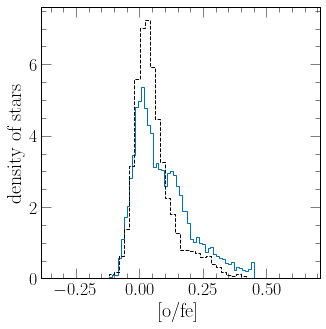

In [44]:
fiducial.plot_mdf("[o/fe]")

In [108]:
model = vice_model("../output/cristallo11_f0.2_Z0.2_eta1.0_v0.1.3_lateburst.json")

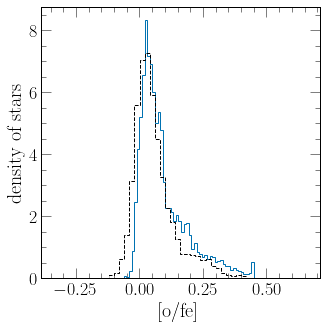

In [109]:
model.plot_mdf("[o/fe]")

In [ ]:
model = vice_model("../output/cristallo11_f0.2_Z0.2_eta1.0_v0.1.3_lateburst.json")
model.plot_mdf

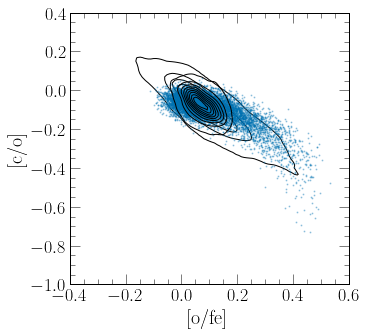

In [110]:
model.plot_stars("[o/fe]", "[c/o]", s=1, alpha=0.3)
plt.xlim(-0.4, 0.6)
plt.ylim(-1, 0.4)
aah.plot_contour("[mg/fe]", "[c/mg]")

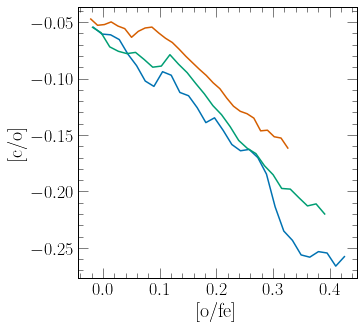

In [111]:
for o_h in [-0.1, 0.1, 0.3]:
    model.plot_mean_coofe(o_h, plot_data=False)

# The Metallicity dependence of C/O - O/Fe

In [38]:
pluto.plot_mean_track?

Signature:
pluto.plot_mean_track(
    x_vals,
    y_vals,
    bins=30,
    xlim=None,
    shade_width=False,
    err_mean=False,
    ax=None,
    dropna=False,
    **kwargs,
)
Docstring:
Plots the mean of the data as a line
with a shaded region representing the standard deviation

Parameters
----------

x_vals: np.array like
    The x values of the data
    
y_vals: np.array like
bins: ``int`` [default: 50]
    The number of bins to bin the data by
xlim: ``(int, int)`` [default: None]
    The limits of the bins of the data
    if None, uses the minimum and maximum values
err_mean: ``bool`` [default: False]
    If true, plots the error of the mean instead
    of the standard deviation for the shaded regions
File:      ~/surp/analysis_scripts/plotting_utils.py
Type:      function


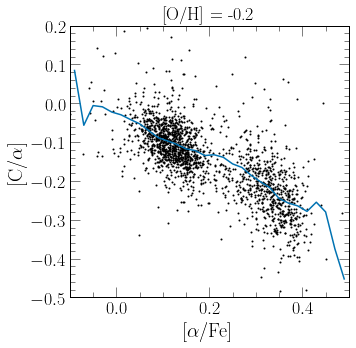

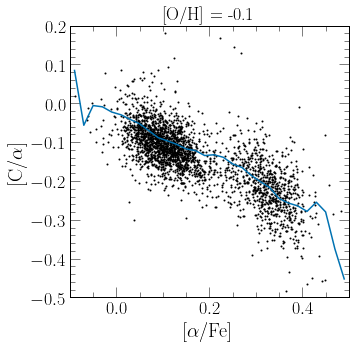

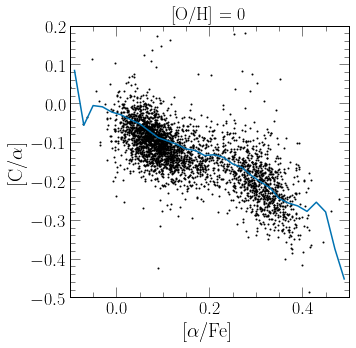

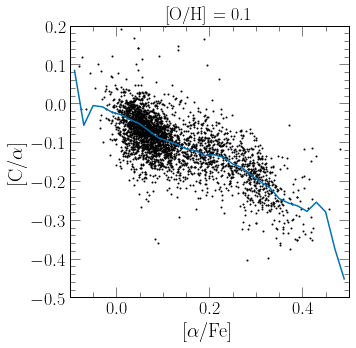

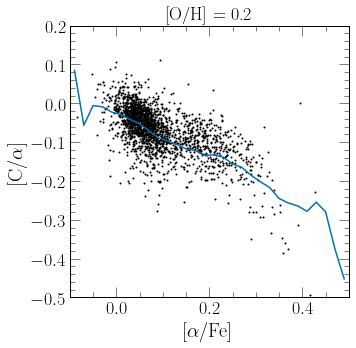

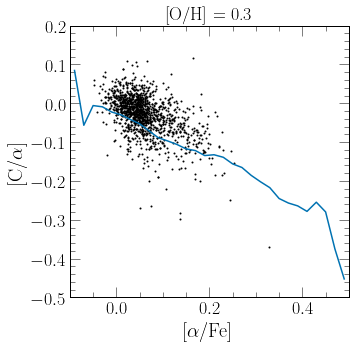

In [49]:
for o0 in [-0.2, -0.1, 0, 0.1, 0.2, 0.3]:
    aah.plot_coofe(o0, s=1, alpha=1)
    plt.xlim(-0.1, 0.5)
    plt.ylim(-0.5, 0.2)
    df = aah.subgiants
    filt = ~np.isnan(df["MG_FE"])
    filt &= ~np.isnan(df["C_MG"])
    df = df[filt]
    pluto.plot_mean_track(df["MG_FE"], df["C_MG"], xlim=(-0.1, 0.5), alpha=1)
    plt.xlabel(r"[$\alpha$/Fe]")
    plt.ylabel(r"[C/$\alpha$]")
    plt.title("[O/H] = %s" % o0)
    plt.show()

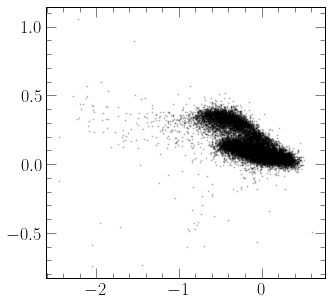

In [44]:
aah.plot_stars("[fe/h]", "[mg/fe]", s=1, alpha=0.2, exclude_high_alpha=False)

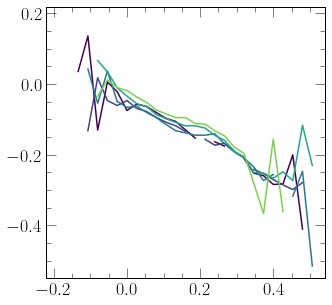

In [107]:
cmap = plt.get_cmap("viridis")

l = np.arange(-0.2, 0.3, 0.1)
N = len(l)
for i in range(N):
    o0 = l[i]
    df = aah.subgiants
    do = 0.05
    filt = df["MG_H"] > o0 - do
    filt &= df["MG_H"] < o0 + do
    df = df[filt]

    pluto.plot_mean_track(df["MG_FE"], df["C_MG"], xlim=(-0.2, 0.6), color=cmap(i/N))

(-0.2, 0.5)

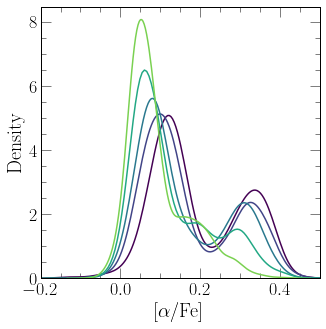

In [99]:
cmap = plt.get_cmap("viridis")

l = np.arange(-0.2, 0.3, 0.1)
N = len(l)
for i in range(N):
    o0 = l[i]
    df = aah.subgiants
    do = 0.05
    filt = df["MG_H"] > o0 - do
    filt &= df["MG_H"] < o0 + do
    df = df[filt]

    sns.kdeplot(df["MG_FE"], color=cmap(i/N))


plt.xlabel(r"[$\alpha$/Fe]")
plt.xlim(-0.2, 0.5)

In [84]:
import seaborn as sns

(-2.0, 1.0)

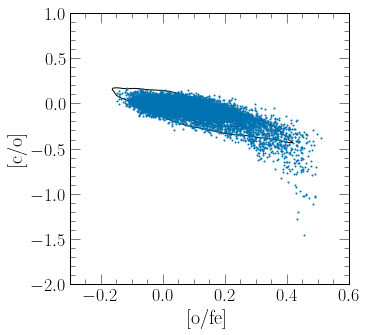

In [128]:
fiducial.plot_stars("[o/fe]", "[c/o]")
plt.xlim(-0.3, 0.6)
plt.ylim(-2, 1)

In [22]:
def plot_cofeo(models, o0=-0.1, ax=None):    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_cofeo(xlim=(-0.3, 0.3), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [36]:
def compare_r(models):
    
    fig, axs = pluto.dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = r"[O/H]",
        ylabel = r"[C/O]", 
        xlim = (-0.6, 0.6), 
        ylim = (-0.5, 0.2),
        xticks = [-0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_cofeo(models)
    pluto.legend_outside()
    
    axs[1].set(
        xlabel = r"[Fe/O]",
        ylabel = "",
        title = "",
        xlim = (-0.4, 0.1),
       xticks = [-0.3, -0.2, -0.1, 0, 0.1]
    )


In [76]:
fnames = ["cristallo11_fo_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst"]
names = []
for s in fnames:
    names.append(model_id(name=s))
    
labels=["stellar model predictions", "increased low-mass carbon", "recent star formation"]
models = {label: find_model(name) for name, label in zip(names, labels)}


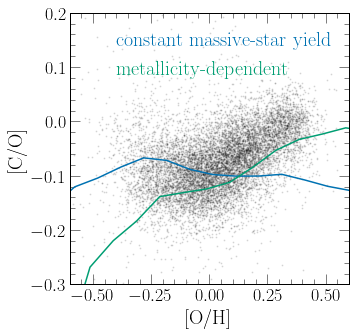

In [75]:
models["initial model"].plot_mean_stars("[o/h]", "[c/o]", plot_data=False, label="constant massive-star yield")
aah.plot_stars("MG_H", "C_MG", alpha=0.1, s=1)


models["+recent burst"].plot_mean_stars("[o/h]", "[c/o]", plot_data=False, label="metallicity-dependent")

plt.xlim(-0.6, 0.6)
plt.ylim(-0.3, 0.2)
plt.xlabel("[O/H]")
plt.ylabel("[C/O]")

pluto.fancy_legend()
sf("poster_cooh")

In [100]:
def plot_cofeo(models, o0=-0.1, ax=None):    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_cofeo(xlim=(-0.3, 0.2), label=name, plot_data=False, o_h_0=o, 
                                  star_group="solar", ax=ax, bins=40)
    
    ax.set(
        ylim=(-0.3, 0.2), 
        xlim=(-0.4, 0.1),
        xlabel="[Fe/O]",
        ylabel="[C/O]"
    )

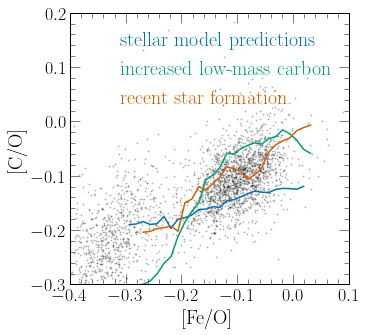

In [103]:
plot_cofeo(models)
pluto.fancy_legend()
aah.plot_cofeo()
sf("cofeo_poster")

In [ ]:
models["initial model"].plot_mean_stars("[o/h]", "[c/o]", plot_data=False, label="constant massive-star yield")
aah.plot_stars("MG_H", "C_MG", alpha=0.1, s=1)


models["+recent burst"].plot_mean_stars("[o/h]", "[c/o]", plot_data=False, label="metallicity-dependent")

plt.xlim(-0.6, 0.6)
plt.ylim(-0.3, 0.2)
plt.xlabel("[O/H]")
plt.ylabel("[C/O]")

pluto.fancy_legend()
sf("poster_cooh")

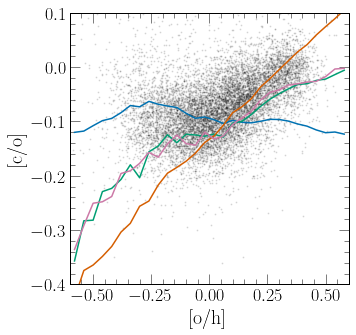

In [48]:
compare_cooh(models)
plt.ylim(-0.4, 0.1)
sf("cooh_poster")

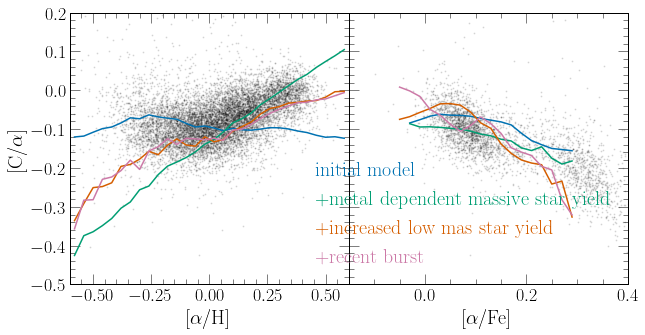

In [37]:
compare(names, labels)